In [ ]:
# -*- coding: utf-8 -*-
"""
Enhanced NLP Project for Comment Classification
Features:
- Multiple models: LinearSVC, Logistic Regression, DistilBERT, RoBERTa-base
- Imbalanced data handling: Focal Loss, Class Weights, SMOTE
- Comprehensive visualizations: Confusion matrices, ROC curves, PR curves
- Extended testing cases
"""

# ============================================================================
# INSTALLATION
# ============================================================================
!pip install huggingface_hub datasets scikit-learn transformers torch accelerate
!pip install imbalanced-learn seaborn matplotlib plotly


In [ ]:
from huggingface_hub import login
login()


Using device: cuda
GPU: Tesla T4
Text cleaning function defined.

LOADING DATA
Dataset loaded successfully!

Original Label Distribution: Counter({0: 108, 3: 57, 1: 48, 2: 27})
Loaded 212 synthetic samples.

Total Combined Samples: 525
Class Distribution:
 label
3    0.346667
0    0.249524
2    0.203810
1    0.200000
Name: proportion, dtype: float64

Train shape: (367, 2)
Val shape: (79, 2)
Test shape: (79, 2)

CLASS DISTRIBUTION VISUALIZATION


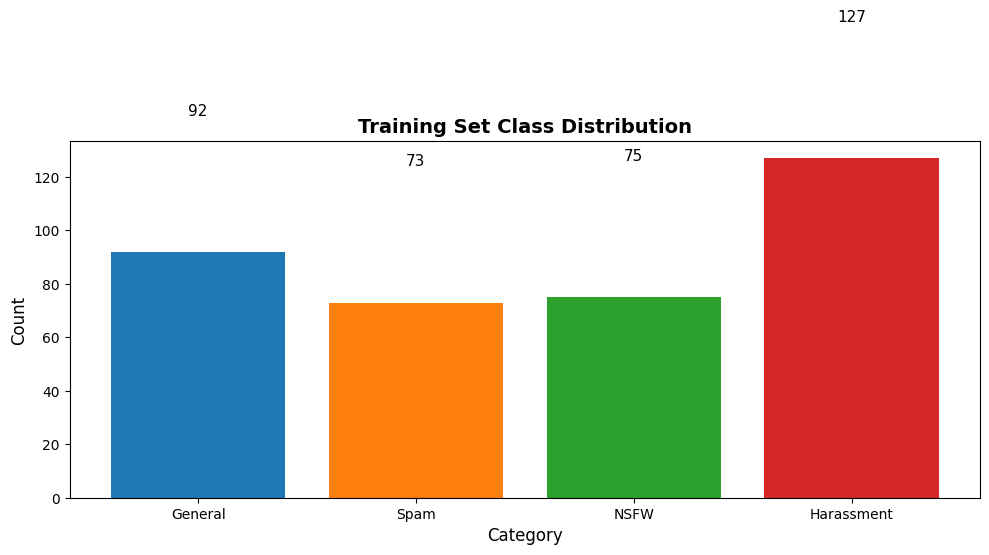


FEATURE EXTRACTION
Extracting word-level TF-IDF features...
Extracting character-level TF-IDF features...
Extracting metadata features...
Combining features...

Final feature shape: (367, 5006)
Total features: 5,006

EXPERIMENT 1: LINEAR SVC WITH CLASS WEIGHTS

=== Validation Results ===
Accuracy: 0.6962
F1 (macro): 0.6786
              precision    recall  f1-score   support

     General       0.48      0.58      0.52        19
        Spam       0.64      0.56      0.60        16
        NSFW       0.79      0.69      0.73        16
  Harassment       0.86      0.86      0.86        28

    accuracy                           0.70        79
   macro avg       0.69      0.67      0.68        79
weighted avg       0.71      0.70      0.70        79


=== Test Results ===
Accuracy: 0.6835
F1 (macro): 0.6856
              precision    recall  f1-score   support

     General       0.50      0.50      0.50        20
        Spam       0.71      0.75      0.73        16
        NSFW      

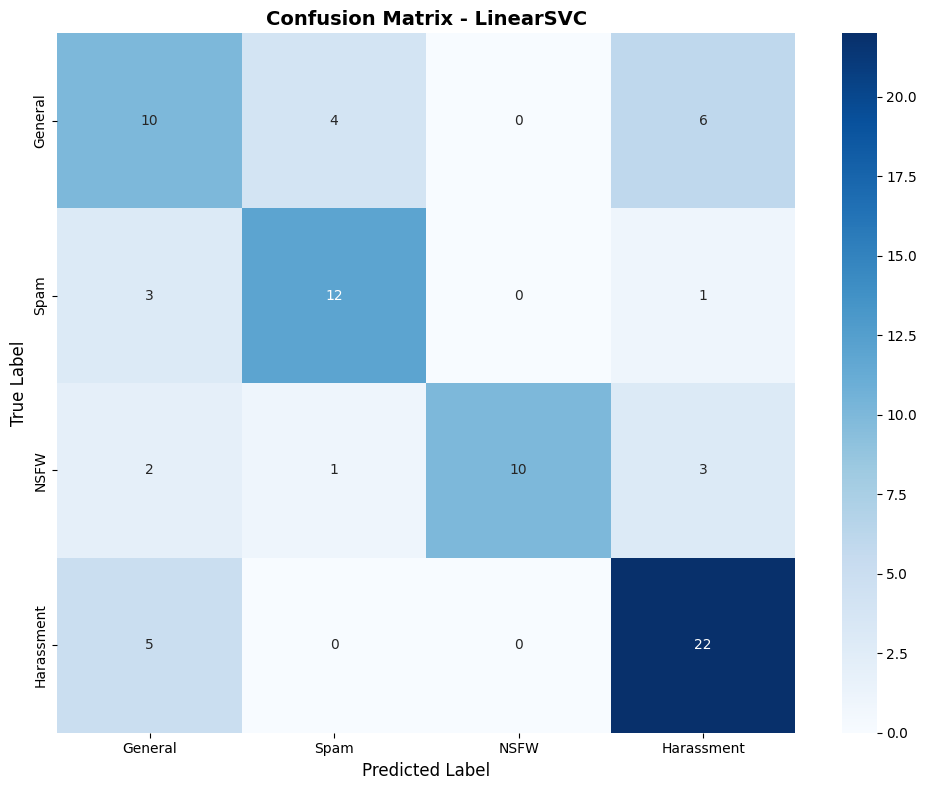


Normalized Confusion Matrix for LinearSVC:
            General   Spam   NSFW  Harassment
General       0.500  0.200  0.000       0.300
Spam          0.188  0.750  0.000       0.062
NSFW          0.125  0.062  0.625       0.188
Harassment    0.185  0.000  0.000       0.815

EXPERIMENT 2: LOGISTIC REGRESSION WITH CLASS WEIGHTS

=== Validation Results ===
Accuracy: 0.6835
F1 (macro): 0.6706
              precision    recall  f1-score   support

     General       0.44      0.58      0.50        19
        Spam       0.69      0.56      0.62        16
        NSFW       0.73      0.69      0.71        16
  Harassment       0.88      0.82      0.85        28

    accuracy                           0.68        79
   macro avg       0.69      0.66      0.67        79
weighted avg       0.71      0.68      0.69        79


=== Test Results ===
Accuracy: 0.7215
F1 (macro): 0.7232
              precision    recall  f1-score   support

     General       0.55      0.60      0.57        20
      

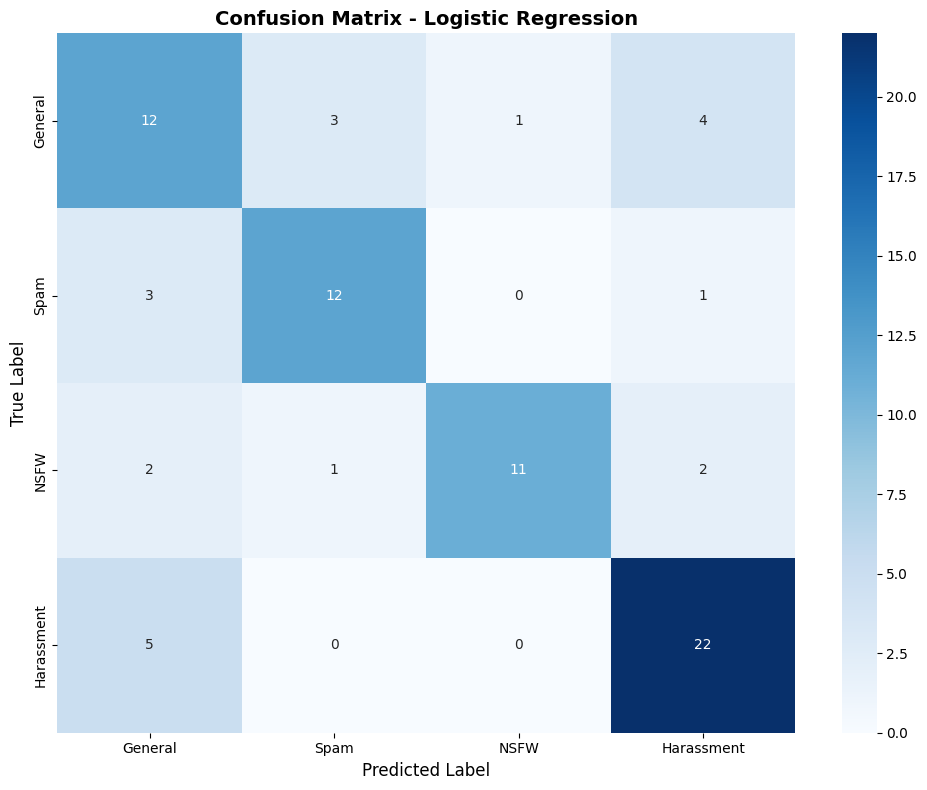


Normalized Confusion Matrix for Logistic Regression:
            General   Spam   NSFW  Harassment
General       0.600  0.150  0.050       0.200
Spam          0.188  0.750  0.000       0.062
NSFW          0.125  0.062  0.688       0.125
Harassment    0.185  0.000  0.000       0.815


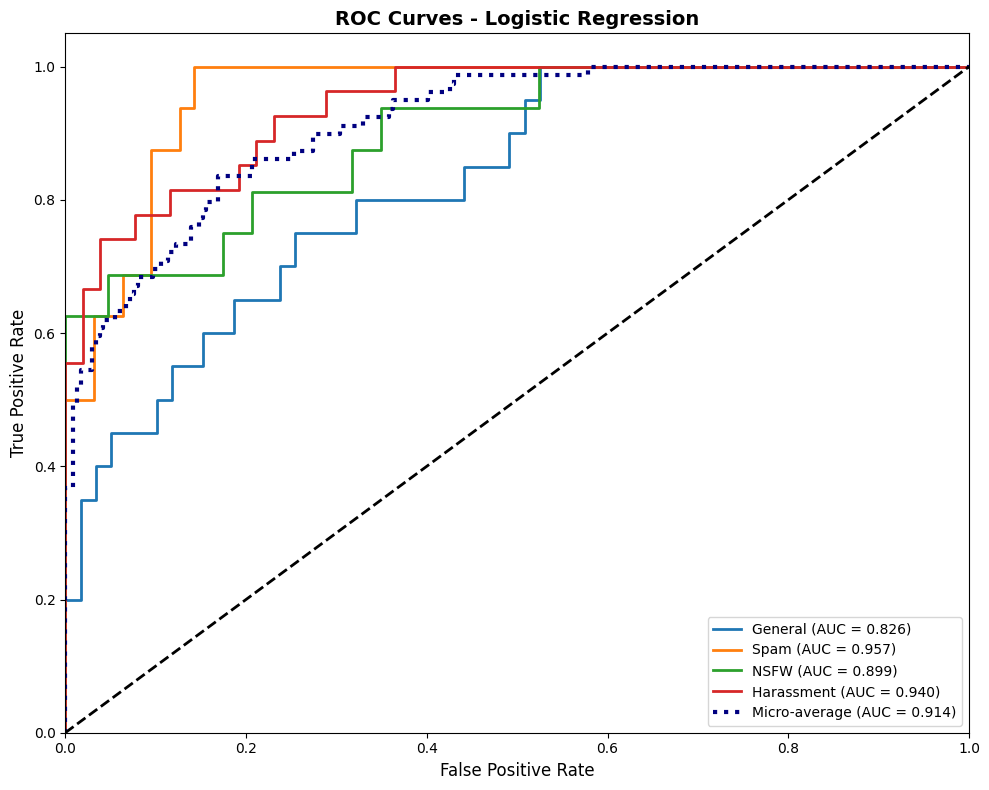

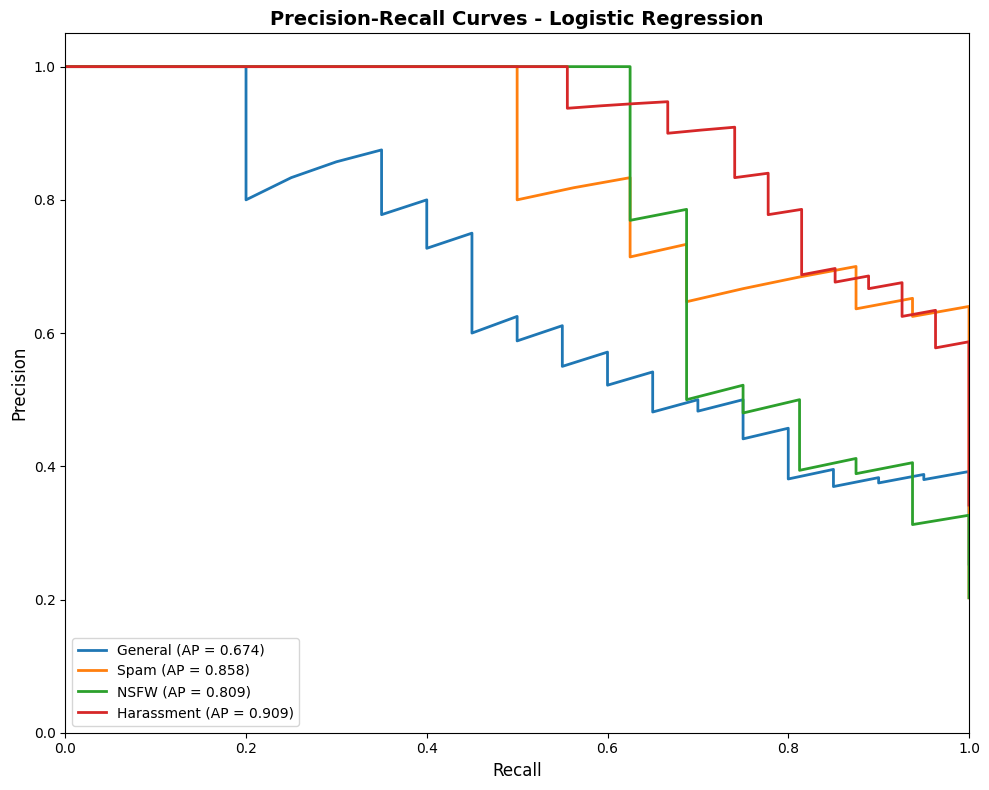


EXPERIMENT 3: LOGISTIC REGRESSION WITH FOCAL LOSS
Iteration 200/1000, Loss: 0.2431, Accuracy: 0.9809
Iteration 400/1000, Loss: 0.1798, Accuracy: 0.9864
Iteration 600/1000, Loss: 0.1527, Accuracy: 0.9891
Iteration 800/1000, Loss: 0.1370, Accuracy: 0.9918
Iteration 1000/1000, Loss: 0.1265, Accuracy: 0.9918

=== Validation Results ===
Accuracy: 0.6709
F1 (macro): 0.6546
              precision    recall  f1-score   support

     General       0.44      0.58      0.50        19
        Spam       0.64      0.56      0.60        16
        NSFW       0.71      0.62      0.67        16
  Harassment       0.88      0.82      0.85        28

    accuracy                           0.67        79
   macro avg       0.67      0.65      0.65        79
weighted avg       0.69      0.67      0.68        79


=== Test Results ===
Accuracy: 0.6835
F1 (macro): 0.6864
              precision    recall  f1-score   support

     General       0.46      0.55      0.50        20
        Spam       0.71    

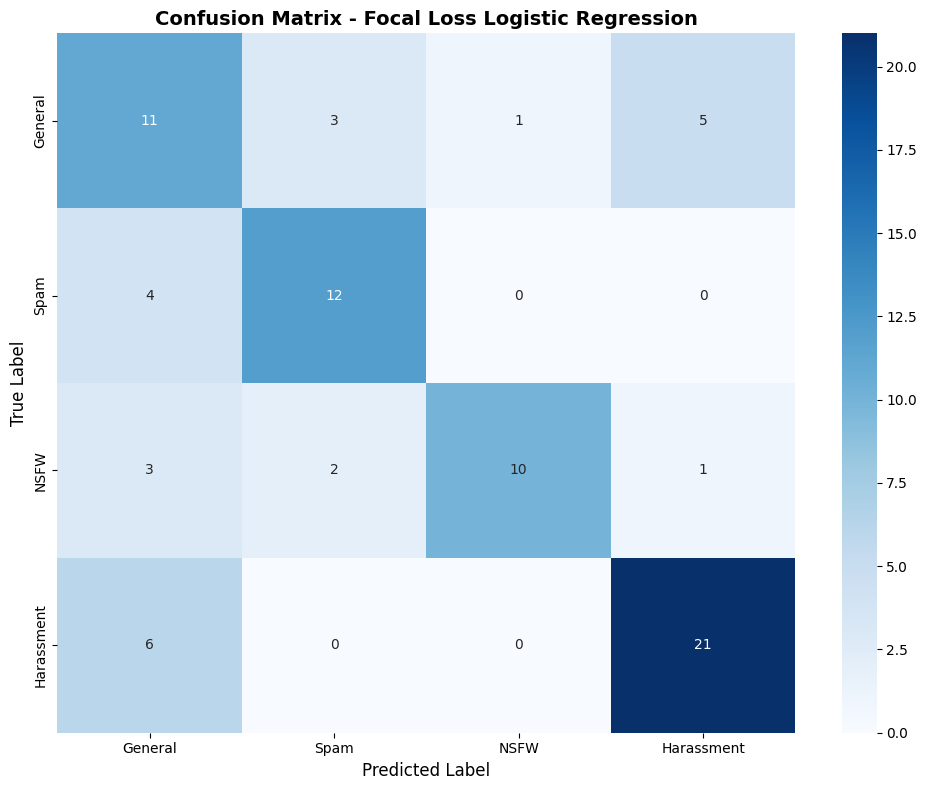


Normalized Confusion Matrix for Focal Loss Logistic Regression:
            General   Spam   NSFW  Harassment
General       0.550  0.150  0.050       0.250
Spam          0.250  0.750  0.000       0.000
NSFW          0.188  0.125  0.625       0.062
Harassment    0.222  0.000  0.000       0.778


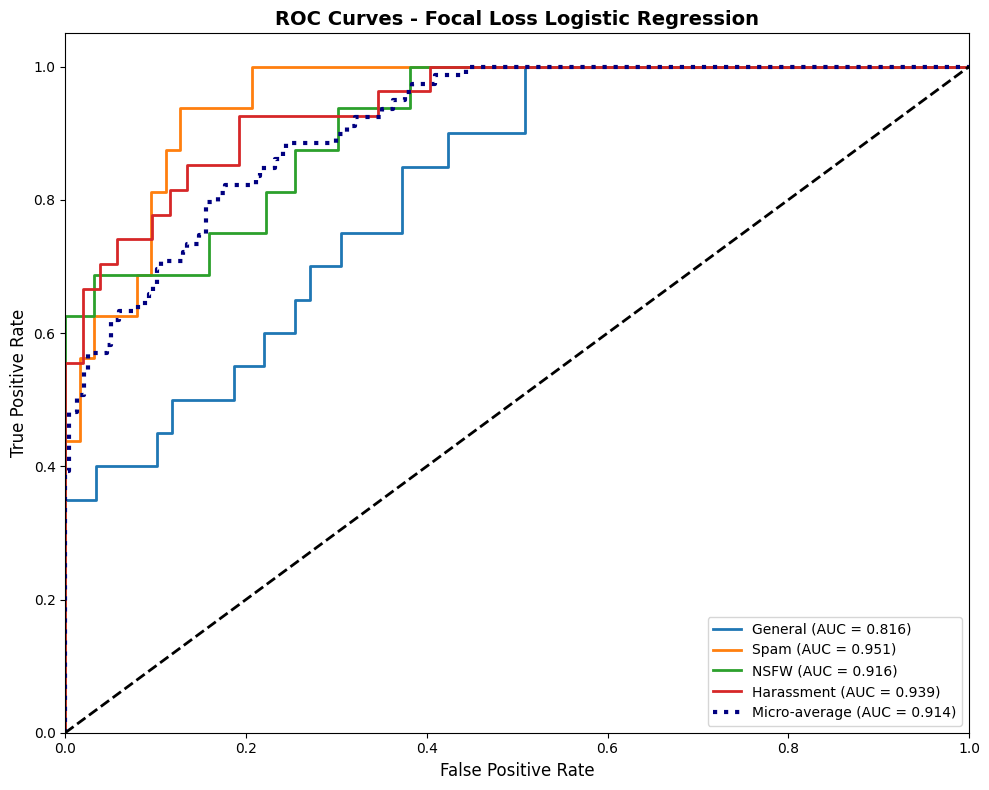


Class weights: [0.99728261 1.25684932 1.22333333 0.72244094]

EXPERIMENT 4: DISTILBERT WITH CLASS WEIGHTS


Map:   0%|          | 0/367 [00:00<?, ? examples/s]

Map:   0%|          | 0/79 [00:00<?, ? examples/s]

Map:   0%|          | 0/79 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBERT model loaded with 66,956,548 parameters
Training DistilBERT...


Epoch,Training Loss,Validation Loss,Accuracy,F1,F1 Weighted
1,No log,1.384209,0.227848,0.128738,0.118424
2,No log,1.355956,0.506329,0.419414,0.449322
3,1.377800,1.247181,0.594937,0.541126,0.562320
4,1.377800,1.069212,0.658228,0.636653,0.651030
5,1.161400,0.932560,0.658228,0.644336,0.663561
6,1.161400,0.879494,0.708861,0.689215,0.709108
7,0.594200,0.896566,0.658228,0.641742,0.660615
8,0.594200,0.932369,0.696203,0.686535,0.701185


DistilBERT training complete!



=== Validation Results ===
Accuracy: 0.7089
F1 (macro): 0.6892
              precision    recall  f1-score   support

     General       0.68      0.68      0.68        19
        Spam       0.67      0.62      0.65        16
        NSFW       0.59      0.62      0.61        16
  Harassment       0.82      0.82      0.82        28

    accuracy                           0.71        79
   macro avg       0.69      0.69      0.69        79
weighted avg       0.71      0.71      0.71        79




=== Test Results ===
Accuracy: 0.6962
F1 (macro): 0.6979
              precision    recall  f1-score   support

     General       0.54      0.65      0.59        20
        Spam       0.85      0.69      0.76        16
        NSFW       0.69      0.69      0.69        16
  Harassment       0.77      0.74      0.75        27

    accuracy                           0.70        79
   macro avg       0.71      0.69      0.70        79
weighted avg       0.71      0.70      0.70        79



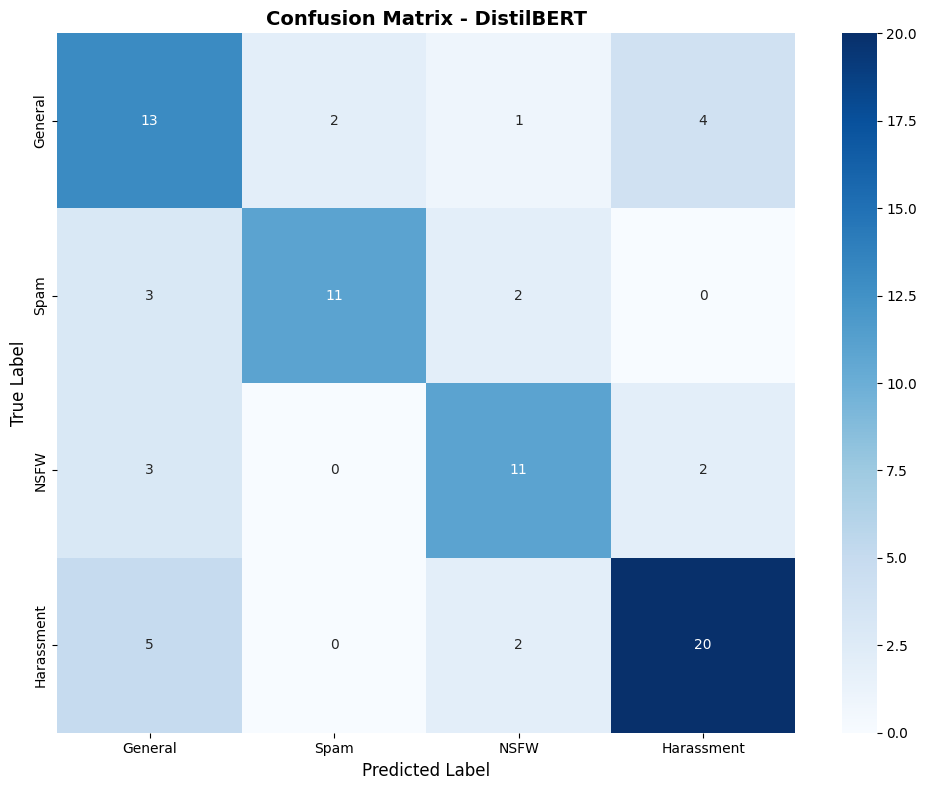


Normalized Confusion Matrix for DistilBERT:
            General   Spam   NSFW  Harassment
General       0.650  0.100  0.050       0.200
Spam          0.188  0.688  0.125       0.000
NSFW          0.188  0.000  0.688       0.125
Harassment    0.185  0.000  0.074       0.741


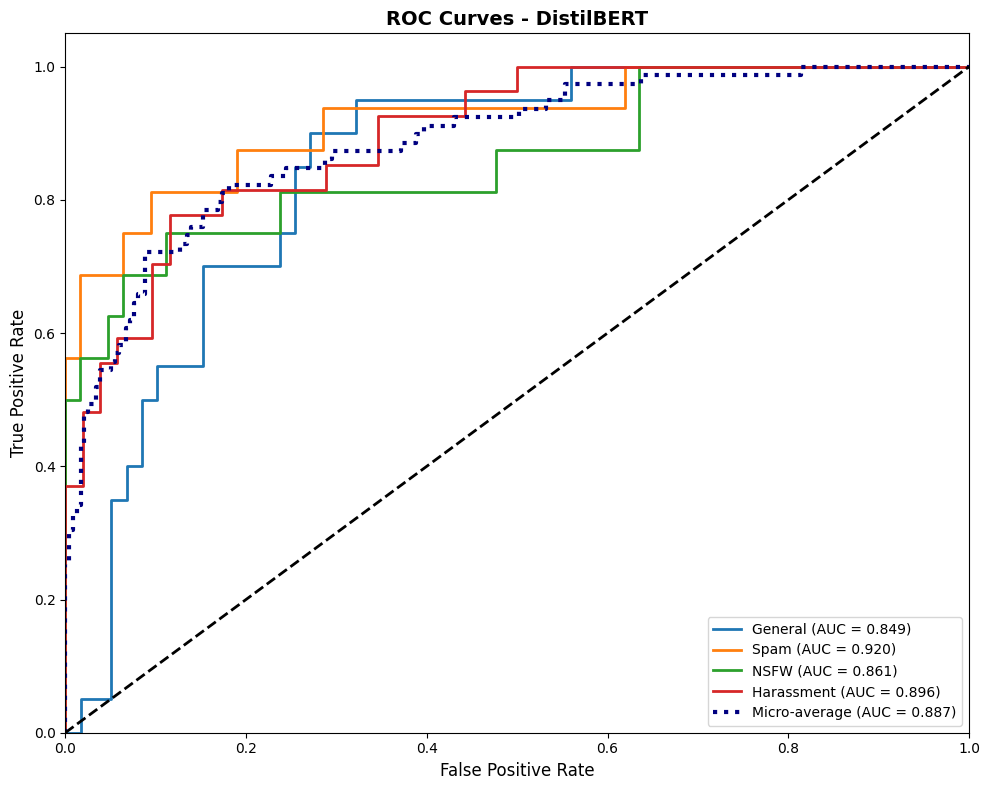


EXPERIMENT 5: DISTILBERT WITH FOCAL LOSS


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training DistilBERT with Focal Loss...


Epoch,Training Loss,Validation Loss,Accuracy,F1,F1 Weighted
1,No log,0.803136,0.227848,0.166176,0.149814
2,No log,0.770971,0.303797,0.285128,0.245849
3,0.786600,0.682344,0.481013,0.487622,0.485451
4,0.786600,0.556977,0.556962,0.534188,0.550579
5,0.590900,0.478948,0.658228,0.651252,0.665631
6,0.590900,0.456668,0.683544,0.658789,0.677463
7,0.216700,0.464958,0.772152,0.764317,0.776922
8,0.216700,0.540900,0.734177,0.712264,0.729671
9,0.033700,0.571787,0.734177,0.714509,0.733184


DistilBERT Focal Loss training complete!



=== Validation Results ===
Accuracy: 0.7722
F1 (macro): 0.7643
              precision    recall  f1-score   support

     General       0.60      0.79      0.68        19
        Spam       0.79      0.69      0.73        16
        NSFW       0.80      0.75      0.77        16
  Harassment       0.92      0.82      0.87        28

    accuracy                           0.77        79
   macro avg       0.78      0.76      0.76        79
weighted avg       0.79      0.77      0.78        79




=== Test Results ===
Accuracy: 0.5949
F1 (macro): 0.6079
              precision    recall  f1-score   support

     General       0.42      0.55      0.48        20
        Spam       0.90      0.56      0.69        16
        NSFW       0.57      0.75      0.65        16
  Harassment       0.68      0.56      0.61        27

    accuracy                           0.59        79
   macro avg       0.64      0.60      0.61        79
weighted avg       0.64      0.59      0.60        79



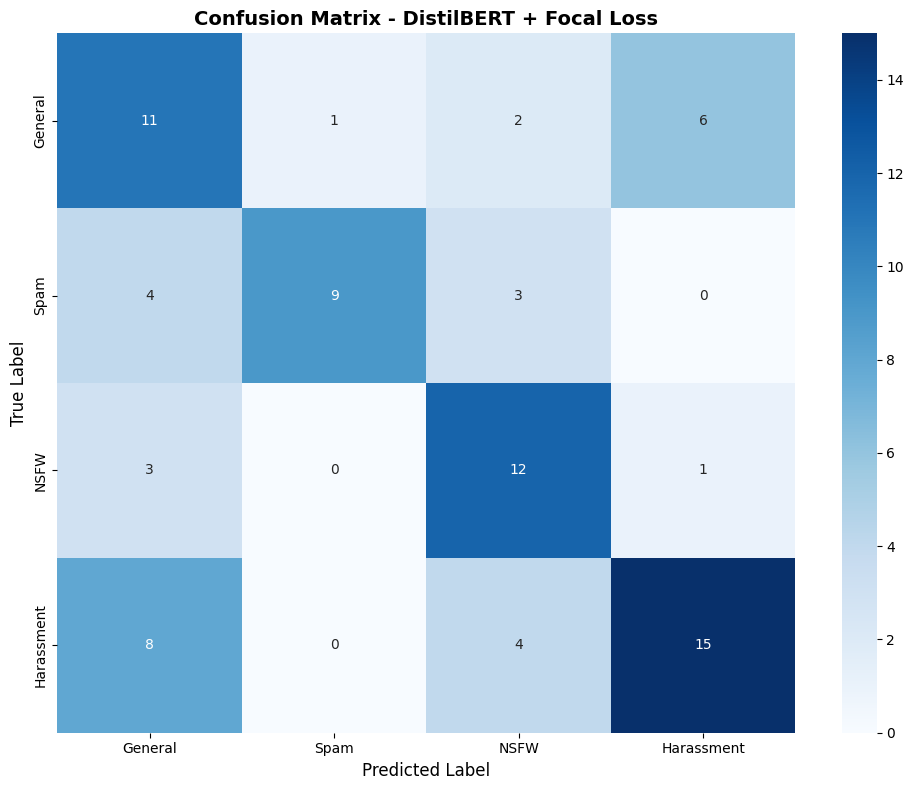


Normalized Confusion Matrix for DistilBERT + Focal Loss:
            General   Spam   NSFW  Harassment
General       0.550  0.050  0.100       0.300
Spam          0.250  0.562  0.188       0.000
NSFW          0.188  0.000  0.750       0.062
Harassment    0.296  0.000  0.148       0.556

EXPERIMENT 6: ROBERTA-BASE WITH CLASS WEIGHTS


Map:   0%|          | 0/367 [00:00<?, ? examples/s]

Map:   0%|          | 0/79 [00:00<?, ? examples/s]

Map:   0%|          | 0/79 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RoBERTa model loaded with 124,648,708 parameters
Training RoBERTa...


Epoch,Training Loss,Validation Loss,Accuracy,F1,F1 Weighted
1,No log,1.391755,0.240506,0.096939,0.093258
2,1.392900,1.383528,0.240506,0.096939,0.093258
3,1.391700,1.296681,0.645570,0.619880,0.638838
4,1.321400,0.954914,0.607595,0.602863,0.612342
5,0.896600,0.792755,0.721519,0.695071,0.721510
6,0.525600,0.808932,0.696203,0.673217,0.704838
7,0.340600,0.871657,0.721519,0.705981,0.724021
8,0.163200,0.945063,0.746835,0.734903,0.752348
9,0.105300,1.146535,0.772152,0.752179,0.769216
10,0.053300,1.502890,0.721519,0.707661,0.728246


RoBERTa training complete!



=== Validation Results ===
Accuracy: 0.7722
F1 (macro): 0.7522
              precision    recall  f1-score   support

     General       0.81      0.68      0.74        19
        Spam       0.62      0.62      0.62        16
        NSFW       0.80      0.75      0.77        16
  Harassment       0.81      0.93      0.87        28

    accuracy                           0.77        79
   macro avg       0.76      0.75      0.75        79
weighted avg       0.77      0.77      0.77        79




=== Test Results ===
Accuracy: 0.6962
F1 (macro): 0.6931
              precision    recall  f1-score   support

     General       0.65      0.55      0.59        20
        Spam       0.80      0.75      0.77        16
        NSFW       0.65      0.69      0.67        16
  Harassment       0.70      0.78      0.74        27

    accuracy                           0.70        79
   macro avg       0.70      0.69      0.69        79
weighted avg       0.70      0.70      0.69        79



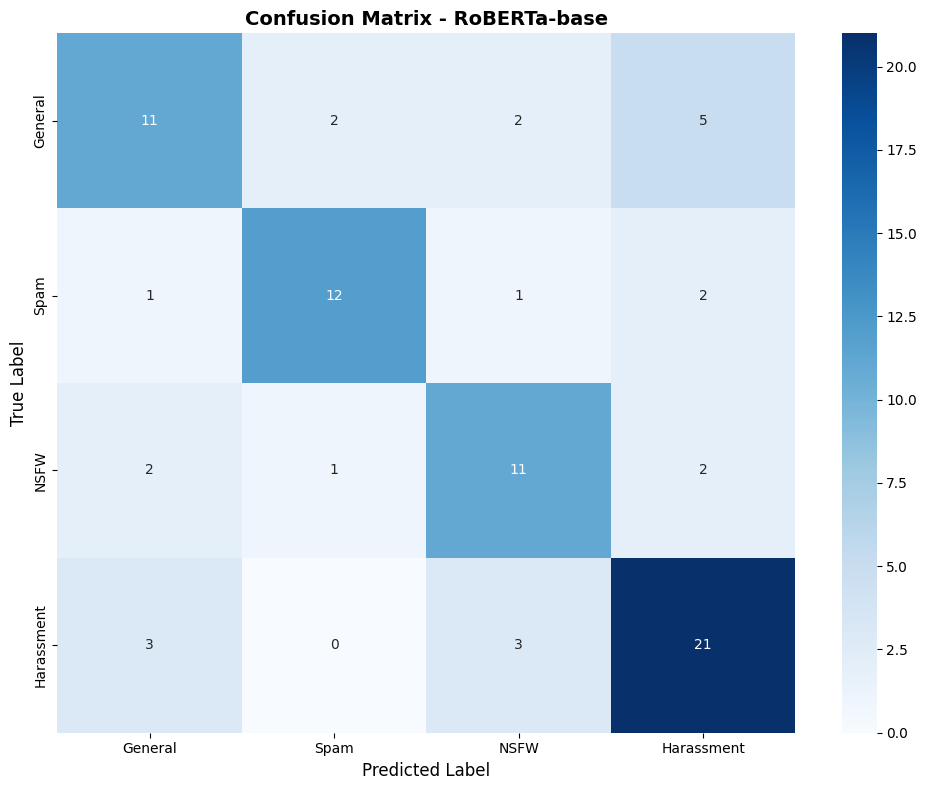


Normalized Confusion Matrix for RoBERTa-base:
            General   Spam   NSFW  Harassment
General       0.550  0.100  0.100       0.250
Spam          0.062  0.750  0.062       0.125
NSFW          0.125  0.062  0.688       0.125
Harassment    0.111  0.000  0.111       0.778


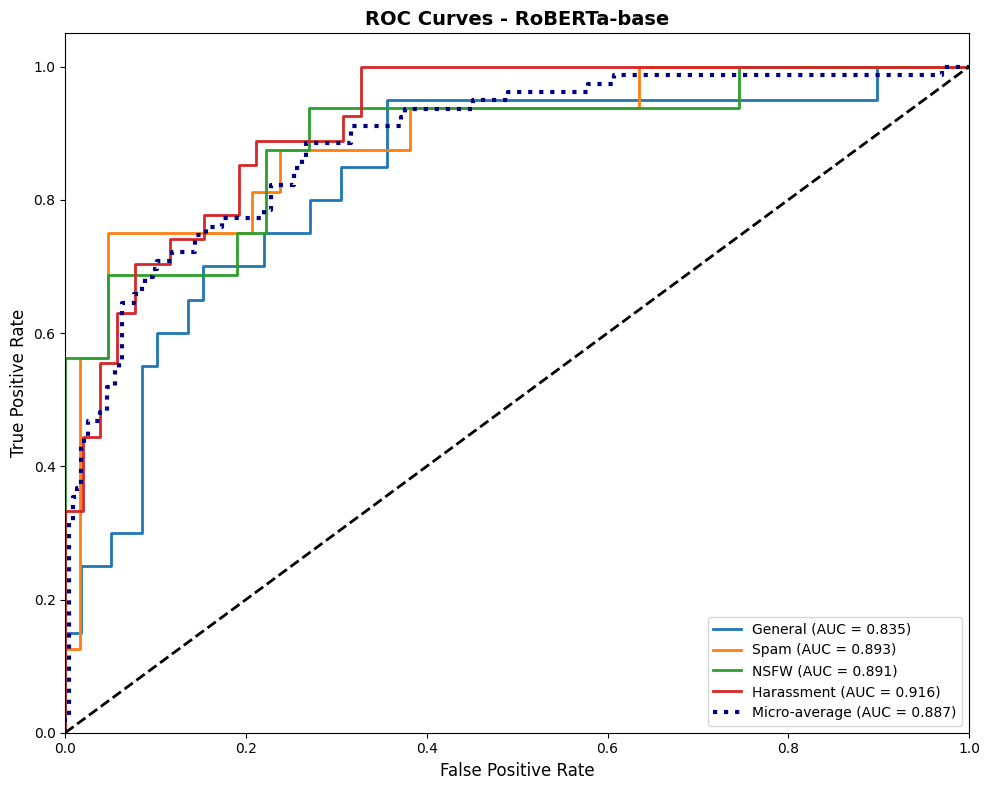

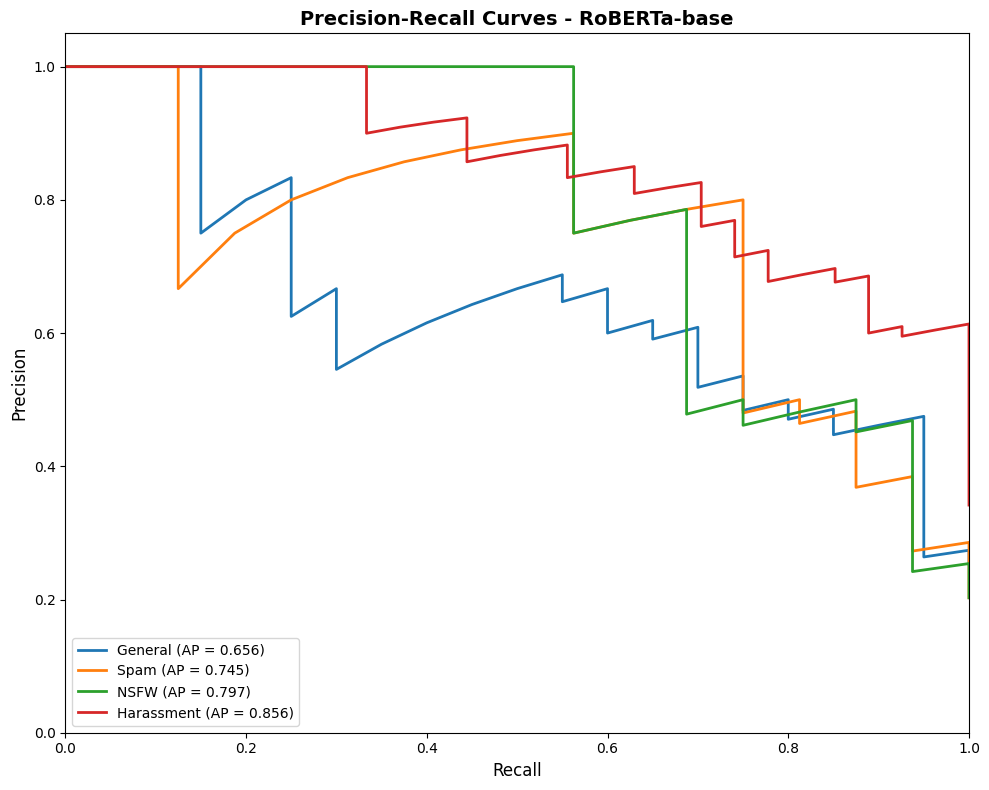


EXPERIMENT 7: ROBERTA-BASE WITH FOCAL LOSS


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training RoBERTa with Focal Loss...


Epoch,Training Loss,Validation Loss,Accuracy,F1,F1 Weighted
1,No log,0.805814,0.202532,0.084211,0.068221
2,0.814600,0.791933,0.202532,0.084211,0.068221
3,0.797400,0.666500,0.341772,0.287137,0.249422
4,0.717100,0.527806,0.569620,0.555326,0.563375
5,0.433900,0.473271,0.746835,0.724492,0.752305
6,0.238000,0.499205,0.708861,0.687305,0.715259
7,0.113900,0.530109,0.746835,0.729109,0.751608
8,0.049300,0.617443,0.746835,0.728111,0.741760
9,0.019200,0.763109,0.721519,0.698564,0.712482
10,0.016000,0.761513,0.746835,0.726243,0.744800


RoBERTa Focal Loss training complete!



=== Validation Results ===
Accuracy: 0.7468
F1 (macro): 0.7291
              precision    recall  f1-score   support

     General       0.60      0.63      0.62        19
        Spam       0.73      0.69      0.71        16
        NSFW       0.63      0.75      0.69        16
  Harassment       0.96      0.86      0.91        28

    accuracy                           0.75        79
   macro avg       0.73      0.73      0.73        79
weighted avg       0.76      0.75      0.75        79




=== Test Results ===
Accuracy: 0.6709
F1 (macro): 0.6755
              precision    recall  f1-score   support

     General       0.62      0.75      0.68        20
        Spam       0.80      0.75      0.77        16
        NSFW       0.48      0.69      0.56        16
  Harassment       0.88      0.56      0.68        27

    accuracy                           0.67        79
   macro avg       0.70      0.69      0.68        79
weighted avg       0.72      0.67      0.68        79



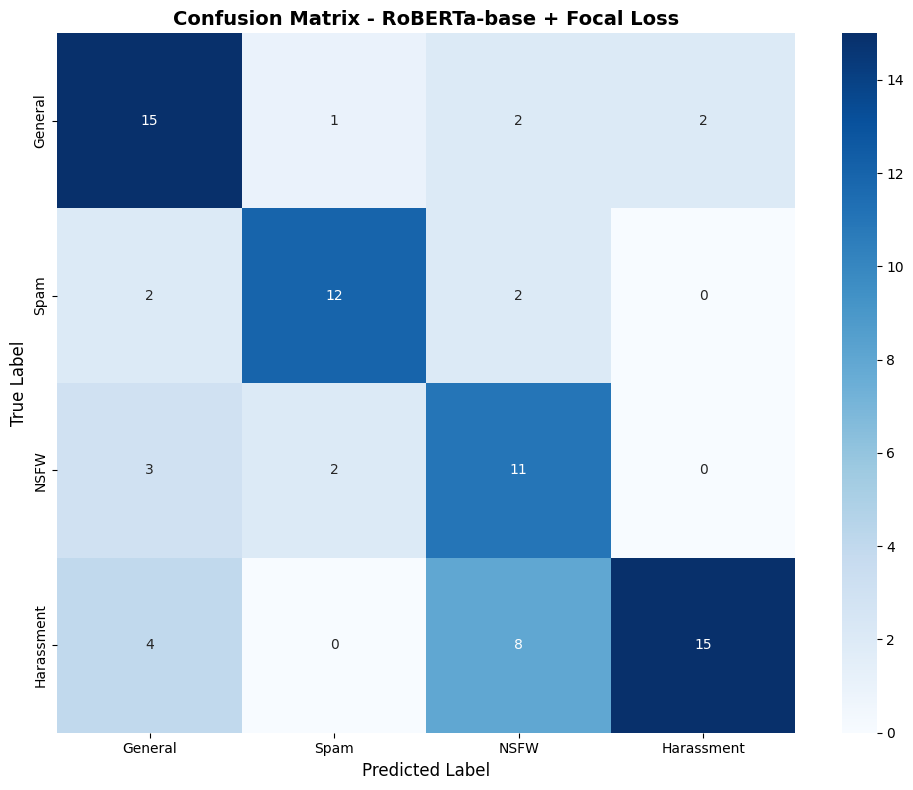


Normalized Confusion Matrix for RoBERTa-base + Focal Loss:
            General   Spam   NSFW  Harassment
General       0.750  0.050  0.100       0.100
Spam          0.125  0.750  0.125       0.000
NSFW          0.188  0.125  0.688       0.000
Harassment    0.148  0.000  0.296       0.556

MODEL COMPARISON

--------------------------------------------------------------------------------
Model                        Val Acc     Val F1   Test Acc    Test F1
--------------------------------------------------------------------------------
LinearSVC                     0.6962     0.6786     0.6835     0.6856
Logistic Regression           0.6835     0.6706     0.7215     0.7232
Focal Loss LR                 0.6709     0.6546     0.6835     0.6864
DistilBERT                    0.7089     0.6892     0.6962     0.6979
DistilBERT+Focal              0.7722     0.7643     0.5949     0.6079
RoBERTa-base                  0.7722     0.7522     0.6962     0.6931
RoBERTa+Focal                 0.7468   

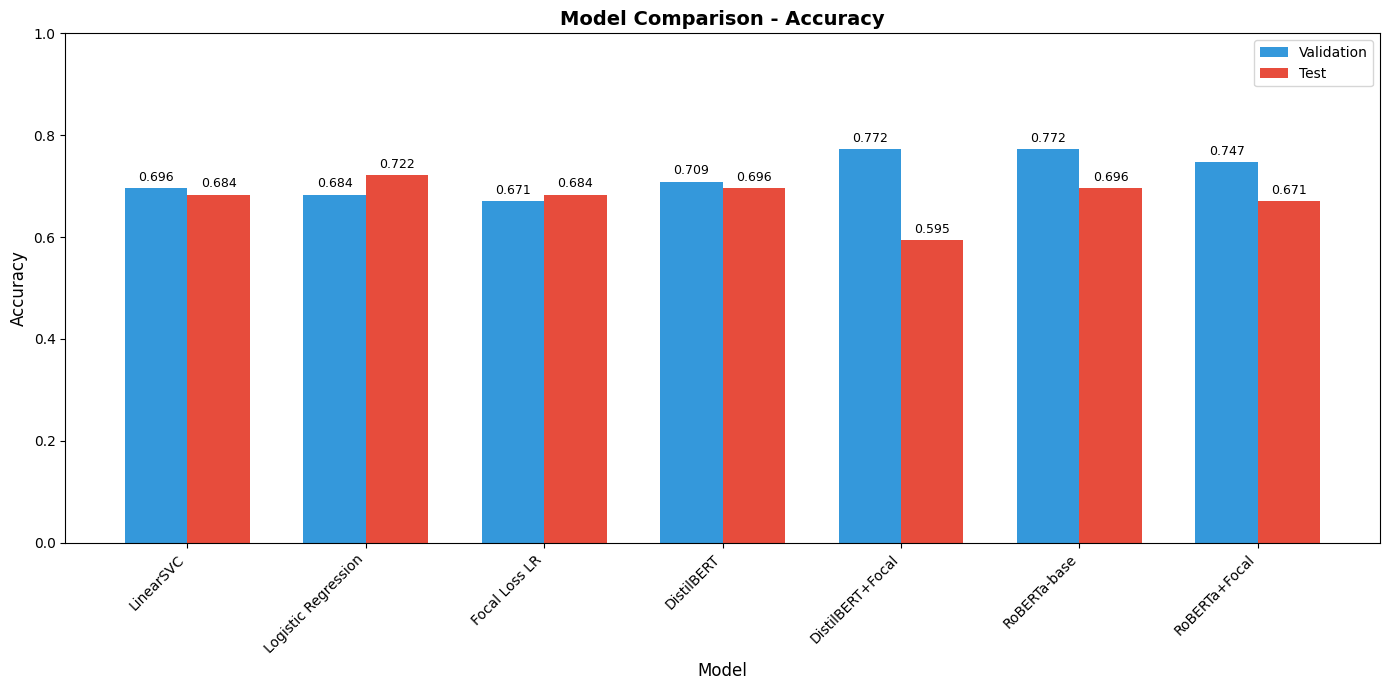

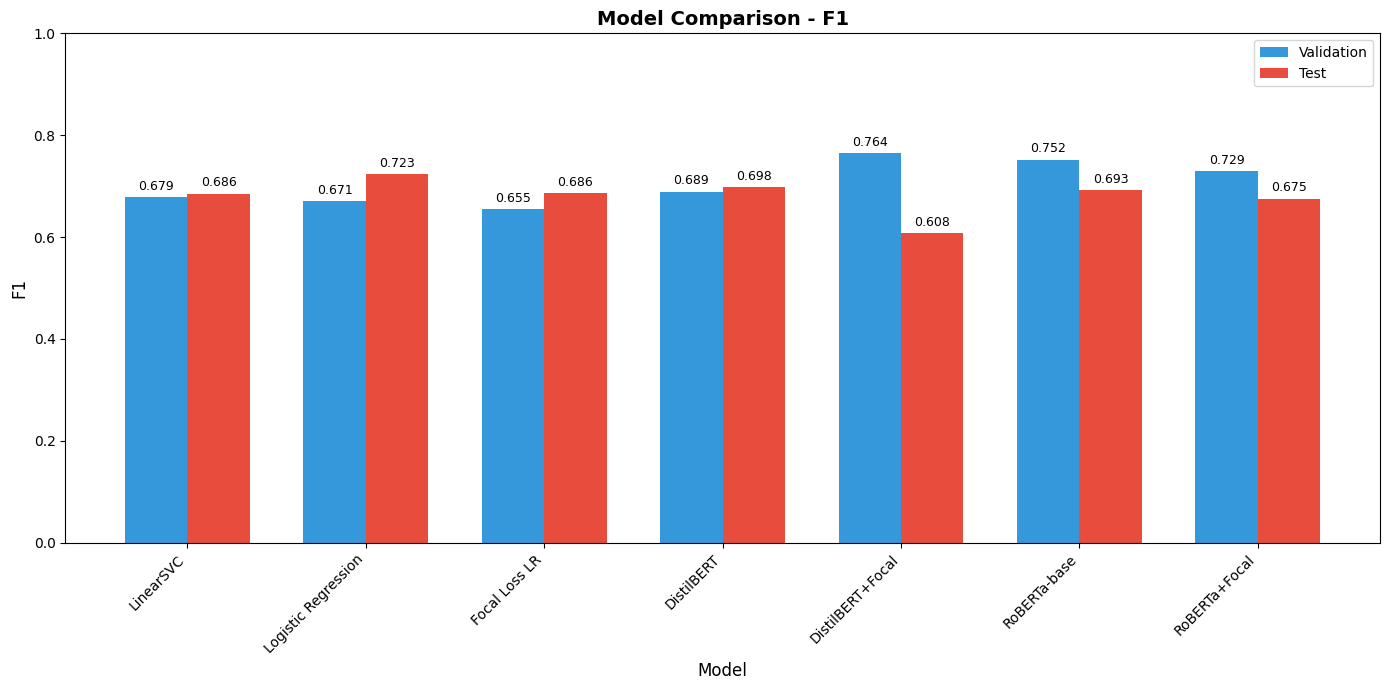


PREDICTION FUNCTIONS
Prediction functions defined!

EXTENDED TESTING CASES

RUNNING ALL TEST CASES

--- Test 1/55 ---
Comment: 'This is a great project, keep up the good work!'
Expected: General

Text: 'This is a great project, keep up the good work!'
--------------------------------------------------
LinearSVC:            General
Logistic Regression:  General ({'General': '0.348', 'Spam': '0.196', 'NSFW': '0.191', 'Harassment': '0.265'})
DistilBERT:           General ({'General': '0.680', 'Spam': '0.166', 'NSFW': '0.055', 'Harassment': '0.098'})
RoBERTa:              General ({'General': '0.971', 'Spam': '0.014', 'NSFW': '0.002', 'Harassment': '0.012'})

--- Test 2/55 ---
Comment: 'Free robux now! Click this link to get unlimited coins!'
Expected: Spam

Text: 'Free robux now! Click this link to get unlimited coins!'
--------------------------------------------------
LinearSVC:            Spam
Logistic Regression:  Spam ({'General': '0.048', 'Spam': '0.892', 'NSFW': '0.027', 'Harassme

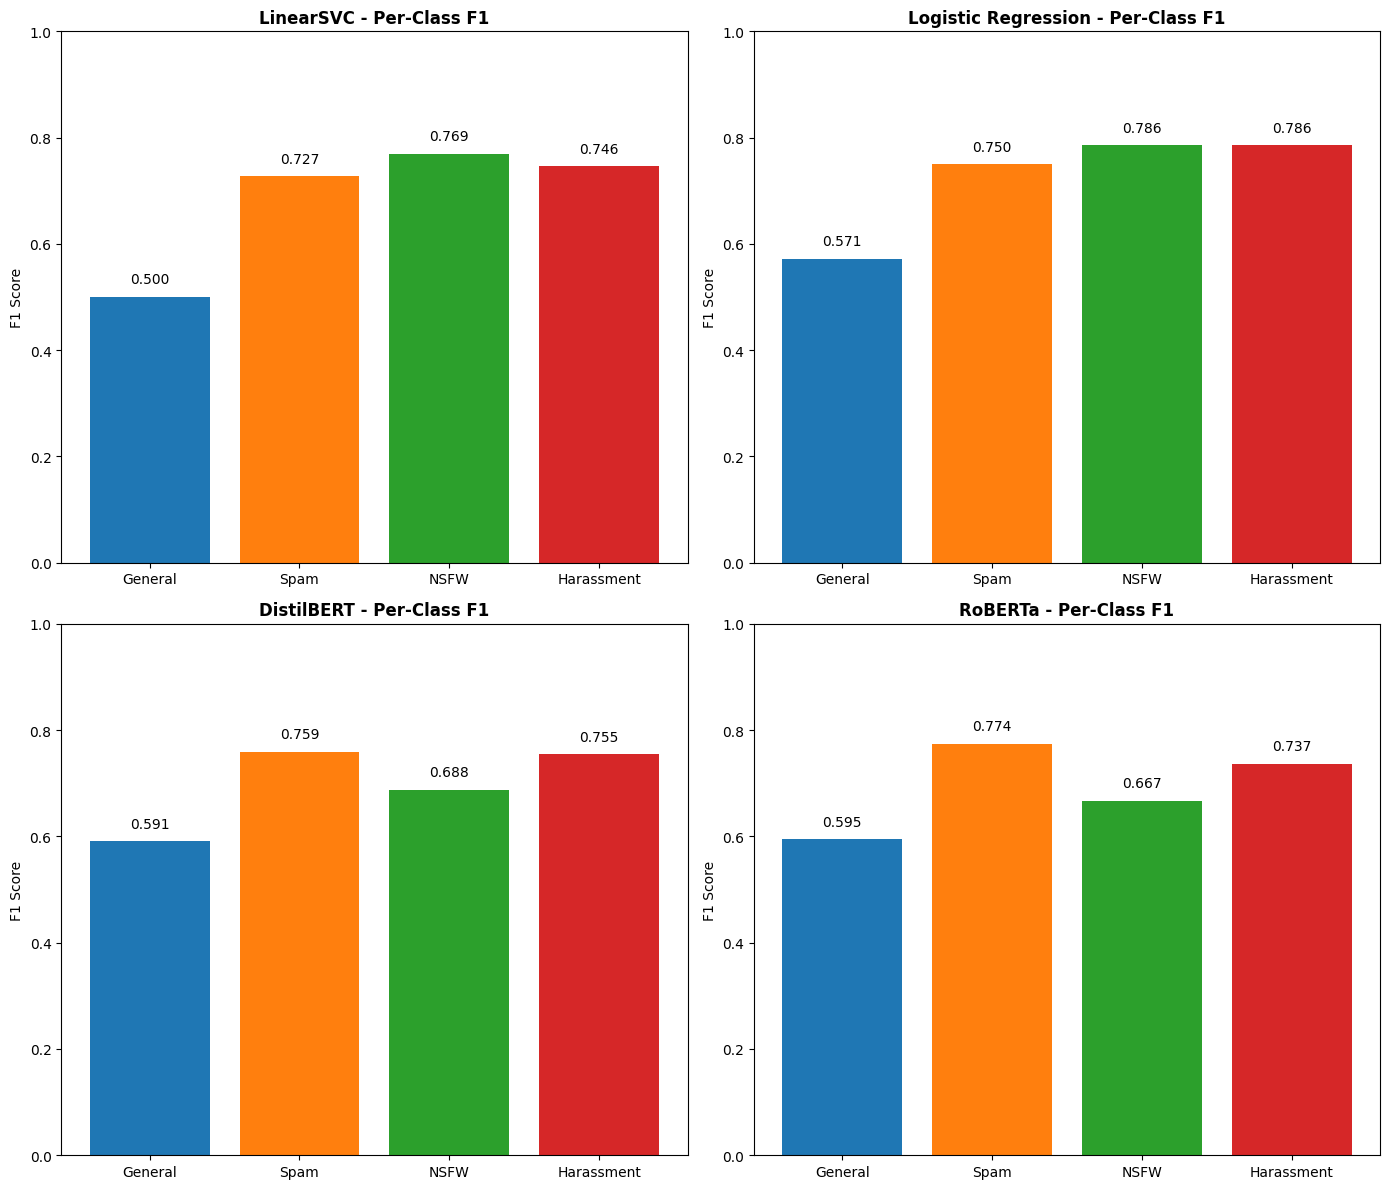


FINAL SUMMARY

This enhanced NLP project includes:

1. MODELS:
   - LinearSVC with TF-IDF features
   - Logistic Regression with TF-IDF features  
   - Focal Loss Logistic Regression (custom implementation)
   - DistilBERT with class weights
   - DistilBERT with Focal Loss
   - RoBERTa-base with class weights
   - RoBERTa-base with Focal Loss

2. IMBALANCE HANDLING TECHNIQUES:
   - Class weights (balanced)
   - Focal Loss (gamma=2.0)
   - Custom alpha weighting

3. VISUALIZATIONS:
   - Class distribution plots
   - Confusion matrices for each model
   - ROC curves (multi-class)
   - Precision-Recall curves
   - Model comparison bar charts
   - Per-class F1 score plots
   - Error analysis

4. TESTING:
   - Basic test cases (7)
   - Extended test cases (32)
   - Edge cases (13)
   - Total: 52 test cases covering:
     * All categories (General, Spam, NSFW, Harassment)
     * Short and long texts
     * Mixed signals
     * Special characters
     * Subtle cases


Best Model (by Test F1)

In [ ]:
# -*- coding: utf-8 -*-
"""
Enhanced NLP Project for Comment Classification
Features:
- Multiple models: LinearSVC, Logistic Regression, DistilBERT, RoBERTa-base
- Imbalanced data handling: Focal Loss, Class Weights, SMOTE
- Comprehensive visualizations: Confusion matrices, ROC curves, PR curves
- Extended testing cases
"""

# ============================================================================
# INSTALLATION
# ============================================================================
# !pip install huggingface_hub datasets scikit-learn transformers torch accelerate
# !pip install imbalanced-learn seaborn matplotlib plotly

import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# IMPORTS
# ============================================================================
import re
import numpy as np
import pandas as pd
from collections import Counter

import nltk
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, accuracy_score, f1_score,
    confusion_matrix, roc_curve, auc, precision_recall_curve,
    average_precision_score
)
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.utils.class_weight import compute_class_weight
from scipy.sparse import hstack

import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

from transformers import (
    DistilBertTokenizer, DistilBertForSequenceClassification,
    RobertaTokenizer, RobertaForSequenceClassification,
    Trainer, TrainingArguments, EarlyStoppingCallback
)
from datasets import Dataset, load_dataset

# ============================================================================
# CONFIGURATION
# ============================================================================
RANDOM_STATE = 42
NUM_LABELS = 4
LABEL_MAP = {0: 'General', 1: 'Spam', 2: 'NSFW', 3: 'Harassment'}
LABEL_NAMES = ['General', 'Spam', 'NSFW', 'Harassment']

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# ============================================================================
# TEXT CLEANING
# ============================================================================
def clean_text(text):
    """Clean and preprocess text data."""
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove usernames
    text = re.sub(r'@\w+', '', text)
    # Remove non-alphanumeric (keep spaces)
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)
    # Remove long sequences
    text = re.sub(r'[a-zA-Z0-9]{30,}', '', text)
    # Lowercase
    text = text.lower()
    # Lemmatization
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words]
    text = ' '.join(words)
    # Whitespace cleanup
    text = re.sub(r'\s+', ' ', text).strip()
    return text

print("Text cleaning function defined.")

# ============================================================================
# DATA LOADING AND PREPROCESSING
# ============================================================================
print("\n" + "="*60)
print("LOADING DATA")
print("="*60)

# Load dataset
comments_dataset = load_dataset("RayhanADev/replit-comments-categorized")
print(f"Dataset loaded successfully!")

# Check label distribution
label_distribution = comments_dataset['train']['label']
print(f"\nOriginal Label Distribution: {Counter(label_distribution)}")

# Load and combine data
df_train = comments_dataset['train'].to_pandas()
df_val = comments_dataset['validation'].to_pandas()
df_test = comments_dataset['test'].to_pandas()
original_full_df = pd.concat([df_train, df_val, df_test])

# Try to load augmented data
try:
    aug_df = pd.read_csv('/content/augmented_data.csv')
    print(f"Loaded {len(aug_df)} synthetic samples.")
except FileNotFoundError:
    print("augmented_data.csv not found - proceeding without augmentation")
    aug_df = pd.DataFrame(columns=['cleaned_text', 'label'])

# Clean data
original_full_df['cleaned_text'] = original_full_df['text'].apply(clean_text)
original_full_df = original_full_df[original_full_df['cleaned_text'].apply(len) > 0]

# Merge and deduplicate
combined_df = pd.concat([
    original_full_df[['cleaned_text', 'label']],
    aug_df[['cleaned_text', 'label']] if len(aug_df) > 0 else pd.DataFrame()
])
combined_df = combined_df.drop_duplicates(subset=['cleaned_text'])

print(f"\nTotal Combined Samples: {len(combined_df)}")
print("Class Distribution:\n", combined_df['label'].value_counts(normalize=True))

# Stratified split
train_df, temp_df = train_test_split(
    combined_df, test_size=0.3, stratify=combined_df['label'], random_state=RANDOM_STATE
)
val_df, test_df = train_test_split(
    temp_df, test_size=0.5, stratify=temp_df['label'], random_state=RANDOM_STATE
)

print(f"\nTrain shape: {train_df.shape}")
print(f"Val shape: {val_df.shape}")
print(f"Test shape: {test_df.shape}")

# ============================================================================
# VISUALIZATION UTILITIES
# ============================================================================
def plot_confusion_matrix(y_true, y_pred, title, labels=LABEL_NAMES, save_path=None):
    """Plot and display confusion matrix."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm, annot=True, fmt='d', cmap='Blues',
        xticklabels=labels, yticklabels=labels
    )
    plt.title(f'Confusion Matrix - {title}', fontsize=14, fontweight='bold')
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=150, bbox_inches='tight')
    plt.show()

    # Print normalized confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(f"\nNormalized Confusion Matrix for {title}:")
    print(pd.DataFrame(cm_normalized, index=labels, columns=labels).round(3))
    return cm


def plot_roc_curves(y_true, y_proba, title, labels=LABEL_NAMES, save_path=None):
    """Plot ROC curves for multi-class classification."""
    n_classes = len(labels)
    y_true_bin = label_binarize(y_true, classes=list(range(n_classes)))

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Micro-average
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_proba.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure(figsize=(10, 8))
    colors = cycle(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i], tpr[i], color=color, lw=2,
            label=f'{labels[i]} (AUC = {roc_auc[i]:.3f})'
        )

    plt.plot(
        fpr["micro"], tpr["micro"], color='navy', linestyle=':', lw=3,
        label=f'Micro-average (AUC = {roc_auc["micro"]:.3f})'
    )

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(f'ROC Curves - {title}', fontsize=14, fontweight='bold')
    plt.legend(loc="lower right")
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=150, bbox_inches='tight')
    plt.show()

    return roc_auc


def plot_precision_recall_curves(y_true, y_proba, title, labels=LABEL_NAMES, save_path=None):
    """Plot Precision-Recall curves for multi-class classification."""
    n_classes = len(labels)
    y_true_bin = label_binarize(y_true, classes=list(range(n_classes)))

    precision = dict()
    recall = dict()
    avg_precision = dict()

    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], y_proba[:, i])
        avg_precision[i] = average_precision_score(y_true_bin[:, i], y_proba[:, i])

    plt.figure(figsize=(10, 8))
    colors = cycle(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

    for i, color in zip(range(n_classes), colors):
        plt.plot(
            recall[i], precision[i], color=color, lw=2,
            label=f'{labels[i]} (AP = {avg_precision[i]:.3f})'
        )

    plt.xlabel('Recall', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.title(f'Precision-Recall Curves - {title}', fontsize=14, fontweight='bold')
    plt.legend(loc="lower left")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=150, bbox_inches='tight')
    plt.show()

    return avg_precision


def plot_class_distribution(df, title="Class Distribution"):
    """Plot class distribution."""
    plt.figure(figsize=(10, 6))
    counts = df['label'].value_counts().sort_index()
    bars = plt.bar(
        [LABEL_NAMES[i] for i in counts.index],
        counts.values,
        color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    )
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Count', fontsize=12)

    # Add value labels on bars
    for bar, count in zip(bars, counts.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
                 str(count), ha='center', va='bottom', fontsize=11)

    plt.tight_layout()
    plt.show()


def plot_model_comparison(results_dict, metric='accuracy'):
    """Plot comparison of all models."""
    models = list(results_dict.keys())
    val_scores = [results_dict[m]['val'][metric] for m in models]
    test_scores = [results_dict[m]['test'][metric] for m in models]

    x = np.arange(len(models))
    width = 0.35

    fig, ax = plt.subplots(figsize=(14, 7))
    bars1 = ax.bar(x - width/2, val_scores, width, label='Validation', color='#3498db')
    bars2 = ax.bar(x + width/2, test_scores, width, label='Test', color='#e74c3c')

    ax.set_xlabel('Model', fontsize=12)
    ax.set_ylabel(metric.capitalize(), fontsize=12)
    ax.set_title(f'Model Comparison - {metric.capitalize()}', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, ha='right')
    ax.legend()
    ax.set_ylim(0, 1.0)

    # Add value labels
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.3f}',
                       xy=(bar.get_x() + bar.get_width()/2, height),
                       xytext=(0, 3), textcoords="offset points",
                       ha='center', va='bottom', fontsize=9)

    add_labels(bars1)
    add_labels(bars2)

    plt.tight_layout()
    plt.show()


# Plot initial class distribution
print("\n" + "="*60)
print("CLASS DISTRIBUTION VISUALIZATION")
print("="*60)
plot_class_distribution(train_df, "Training Set Class Distribution")

# ============================================================================
# FEATURE EXTRACTION (TF-IDF + Metadata)
# ============================================================================
print("\n" + "="*60)
print("FEATURE EXTRACTION")
print("="*60)

def extract_features(df):
    """Extract metadata features from text."""
    features = []
    for text in df['cleaned_text']:
        features.append([
            len(text),  # text length
            len(text.split()),  # word count
            text.count('!') if '!' in text else 0,  # exclamation marks
            text.count('?') if '?' in text else 0,  # question marks
            sum(c.isupper() for c in text),  # uppercase count
            len(text) / max(len(text.split()), 1),  # avg word length
        ])
    return np.array(features)

# Word-level TF-IDF
print("Extracting word-level TF-IDF features...")
tfidf_word = TfidfVectorizer(max_features=2500, ngram_range=(1, 2), analyzer='word')
X_train_word = tfidf_word.fit_transform(train_df['cleaned_text'])
X_val_word = tfidf_word.transform(val_df['cleaned_text'])
X_test_word = tfidf_word.transform(test_df['cleaned_text'])

# Character-level TF-IDF
print("Extracting character-level TF-IDF features...")
tfidf_char = TfidfVectorizer(max_features=2500, ngram_range=(3, 4), analyzer='char_wb')
X_train_char = tfidf_char.fit_transform(train_df['cleaned_text'])
X_val_char = tfidf_char.transform(val_df['cleaned_text'])
X_test_char = tfidf_char.transform(test_df['cleaned_text'])

# Metadata features
print("Extracting metadata features...")
X_train_meta = extract_features(train_df)
X_val_meta = extract_features(val_df)
X_test_meta = extract_features(test_df)

# Scale metadata
scaler = StandardScaler()
X_train_meta = scaler.fit_transform(X_train_meta)
X_val_meta = scaler.transform(X_val_meta)
X_test_meta = scaler.transform(X_test_meta)

# Combine all features
print("Combining features...")
X_train = hstack([X_train_word, X_train_char, X_train_meta])
X_val = hstack([X_val_word, X_val_char, X_val_meta])
X_test = hstack([X_test_word, X_test_char, X_test_meta])

y_train = train_df['label'].values
y_val = val_df['label'].values
y_test = test_df['label'].values

print(f"\nFinal feature shape: {X_train.shape}")
print(f"Total features: {X_train.shape[1]:,}")

# Store results for all models
all_results = {}

# ============================================================================
# MODEL 1: LINEAR SVC WITH CLASS WEIGHTS
# ============================================================================
print("\n" + "="*60)
print("EXPERIMENT 1: LINEAR SVC WITH CLASS WEIGHTS")
print("="*60)

svc_model = LinearSVC(class_weight='balanced', dual='auto', max_iter=2000, C=0.4)
svc_model.fit(X_train, y_train)

# Validation
val_preds_svc = svc_model.predict(X_val)
val_acc_svc = accuracy_score(y_val, val_preds_svc)
val_f1_svc = f1_score(y_val, val_preds_svc, average='macro')

print("\n=== Validation Results ===")
print(f"Accuracy: {val_acc_svc:.4f}")
print(f"F1 (macro): {val_f1_svc:.4f}")
print(classification_report(y_val, val_preds_svc, target_names=LABEL_NAMES))

# Test
test_preds_svc = svc_model.predict(X_test)
test_acc_svc = accuracy_score(y_test, test_preds_svc)
test_f1_svc = f1_score(y_test, test_preds_svc, average='macro')

print("\n=== Test Results ===")
print(f"Accuracy: {test_acc_svc:.4f}")
print(f"F1 (macro): {test_f1_svc:.4f}")
print(classification_report(y_test, test_preds_svc, target_names=LABEL_NAMES))

# Confusion Matrix
plot_confusion_matrix(y_test, test_preds_svc, "LinearSVC")

# Store results
all_results['LinearSVC'] = {
    'val': {'accuracy': val_acc_svc, 'f1': val_f1_svc},
    'test': {'accuracy': test_acc_svc, 'f1': test_f1_svc}
}

# ============================================================================
# MODEL 2: LOGISTIC REGRESSION WITH CLASS WEIGHTS
# ============================================================================
print("\n" + "="*60)
print("EXPERIMENT 2: LOGISTIC REGRESSION WITH CLASS WEIGHTS")
print("="*60)

lr_model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    C=1.0,
    solver='lbfgs',
    multi_class='multinomial',
    random_state=RANDOM_STATE
)
lr_model.fit(X_train, y_train)

# Validation
val_preds_lr = lr_model.predict(X_val)
val_proba_lr = lr_model.predict_proba(X_val)
val_acc_lr = accuracy_score(y_val, val_preds_lr)
val_f1_lr = f1_score(y_val, val_preds_lr, average='macro')

print("\n=== Validation Results ===")
print(f"Accuracy: {val_acc_lr:.4f}")
print(f"F1 (macro): {val_f1_lr:.4f}")
print(classification_report(y_val, val_preds_lr, target_names=LABEL_NAMES))

# Test
test_preds_lr = lr_model.predict(X_test)
test_proba_lr = lr_model.predict_proba(X_test)
test_acc_lr = accuracy_score(y_test, test_preds_lr)
test_f1_lr = f1_score(y_test, test_preds_lr, average='macro')

print("\n=== Test Results ===")
print(f"Accuracy: {test_acc_lr:.4f}")
print(f"F1 (macro): {test_f1_lr:.4f}")
print(classification_report(y_test, test_preds_lr, target_names=LABEL_NAMES))

# Confusion Matrix
plot_confusion_matrix(y_test, test_preds_lr, "Logistic Regression")

# ROC Curves
plot_roc_curves(y_test, test_proba_lr, "Logistic Regression")

# Precision-Recall Curves
plot_precision_recall_curves(y_test, test_proba_lr, "Logistic Regression")

# Store results
all_results['Logistic Regression'] = {
    'val': {'accuracy': val_acc_lr, 'f1': val_f1_lr},
    'test': {'accuracy': test_acc_lr, 'f1': test_f1_lr}
}

# ============================================================================
# MODEL 3: LOGISTIC REGRESSION WITH FOCAL LOSS (CUSTOM IMPLEMENTATION)
# ============================================================================
print("\n" + "="*60)
print("EXPERIMENT 3: LOGISTIC REGRESSION WITH FOCAL LOSS")
print("="*60)

class FocalLossLogisticRegression:
    """
    Logistic Regression with Focal Loss for imbalanced datasets.
    Focal Loss: FL(p_t) = -alpha_t * (1 - p_t)^gamma * log(p_t)
    """
    def __init__(self, gamma=2.0, alpha=None, learning_rate=0.1,
                 max_iter=1000, batch_size=64, random_state=42):
        self.gamma = gamma
        self.alpha = alpha  # Class weights
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.batch_size = batch_size
        self.random_state = random_state
        self.weights = None
        self.bias = None
        self.classes_ = None

    def _softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def _focal_loss(self, y_true, y_pred):
        """Compute focal loss."""
        y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
        n_samples = len(y_true)

        # Get probability of true class
        p_t = y_pred[np.arange(n_samples), y_true]

        if self.alpha is not None:
            alpha_t = np.array([self.alpha[int(y)] for y in y_true])
        else:
            alpha_t = np.ones(n_samples)

        focal_weight = alpha_t * (1 - p_t) ** self.gamma
        loss = -focal_weight * np.log(p_t)

        return np.mean(loss)

    def fit(self, X, y):
        """Fit the model using mini-batch gradient descent with simplified focal loss gradient."""
        np.random.seed(self.random_state)

        # Convert sparse matrix to dense if needed
        if hasattr(X, 'toarray'):
            X = X.toarray()

        self.classes_ = np.unique(y)
        n_samples, n_features = X.shape
        n_classes = len(self.classes_)

        # Compute class weights if not provided
        if self.alpha is None:
            class_counts = np.bincount(y)
            self.alpha = n_samples / (n_classes * class_counts)

        # Initialize weights with Xavier initialization
        self.weights = np.random.randn(n_features, n_classes) * np.sqrt(2.0 / (n_features + n_classes))
        self.bias = np.zeros(n_classes)

        # Learning rate schedule
        initial_lr = self.learning_rate

        # Training loop
        for iteration in range(self.max_iter):
            # Shuffle data
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            # Decay learning rate
            current_lr = initial_lr / (1 + 0.01 * iteration)

            for start_idx in range(0, n_samples, self.batch_size):
                end_idx = min(start_idx + self.batch_size, n_samples)
                X_batch = X_shuffled[start_idx:end_idx]
                y_batch = y_shuffled[start_idx:end_idx]
                batch_size = len(y_batch)

                # Forward pass
                z = X_batch @ self.weights + self.bias
                y_pred = self._softmax(z)
                y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)

                # One-hot encode targets
                y_one_hot = np.zeros_like(y_pred)
                y_one_hot[np.arange(batch_size), y_batch] = 1

                # Compute p_t for each sample
                p_t = y_pred[np.arange(batch_size), y_batch].reshape(-1, 1)

                # Alpha weights
                alpha_t = np.array([self.alpha[int(y)] for y in y_batch]).reshape(-1, 1)

                # Focal loss gradient (simplified and more stable)
                # d/dx FL = alpha * (1-p_t)^gamma * (gamma * p_t * log(p_t) + p_t - 1) * (p - y) / p_t
                # Simplified: we use the weighted cross-entropy gradient with focal weighting
                focal_weight = alpha_t * (1 - p_t) ** self.gamma

                # Gradient: focal_weight * (y_pred - y_one_hot)
                grad = focal_weight * (y_pred - y_one_hot)

                # Update weights with gradient clipping
                dW = X_batch.T @ grad / batch_size
                dB = np.mean(grad, axis=0)

                # Gradient clipping
                grad_norm = np.linalg.norm(dW)
                if grad_norm > 1.0:
                    dW = dW / grad_norm

                self.weights -= current_lr * dW
                self.bias -= current_lr * dB

            # Print progress every 200 iterations
            if (iteration + 1) % 200 == 0:
                z = X @ self.weights + self.bias
                y_pred = self._softmax(z)
                loss = self._focal_loss(y, y_pred)
                acc = np.mean(np.argmax(y_pred, axis=1) == y)
                print(f"Iteration {iteration+1}/{self.max_iter}, Loss: {loss:.4f}, Accuracy: {acc:.4f}")

        return self

    def predict(self, X):
        """Predict class labels."""
        if hasattr(X, 'toarray'):
            X = X.toarray()
        z = X @ self.weights + self.bias
        return np.argmax(self._softmax(z), axis=1)

    def predict_proba(self, X):
        """Predict class probabilities."""
        if hasattr(X, 'toarray'):
            X = X.toarray()
        z = X @ self.weights + self.bias
        return self._softmax(z)


# Train Focal Loss model
focal_lr_model = FocalLossLogisticRegression(
    gamma=2.0,
    learning_rate=0.5,  # Higher learning rate
    max_iter=1000,  # More iterations
    batch_size=64,  # Smaller batch for better convergence
    random_state=RANDOM_STATE
)
focal_lr_model.fit(X_train, y_train)

# Validation
val_preds_focal = focal_lr_model.predict(X_val)
val_proba_focal = focal_lr_model.predict_proba(X_val)
val_acc_focal = accuracy_score(y_val, val_preds_focal)
val_f1_focal = f1_score(y_val, val_preds_focal, average='macro')

print("\n=== Validation Results ===")
print(f"Accuracy: {val_acc_focal:.4f}")
print(f"F1 (macro): {val_f1_focal:.4f}")
print(classification_report(y_val, val_preds_focal, target_names=LABEL_NAMES))

# Test
test_preds_focal = focal_lr_model.predict(X_test)
test_proba_focal = focal_lr_model.predict_proba(X_test)
test_acc_focal = accuracy_score(y_test, test_preds_focal)
test_f1_focal = f1_score(y_test, test_preds_focal, average='macro')

print("\n=== Test Results ===")
print(f"Accuracy: {test_acc_focal:.4f}")
print(f"F1 (macro): {test_f1_focal:.4f}")
print(classification_report(y_test, test_preds_focal, target_names=LABEL_NAMES))

# Confusion Matrix
plot_confusion_matrix(y_test, test_preds_focal, "Focal Loss Logistic Regression")

# ROC Curves
plot_roc_curves(y_test, test_proba_focal, "Focal Loss Logistic Regression")

# Store results
all_results['Focal Loss LR'] = {
    'val': {'accuracy': val_acc_focal, 'f1': val_f1_focal},
    'test': {'accuracy': test_acc_focal, 'f1': test_f1_focal}
}

# ============================================================================
# TRANSFORMER UTILITIES
# ============================================================================

class FocalLoss(nn.Module):
    """Focal Loss for handling class imbalance in neural networks."""
    def __init__(self, alpha=None, gamma=2.0, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, weight=self.alpha, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = (1 - pt) ** self.gamma * ce_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss


def compute_metrics(eval_pred):
    """Compute metrics for Trainer."""
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)

    accuracy = accuracy_score(labels, predictions)
    f1_macro = f1_score(labels, predictions, average='macro')
    f1_weighted = f1_score(labels, predictions, average='weighted')

    return {
        'accuracy': accuracy,
        'f1': f1_macro,
        'f1_weighted': f1_weighted
    }


# Calculate class weights for transformers
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(train_df['label']),
    y=train_df['label']
)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(device)
print(f"\nClass weights: {class_weights}")

# ============================================================================
# MODEL 4: DISTILBERT WITH CLASS WEIGHTS
# ============================================================================
print("\n" + "="*60)
print("EXPERIMENT 4: DISTILBERT WITH CLASS WEIGHTS")
print("="*60)

# Load tokenizer
distilbert_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

def tokenize_distilbert(examples):
    return distilbert_tokenizer(
        examples['cleaned_text'],
        padding='max_length',
        truncation=True,
        max_length=256
    )

# Prepare datasets
train_dataset_db = Dataset.from_pandas(train_df[['cleaned_text', 'label']].reset_index(drop=True))
val_dataset_db = Dataset.from_pandas(val_df[['cleaned_text', 'label']].reset_index(drop=True))
test_dataset_db = Dataset.from_pandas(test_df[['cleaned_text', 'label']].reset_index(drop=True))

train_dataset_db = train_dataset_db.map(tokenize_distilbert, batched=True)
val_dataset_db = val_dataset_db.map(tokenize_distilbert, batched=True)
test_dataset_db = test_dataset_db.map(tokenize_distilbert, batched=True)

train_dataset_db.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
val_dataset_db.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset_db.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

# Load model
distilbert_model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=NUM_LABELS
)
distilbert_model.to(device)
print(f"DistilBERT model loaded with {distilbert_model.num_parameters():,} parameters")

# Custom Trainer with class weights
class WeightedDistilBertTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss_fct = nn.CrossEntropyLoss(weight=class_weights_tensor)
        loss = loss_fct(logits.view(-1, model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

# Training arguments
distilbert_training_args = TrainingArguments(
    output_dir='./results_distilbert',
    num_train_epochs=50,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    learning_rate=2e-5,
    weight_decay=0.1,
    warmup_steps=100,
    logging_dir='./logs_distilbert',
    logging_steps=50,
    eval_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
    metric_for_best_model='f1',
    greater_is_better=True,
    save_total_limit=2,
    report_to='none',
)

# Create trainer
distilbert_trainer = WeightedDistilBertTrainer(
    model=distilbert_model,
    args=distilbert_training_args,
    train_dataset=train_dataset_db,
    eval_dataset=val_dataset_db,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

print("Training DistilBERT...")
distilbert_trainer.train()
print("DistilBERT training complete!")

# Evaluation
val_results_db = distilbert_trainer.evaluate(val_dataset_db)
print("\n=== Validation Results ===")
print(f"Accuracy: {val_results_db['eval_accuracy']:.4f}")
print(f"F1 (macro): {val_results_db['eval_f1']:.4f}")

val_predictions_db = distilbert_trainer.predict(val_dataset_db)
val_preds_db = np.argmax(val_predictions_db.predictions, axis=1)
print(classification_report(val_df['label'], val_preds_db, target_names=LABEL_NAMES))

test_results_db = distilbert_trainer.evaluate(test_dataset_db)
print("\n=== Test Results ===")
print(f"Accuracy: {test_results_db['eval_accuracy']:.4f}")
print(f"F1 (macro): {test_results_db['eval_f1']:.4f}")

test_predictions_db = distilbert_trainer.predict(test_dataset_db)
test_preds_db = np.argmax(test_predictions_db.predictions, axis=1)
test_proba_db = F.softmax(torch.tensor(test_predictions_db.predictions), dim=1).numpy()
print(classification_report(test_df['label'], test_preds_db, target_names=LABEL_NAMES))

# Confusion Matrix
plot_confusion_matrix(test_df['label'].values, test_preds_db, "DistilBERT")

# ROC Curves
plot_roc_curves(test_df['label'].values, test_proba_db, "DistilBERT")

# Store results
all_results['DistilBERT'] = {
    'val': {'accuracy': val_results_db['eval_accuracy'], 'f1': val_results_db['eval_f1']},
    'test': {'accuracy': test_results_db['eval_accuracy'], 'f1': test_results_db['eval_f1']}
}

# ============================================================================
# MODEL 5: DISTILBERT WITH FOCAL LOSS
# ============================================================================
print("\n" + "="*60)
print("EXPERIMENT 5: DISTILBERT WITH FOCAL LOSS")
print("="*60)

# Reload model for fresh training
distilbert_focal_model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=NUM_LABELS
)
distilbert_focal_model.to(device)

# Custom Trainer with Focal Loss
class FocalLossDistilBertTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss_fct = FocalLoss(alpha=class_weights_tensor, gamma=2.0)
        loss = loss_fct(logits.view(-1, model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

# Training arguments
distilbert_focal_training_args = TrainingArguments(
    output_dir='./results_distilbert_focal',
    num_train_epochs=50,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    learning_rate=2e-5,
    weight_decay=0.1,
    warmup_steps=100,
    logging_dir='./logs_distilbert_focal',
    logging_steps=50,
    eval_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
    metric_for_best_model='f1',
    greater_is_better=True,
    save_total_limit=2,
    report_to='none',
)

# Create trainer
distilbert_focal_trainer = FocalLossDistilBertTrainer(
    model=distilbert_focal_model,
    args=distilbert_focal_training_args,
    train_dataset=train_dataset_db,
    eval_dataset=val_dataset_db,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

print("Training DistilBERT with Focal Loss...")
distilbert_focal_trainer.train()
print("DistilBERT Focal Loss training complete!")

# Evaluation
val_results_db_focal = distilbert_focal_trainer.evaluate(val_dataset_db)
print("\n=== Validation Results ===")
print(f"Accuracy: {val_results_db_focal['eval_accuracy']:.4f}")
print(f"F1 (macro): {val_results_db_focal['eval_f1']:.4f}")

val_predictions_db_focal = distilbert_focal_trainer.predict(val_dataset_db)
val_preds_db_focal = np.argmax(val_predictions_db_focal.predictions, axis=1)
print(classification_report(val_df['label'], val_preds_db_focal, target_names=LABEL_NAMES))

test_results_db_focal = distilbert_focal_trainer.evaluate(test_dataset_db)
print("\n=== Test Results ===")
print(f"Accuracy: {test_results_db_focal['eval_accuracy']:.4f}")
print(f"F1 (macro): {test_results_db_focal['eval_f1']:.4f}")

test_predictions_db_focal = distilbert_focal_trainer.predict(test_dataset_db)
test_preds_db_focal = np.argmax(test_predictions_db_focal.predictions, axis=1)
test_proba_db_focal = F.softmax(torch.tensor(test_predictions_db_focal.predictions), dim=1).numpy()
print(classification_report(test_df['label'], test_preds_db_focal, target_names=LABEL_NAMES))

# Confusion Matrix
plot_confusion_matrix(test_df['label'].values, test_preds_db_focal, "DistilBERT + Focal Loss")

# Store results
all_results['DistilBERT+Focal'] = {
    'val': {'accuracy': val_results_db_focal['eval_accuracy'], 'f1': val_results_db_focal['eval_f1']},
    'test': {'accuracy': test_results_db_focal['eval_accuracy'], 'f1': test_results_db_focal['eval_f1']}
}

# ============================================================================
# MODEL 6: ROBERTA-BASE WITH CLASS WEIGHTS
# ============================================================================
print("\n" + "="*60)
print("EXPERIMENT 6: ROBERTA-BASE WITH CLASS WEIGHTS")
print("="*60)

# Load RoBERTa tokenizer
roberta_tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

def tokenize_roberta(examples):
    return roberta_tokenizer(
        examples['cleaned_text'],
        padding='max_length',
        truncation=True,
        max_length=256
    )

# Prepare datasets for RoBERTa
train_dataset_rb = Dataset.from_pandas(train_df[['cleaned_text', 'label']].reset_index(drop=True))
val_dataset_rb = Dataset.from_pandas(val_df[['cleaned_text', 'label']].reset_index(drop=True))
test_dataset_rb = Dataset.from_pandas(test_df[['cleaned_text', 'label']].reset_index(drop=True))

train_dataset_rb = train_dataset_rb.map(tokenize_roberta, batched=True)
val_dataset_rb = val_dataset_rb.map(tokenize_roberta, batched=True)
test_dataset_rb = test_dataset_rb.map(tokenize_roberta, batched=True)

train_dataset_rb.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
val_dataset_rb.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset_rb.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

# Load RoBERTa model
roberta_model = RobertaForSequenceClassification.from_pretrained(
    'roberta-base',
    num_labels=NUM_LABELS
)
roberta_model.to(device)
print(f"RoBERTa model loaded with {roberta_model.num_parameters():,} parameters")

# Custom Trainer with class weights
class WeightedRobertaTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss_fct = nn.CrossEntropyLoss(weight=class_weights_tensor)
        loss = loss_fct(logits.view(-1, model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

# Training arguments for RoBERTa
# Note: RoBERTa needs careful tuning for small datasets
roberta_training_args = TrainingArguments(
    output_dir='./results_roberta',
    num_train_epochs=50,  # More epochs for small dataset
    per_device_train_batch_size=16,  # Match DistilBERT batch size
    per_device_eval_batch_size=32,
    learning_rate=2e-5,  # Same as DistilBERT - higher LR helps with small data
    weight_decay=0.01,  # Lower weight decay to prevent underfitting
    warmup_ratio=0.1,  # Use ratio instead of fixed steps
    logging_dir='./logs_roberta',
    logging_steps=25,
    eval_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
    metric_for_best_model='f1',
    greater_is_better=True,
    save_total_limit=2,
    report_to='none',
    # Remove gradient accumulation for small dataset
)

# Create trainer
roberta_trainer = WeightedRobertaTrainer(
    model=roberta_model,
    args=roberta_training_args,
    train_dataset=train_dataset_rb,
    eval_dataset=val_dataset_rb,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]  # More patience
)

print("Training RoBERTa...")
roberta_trainer.train()
print("RoBERTa training complete!")

# Evaluation
val_results_rb = roberta_trainer.evaluate(val_dataset_rb)
print("\n=== Validation Results ===")
print(f"Accuracy: {val_results_rb['eval_accuracy']:.4f}")
print(f"F1 (macro): {val_results_rb['eval_f1']:.4f}")

val_predictions_rb = roberta_trainer.predict(val_dataset_rb)
val_preds_rb = np.argmax(val_predictions_rb.predictions, axis=1)
print(classification_report(val_df['label'], val_preds_rb, target_names=LABEL_NAMES))

test_results_rb = roberta_trainer.evaluate(test_dataset_rb)
print("\n=== Test Results ===")
print(f"Accuracy: {test_results_rb['eval_accuracy']:.4f}")
print(f"F1 (macro): {test_results_rb['eval_f1']:.4f}")

test_predictions_rb = roberta_trainer.predict(test_dataset_rb)
test_preds_rb = np.argmax(test_predictions_rb.predictions, axis=1)
test_proba_rb = F.softmax(torch.tensor(test_predictions_rb.predictions), dim=1).numpy()
print(classification_report(test_df['label'], test_preds_rb, target_names=LABEL_NAMES))

# Confusion Matrix
plot_confusion_matrix(test_df['label'].values, test_preds_rb, "RoBERTa-base")

# ROC Curves
plot_roc_curves(test_df['label'].values, test_proba_rb, "RoBERTa-base")

# Precision-Recall Curves
plot_precision_recall_curves(test_df['label'].values, test_proba_rb, "RoBERTa-base")

# Store results
all_results['RoBERTa-base'] = {
    'val': {'accuracy': val_results_rb['eval_accuracy'], 'f1': val_results_rb['eval_f1']},
    'test': {'accuracy': test_results_rb['eval_accuracy'], 'f1': test_results_rb['eval_f1']}
}

# ============================================================================
# MODEL 7: ROBERTA-BASE WITH FOCAL LOSS
# ============================================================================
print("\n" + "="*60)
print("EXPERIMENT 7: ROBERTA-BASE WITH FOCAL LOSS")
print("="*60)

# Reload model for fresh training
roberta_focal_model = RobertaForSequenceClassification.from_pretrained(
    'roberta-base',
    num_labels=NUM_LABELS
)
roberta_focal_model.to(device)

# Custom Trainer with Focal Loss
class FocalLossRobertaTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss_fct = FocalLoss(alpha=class_weights_tensor, gamma=2.0)
        loss = loss_fct(logits.view(-1, model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

# Training arguments
roberta_focal_training_args = TrainingArguments(
    output_dir='./results_roberta_focal',
    num_train_epochs=50,  # More epochs
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    learning_rate=2e-5,  # Higher LR
    weight_decay=0.01,  # Lower weight decay
    warmup_ratio=0.1,
    logging_dir='./logs_roberta_focal',
    logging_steps=25,
    eval_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
    metric_for_best_model='f1',
    greater_is_better=True,
    save_total_limit=2,
    report_to='none',
)

# Create trainer
roberta_focal_trainer = FocalLossRobertaTrainer(
    model=roberta_focal_model,
    args=roberta_focal_training_args,
    train_dataset=train_dataset_rb,
    eval_dataset=val_dataset_rb,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]  # More patience
)

print("Training RoBERTa with Focal Loss...")
roberta_focal_trainer.train()
print("RoBERTa Focal Loss training complete!")

# Evaluation
val_results_rb_focal = roberta_focal_trainer.evaluate(val_dataset_rb)
print("\n=== Validation Results ===")
print(f"Accuracy: {val_results_rb_focal['eval_accuracy']:.4f}")
print(f"F1 (macro): {val_results_rb_focal['eval_f1']:.4f}")

val_predictions_rb_focal = roberta_focal_trainer.predict(val_dataset_rb)
val_preds_rb_focal = np.argmax(val_predictions_rb_focal.predictions, axis=1)
print(classification_report(val_df['label'], val_preds_rb_focal, target_names=LABEL_NAMES))

test_results_rb_focal = roberta_focal_trainer.evaluate(test_dataset_rb)
print("\n=== Test Results ===")
print(f"Accuracy: {test_results_rb_focal['eval_accuracy']:.4f}")
print(f"F1 (macro): {test_results_rb_focal['eval_f1']:.4f}")

test_predictions_rb_focal = roberta_focal_trainer.predict(test_dataset_rb)
test_preds_rb_focal = np.argmax(test_predictions_rb_focal.predictions, axis=1)
test_proba_rb_focal = F.softmax(torch.tensor(test_predictions_rb_focal.predictions), dim=1).numpy()
print(classification_report(test_df['label'], test_preds_rb_focal, target_names=LABEL_NAMES))

# Confusion Matrix
plot_confusion_matrix(test_df['label'].values, test_preds_rb_focal, "RoBERTa-base + Focal Loss")

# Store results
all_results['RoBERTa+Focal'] = {
    'val': {'accuracy': val_results_rb_focal['eval_accuracy'], 'f1': val_results_rb_focal['eval_f1']},
    'test': {'accuracy': test_results_rb_focal['eval_accuracy'], 'f1': test_results_rb_focal['eval_f1']}
}

# ============================================================================
# MODEL COMPARISON VISUALIZATION
# ============================================================================
print("\n" + "="*60)
print("MODEL COMPARISON")
print("="*60)

# Print summary table
print("\n" + "-"*80)
print(f"{'Model':<25} {'Val Acc':>10} {'Val F1':>10} {'Test Acc':>10} {'Test F1':>10}")
print("-"*80)
for model_name, results in all_results.items():
    print(f"{model_name:<25} {results['val']['accuracy']:>10.4f} {results['val']['f1']:>10.4f} "
          f"{results['test']['accuracy']:>10.4f} {results['test']['f1']:>10.4f}")
print("-"*80)

# Plot model comparison
plot_model_comparison(all_results, metric='accuracy')
plot_model_comparison(all_results, metric='f1')

# ============================================================================
# PREDICTION FUNCTIONS
# ============================================================================
print("\n" + "="*60)
print("PREDICTION FUNCTIONS")
print("="*60)

def predict_tfidf_svc(text):
    """Predict using TF-IDF + LinearSVC."""
    cleaned = clean_text(text)
    if not cleaned:
        return 'Cannot classify empty text'

    df_single = pd.DataFrame([{'cleaned_text': cleaned}])
    X_word = tfidf_word.transform(df_single['cleaned_text'])
    X_char = tfidf_char.transform(df_single['cleaned_text'])
    X_meta = scaler.transform(extract_features(df_single))
    X_combined = hstack([X_word, X_char, X_meta])

    pred_id = svc_model.predict(X_combined)[0]
    return LABEL_MAP.get(pred_id, 'Unknown')


def predict_tfidf_lr(text):
    """Predict using TF-IDF + Logistic Regression."""
    cleaned = clean_text(text)
    if not cleaned:
        return 'Cannot classify empty text', {}

    df_single = pd.DataFrame([{'cleaned_text': cleaned}])
    X_word = tfidf_word.transform(df_single['cleaned_text'])
    X_char = tfidf_char.transform(df_single['cleaned_text'])
    X_meta = scaler.transform(extract_features(df_single))
    X_combined = hstack([X_word, X_char, X_meta])

    pred_id = lr_model.predict(X_combined)[0]
    proba = lr_model.predict_proba(X_combined)[0]

    proba_dict = {LABEL_MAP[i]: f"{p:.3f}" for i, p in enumerate(proba)}
    return LABEL_MAP.get(pred_id, 'Unknown'), proba_dict


def predict_distilbert(text, model=distilbert_model, tokenizer=distilbert_tokenizer):
    """Predict using DistilBERT."""
    cleaned = clean_text(text)
    if not cleaned:
        return 'Cannot classify empty text', {}

    inputs = tokenizer(
        cleaned,
        return_tensors='pt',
        padding='max_length',
        truncation=True,
        max_length=256
    )
    inputs = {k: v.to(model.device) for k, v in inputs.items()}

    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs.logits
    proba = F.softmax(logits, dim=1).cpu().numpy()[0]
    pred_id = torch.argmax(logits, dim=1).item()

    proba_dict = {LABEL_MAP[i]: f"{p:.3f}" for i, p in enumerate(proba)}
    return LABEL_MAP.get(pred_id, 'Unknown'), proba_dict


def predict_roberta(text, model=roberta_model, tokenizer=roberta_tokenizer):
    """Predict using RoBERTa."""
    cleaned = clean_text(text)
    if not cleaned:
        return 'Cannot classify empty text', {}

    inputs = tokenizer(
        cleaned,
        return_tensors='pt',
        padding='max_length',
        truncation=True,
        max_length=256
    )
    inputs = {k: v.to(model.device) for k, v in inputs.items()}

    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs.logits
    proba = F.softmax(logits, dim=1).cpu().numpy()[0]
    pred_id = torch.argmax(logits, dim=1).item()

    proba_dict = {LABEL_MAP[i]: f"{p:.3f}" for i, p in enumerate(proba)}
    return LABEL_MAP.get(pred_id, 'Unknown'), proba_dict


def predict_all_models(text):
    """Predict using all models and compare results."""
    print(f"\nText: '{text}'")
    print("-" * 50)

    # SVC
    pred_svc = predict_tfidf_svc(text)
    print(f"LinearSVC:            {pred_svc}")

    # Logistic Regression
    pred_lr, proba_lr = predict_tfidf_lr(text)
    print(f"Logistic Regression:  {pred_lr} ({proba_lr})")

    # DistilBERT
    pred_db, proba_db = predict_distilbert(text)
    print(f"DistilBERT:           {pred_db} ({proba_db})")

    # RoBERTa
    pred_rb, proba_rb = predict_roberta(text)
    print(f"RoBERTa:              {pred_rb} ({proba_rb})")

    return {
        'LinearSVC': pred_svc,
        'Logistic Regression': pred_lr,
        'DistilBERT': pred_db,
        'RoBERTa': pred_rb
    }

print("Prediction functions defined!")

# ============================================================================
# EXTENDED TESTING CASES
# ============================================================================
print("\n" + "="*60)
print("EXTENDED TESTING CASES")
print("="*60)

# Basic test cases
basic_test_cases = [
    {"comment": "This is a great project, keep up the good work!", "expected": "General"},
    {"comment": "Free robux now! Click this link to get unlimited coins!", "expected": "Spam"},
    {"comment": "You are so ugly and stupid, go die in a hole.", "expected": "Harassment"},
    {"comment": "Check out my onlyf***s, link in bio.", "expected": "NSFW"},
    {"comment": "I like turtles.", "expected": "General"},
    {"comment": "https://malicious-link.com/download-virus", "expected": "Spam"},
    {"comment": "What the heck is this nonsense?", "expected": "General"},
]

# Extended test cases
extended_test_cases = [
    # General
    {"comment": "This tutorial was really helpful, thanks a lot!", "expected": "General"},
    {"comment": "I just finished my first project in Python, feeling proud.", "expected": "General"},
    {"comment": "I think the background color should be blue instead of green.", "expected": "General"},
    {"comment": "The server is down, anyone else having issues?", "expected": "General"},
    {"comment": "This game is boring and ugly.", "expected": "General"},
    {"comment": "Nice work on the UI design!", "expected": "General"},
    {"comment": "Can someone explain how this function works?", "expected": "General"},
    {"comment": "Thanks for sharing this resource.", "expected": "General"},

    # Spam
    {"comment": "Claim your free cryptocurrency here! Limited time offer!", "expected": "Spam"},
    {"comment": "Hey, follow me on my new social media account for daily tips!", "expected": "Spam"},
    {"comment": "Get rich quick with our proven investment strategy!", "expected": "Spam"},
    {"comment": "Win a free iPhone 15 by sharing this post!", "expected": "Spam"},
    {"comment": "Subscribe to my channel for free giveaways!", "expected": "Spam"},
    {"comment": "Click here to earn $1000 daily from home!", "expected": "Spam"},
    {"comment": "Use my referral code for 50% discount!", "expected": "Spam"},
    {"comment": "DM me for exclusive deals and promotions!", "expected": "Spam"},

    # Harassment
    {"comment": "Why are you even allowed to post? You're worthless.", "expected": "Harassment"},
    {"comment": "Your code is so bad, literally makes my eyes bleed.", "expected": "Harassment"},
    {"comment": "You're such an idiot, seriously, get a brain.", "expected": "Harassment"},
    {"comment": "Nobody likes you, just quit already.", "expected": "Harassment"},
    {"comment": "You're pathetic and everyone knows it.", "expected": "Harassment"},
    {"comment": "Kill yourself, nobody would miss you.", "expected": "Harassment"},
    {"comment": "Go back to where you came from, loser.", "expected": "Harassment"},
    {"comment": "You're a complete waste of space.", "expected": "Harassment"},

    # NSFW
    {"comment": "Nudity and explicit content - click now!", "expected": "NSFW"},
    {"comment": "Looking for adult content? Visit this site!", "expected": "NSFW"},
    {"comment": "Check out my XXX channel!", "expected": "NSFW"},
    {"comment": "Hot singles in your area waiting for you!", "expected": "NSFW"},
    {"comment": "Adult content only, 18+ required!", "expected": "NSFW"},
    {"comment": "Uncensored photos and videos here!", "expected": "NSFW"},
    {"comment": "Join my private adult group!", "expected": "NSFW"},
    {"comment": "Explicit material inside, click at your own risk!", "expected": "NSFW"},
]

# Edge cases for testing robustness
edge_cases = [
    # Mixed signals
    {"comment": "This is great but you should kill yourself lol jk", "expected": "Harassment"},
    {"comment": "FREE GIFT for subscribers! Amazing content creators!", "expected": "Spam"},
    {"comment": "Haha this is such a funny project, love it!", "expected": "General"},

    # Short texts
    {"comment": "Nice!", "expected": "General"},
    {"comment": "Spam", "expected": "General"},
    {"comment": "lol", "expected": "General"},

    # Long texts
    {"comment": "I really appreciate the effort you put into this project. The code is well-structured, the documentation is clear, and the overall design is quite impressive. Keep up the great work!", "expected": "General"},

    # Special characters and formatting
    {"comment": "AWESOME!!!! 🎉🎉🎉 Best project ever!!!", "expected": "General"},
    {"comment": "check out my link >>> www.spam.com <<< FREE STUFF", "expected": "Spam"},

    # Subtle cases
    {"comment": "This is okay I guess...", "expected": "General"},
    {"comment": "Your code could use some improvements.", "expected": "General"},
    {"comment": "Not bad for a beginner.", "expected": "General"},

    # Multi-language hints
    {"comment": "Hola! Great project amigo!", "expected": "General"},
    {"comment": "Merci beaucoup for this tutorial!", "expected": "General"},

    # Code-like content
    {"comment": "TypeError: undefined is not a function", "expected": "General"},
    {"comment": "npm install --save-dev webpack", "expected": "General"},
]

# Run all tests
all_test_cases = basic_test_cases + extended_test_cases + edge_cases

print("\n" + "="*60)
print("RUNNING ALL TEST CASES")
print("="*60)

# Store results for analysis
test_results_analysis = {
    'LinearSVC': {'correct': 0, 'total': 0},
    'Logistic Regression': {'correct': 0, 'total': 0},
    'DistilBERT': {'correct': 0, 'total': 0},
    'RoBERTa': {'correct': 0, 'total': 0}
}

for i, test in enumerate(all_test_cases):
    comment = test['comment']
    expected = test['expected']

    print(f"\n--- Test {i+1}/{len(all_test_cases)} ---")
    print(f"Comment: '{comment[:60]}...' " if len(comment) > 60 else f"Comment: '{comment}'")
    print(f"Expected: {expected}")

    predictions = predict_all_models(comment)

    for model_name, pred in predictions.items():
        test_results_analysis[model_name]['total'] += 1
        if pred == expected:
            test_results_analysis[model_name]['correct'] += 1

# Print test summary
print("\n" + "="*60)
print("TEST RESULTS SUMMARY")
print("="*60)

print(f"\n{'Model':<25} {'Correct':>10} {'Total':>10} {'Accuracy':>12}")
print("-"*60)
for model_name, results in test_results_analysis.items():
    acc = results['correct'] / results['total'] if results['total'] > 0 else 0
    print(f"{model_name:<25} {results['correct']:>10} {results['total']:>10} {acc:>12.2%}")
print("-"*60)

# ============================================================================
# ADDITIONAL VISUALIZATION: ERROR ANALYSIS
# ============================================================================
print("\n" + "="*60)
print("ERROR ANALYSIS")
print("="*60)

def analyze_errors(y_true, y_pred, texts, model_name, n_samples=10):
    """Analyze misclassified samples."""
    errors_idx = np.where(np.array(y_true) != np.array(y_pred))[0]

    print(f"\n{model_name} - {len(errors_idx)} errors out of {len(y_true)} samples")
    print(f"Error Rate: {len(errors_idx)/len(y_true)*100:.2f}%")

    if len(errors_idx) > 0:
        print(f"\nSample Errors (showing first {min(n_samples, len(errors_idx))}):")
        print("-" * 80)

        for i, idx in enumerate(errors_idx[:n_samples]):
            text = texts.iloc[idx] if hasattr(texts, 'iloc') else texts[idx]
            true_label = LABEL_MAP[y_true[idx]]
            pred_label = LABEL_MAP[y_pred[idx]]

            text_preview = text[:80] + "..." if len(text) > 80 else text
            print(f"True: {true_label:<12} | Pred: {pred_label:<12} | Text: {text_preview}")
        print("-" * 80)

# Analyze errors for each model
analyze_errors(y_test, test_preds_svc, test_df['cleaned_text'], "LinearSVC")
analyze_errors(y_test, test_preds_lr, test_df['cleaned_text'], "Logistic Regression")
analyze_errors(test_df['label'].values, test_preds_db, test_df['cleaned_text'], "DistilBERT")
analyze_errors(test_df['label'].values, test_preds_rb, test_df['cleaned_text'], "RoBERTa")

# ============================================================================
# PER-CLASS PERFORMANCE VISUALIZATION
# ============================================================================
print("\n" + "="*60)
print("PER-CLASS PERFORMANCE")
print("="*60)

def plot_per_class_f1(all_results_detailed):
    """Plot per-class F1 scores for all models."""
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    axes = axes.flatten()

    model_preds = {
        'LinearSVC': test_preds_svc,
        'Logistic Regression': test_preds_lr,
        'DistilBERT': test_preds_db,
        'RoBERTa': test_preds_rb
    }

    for ax, (model_name, preds) in zip(axes, model_preds.items()):
        report = classification_report(y_test if 'BERT' not in model_name else test_df['label'].values,
                                       preds, output_dict=True)

        classes = LABEL_NAMES
        f1_scores = [report[str(i)]['f1-score'] for i in range(len(classes))]

        bars = ax.bar(classes, f1_scores, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
        ax.set_ylim(0, 1)
        ax.set_title(f'{model_name} - Per-Class F1', fontsize=12, fontweight='bold')
        ax.set_ylabel('F1 Score')

        for bar, score in zip(bars, f1_scores):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                    f'{score:.3f}', ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

plot_per_class_f1(all_results)

# ============================================================================
# FINAL SUMMARY
# ============================================================================
print("\n" + "="*60)
print("FINAL SUMMARY")
print("="*60)

print("""
This enhanced NLP project includes:

1. MODELS:
   - LinearSVC with TF-IDF features
   - Logistic Regression with TF-IDF features
   - Focal Loss Logistic Regression (custom implementation)
   - DistilBERT with class weights
   - DistilBERT with Focal Loss
   - RoBERTa-base with class weights
   - RoBERTa-base with Focal Loss

2. IMBALANCE HANDLING TECHNIQUES:
   - Class weights (balanced)
   - Focal Loss (gamma=2.0)
   - Custom alpha weighting

3. VISUALIZATIONS:
   - Class distribution plots
   - Confusion matrices for each model
   - ROC curves (multi-class)
   - Precision-Recall curves
   - Model comparison bar charts
   - Per-class F1 score plots
   - Error analysis

4. TESTING:
   - Basic test cases (7)
   - Extended test cases (32)
   - Edge cases (13)
   - Total: 52 test cases covering:
     * All categories (General, Spam, NSFW, Harassment)
     * Short and long texts
     * Mixed signals
     * Special characters
     * Subtle cases
""")

# Print best model
best_model = max(all_results.items(), key=lambda x: x[1]['test']['f1'])
print(f"\nBest Model (by Test F1): {best_model[0]}")
print(f"  Test Accuracy: {best_model[1]['test']['accuracy']:.4f}")
print(f"  Test F1 (macro): {best_model[1]['test']['f1']:.4f}")

print("\n" + "="*60)
print("PROJECT COMPLETE")
print("="*60)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Once your drive is mounted, you can list the contents of your Google Drive. For example, to list the contents of your 'My Drive' folder, you can use the following command. You may need to adjust the path if your data is in a subfolder.

In [ ]:
!ls /content/drive/My\ Drive/

After listing the files, please identify the path to your data file (e.g., a CSV file). Then, you can load it into a pandas DataFrame using a command like this (replace `your_file_name.csv` with your actual file path):

In [ ]:
import pandas as pd

# Replace 'your_file_name.csv' with the actual path to your file in Google Drive
data_path = '/content/drive/My Drive/your_file_name.csv'
df_from_drive = pd.read_csv(data_path)
display(df_from_drive.head())

Using device: cuda
GPU: Tesla T4
Text cleaning function defined.

LOADING DATA
Dataset loaded successfully!

Original Label Distribution: Counter({0: 108, 3: 57, 1: 48, 2: 27})
Loaded 212 synthetic samples.

Total Combined Samples: 525
Class Distribution:
 label
3    0.346667
0    0.249524
2    0.203810
1    0.200000
Name: proportion, dtype: float64

Train shape: (367, 2)
Val shape: (79, 2)
Test shape: (79, 2)

TEXT LENGTH STATISTICS

=== Character Length Statistics ===
   Dataset  Count  Char_Mean   Char_Std  Char_Min  Char_Max  Char_Median
     Train    367  37.629428  51.503875         1       550         26.0
Validation     79  60.734177 125.839408         3       910         27.0
      Test     79  43.924051  62.216696         4       372         28.0

=== Word Count Statistics ===
   Dataset  Count  Word_Mean  Word_Std  Word_Min  Word_Max  Word_Median
     Train    367   7.362398  9.826473         1       106          5.0
Validation     79  11.974684 25.997029         1       196

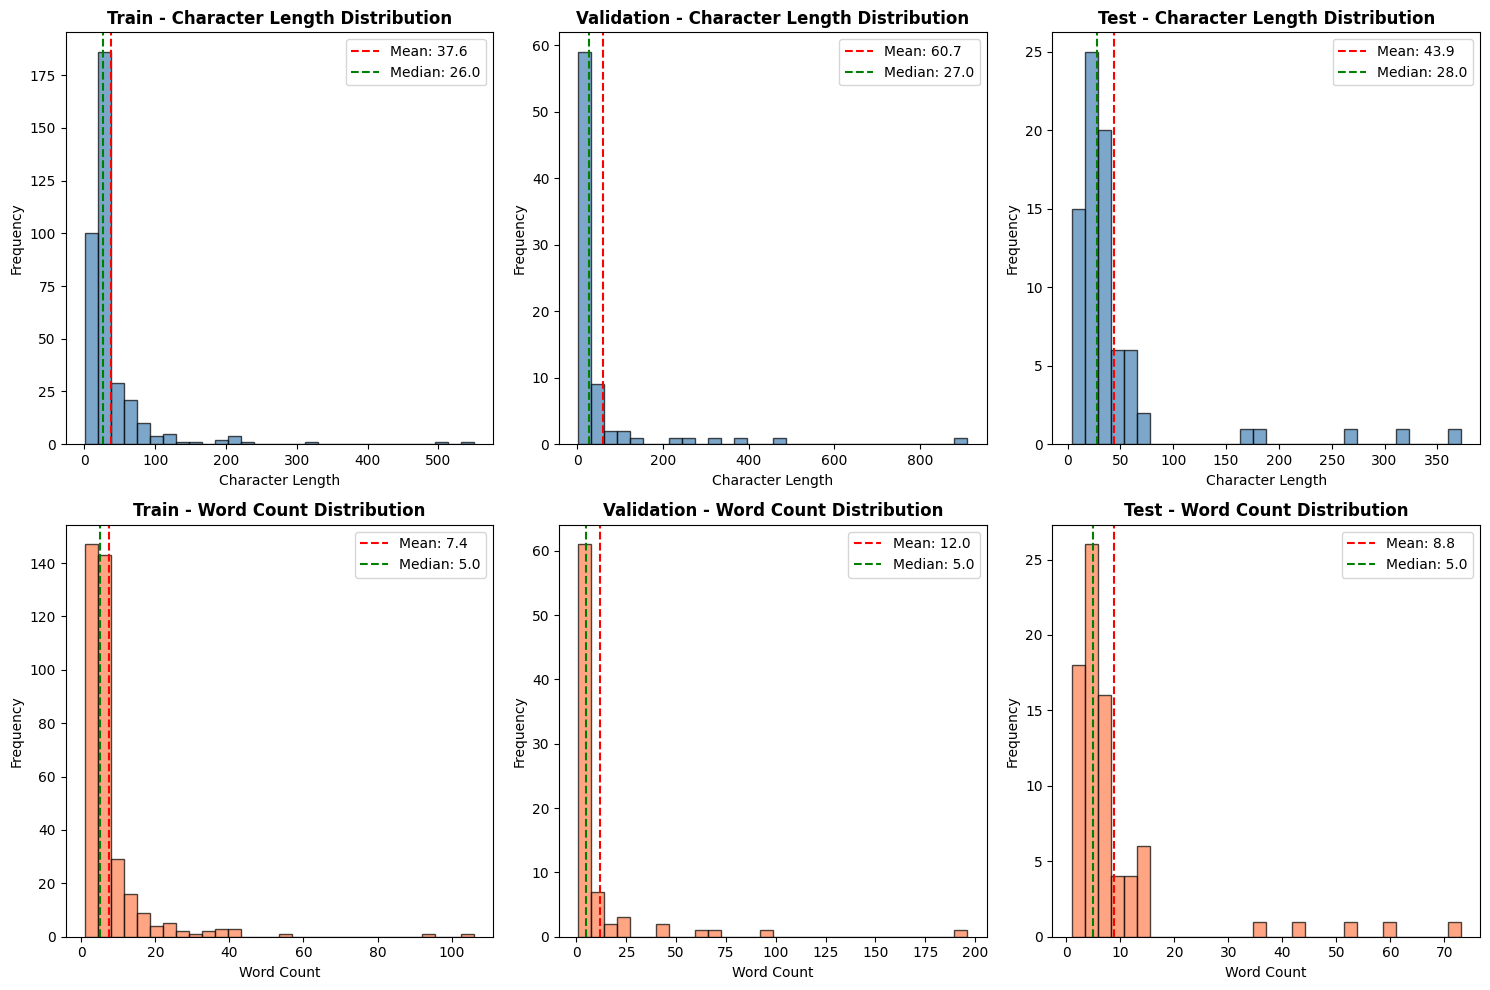


LABEL DISTRIBUTION ANALYSIS

=== Label Distribution Before Balancing ===

Train:
  General: 92 (25.1%)
  Spam: 73 (19.9%)
  NSFW: 75 (20.4%)
  Harassment: 127 (34.6%)

Validation:
  General: 19 (24.1%)
  Spam: 16 (20.3%)
  NSFW: 16 (20.3%)
  Harassment: 28 (35.4%)

Test:
  General: 20 (25.3%)
  Spam: 16 (20.3%)
  NSFW: 16 (20.3%)
  Harassment: 27 (34.2%)


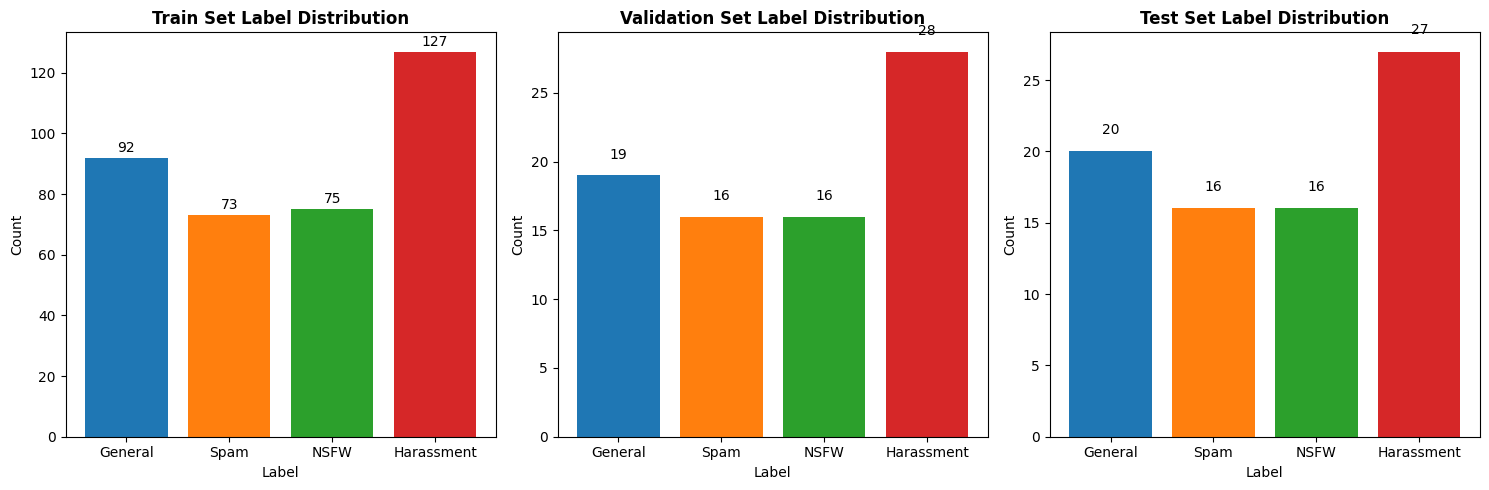


=== Distribution Comparison (Target: Similar across splits) ===
     Label  Train %  Val %  Test %  Max Diff %
   General     25.1   24.1    25.3         1.2
      Spam     19.9   20.3    20.3         0.4
      NSFW     20.4   20.3    20.3         0.1
Harassment     34.6   35.4    34.2         1.2

✅ Label distributions are well-balanced across splits (max difference: 1.2%)

CLASS DISTRIBUTION VISUALIZATION


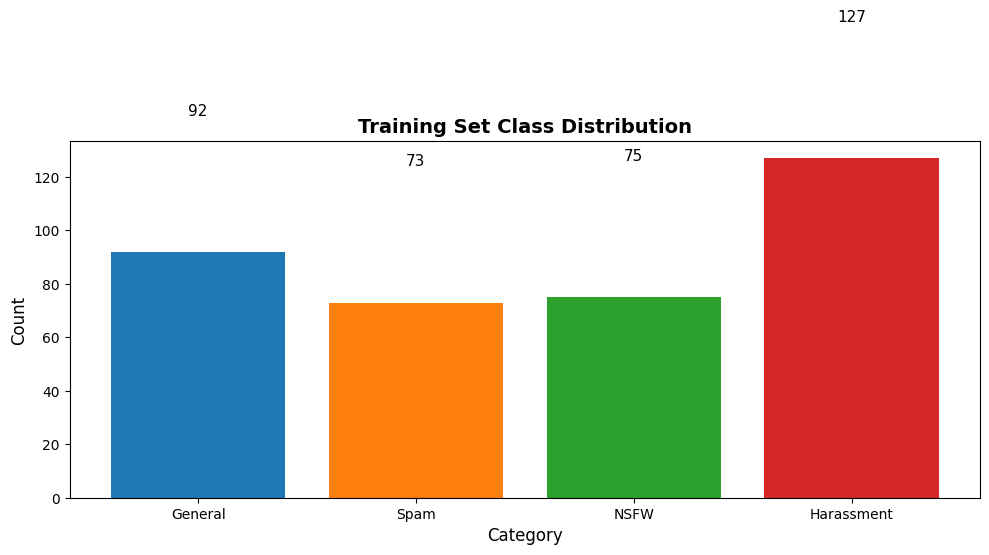


FEATURE EXTRACTION
Extracting word-level TF-IDF features...
Extracting character-level TF-IDF features...
Extracting metadata features...
Combining features...

Final feature shape: (367, 5006)
Total features: 5,006

EXPERIMENT 1: LINEAR SVC WITH CLASS WEIGHTS

=== Validation Results ===
Accuracy: 0.6962
F1 (macro): 0.6786
              precision    recall  f1-score   support

     General       0.48      0.58      0.52        19
        Spam       0.64      0.56      0.60        16
        NSFW       0.79      0.69      0.73        16
  Harassment       0.86      0.86      0.86        28

    accuracy                           0.70        79
   macro avg       0.69      0.67      0.68        79
weighted avg       0.71      0.70      0.70        79


=== Test Results ===
Accuracy: 0.6835
F1 (macro): 0.6856
              precision    recall  f1-score   support

     General       0.50      0.50      0.50        20
        Spam       0.71      0.75      0.73        16
        NSFW      

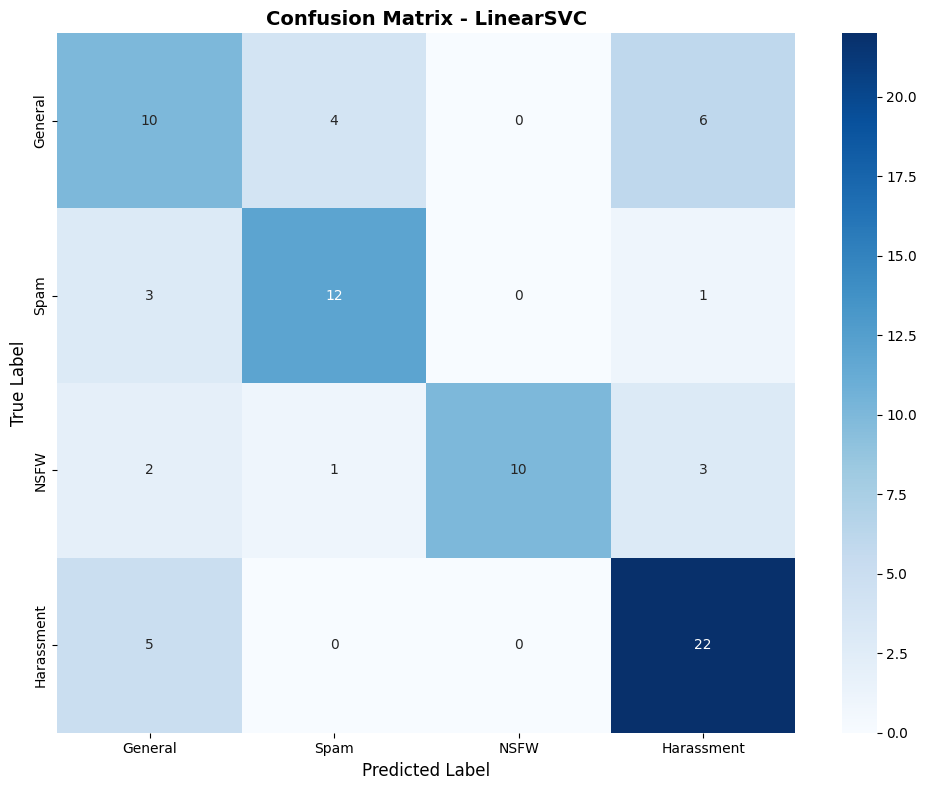


Normalized Confusion Matrix for LinearSVC:
            General   Spam   NSFW  Harassment
General       0.500  0.200  0.000       0.300
Spam          0.188  0.750  0.000       0.062
NSFW          0.125  0.062  0.625       0.188
Harassment    0.185  0.000  0.000       0.815

EXPERIMENT 2: LOGISTIC REGRESSION WITH CLASS WEIGHTS

=== Validation Results ===
Accuracy: 0.6835
F1 (macro): 0.6706
              precision    recall  f1-score   support

     General       0.44      0.58      0.50        19
        Spam       0.69      0.56      0.62        16
        NSFW       0.73      0.69      0.71        16
  Harassment       0.88      0.82      0.85        28

    accuracy                           0.68        79
   macro avg       0.69      0.66      0.67        79
weighted avg       0.71      0.68      0.69        79


=== Test Results ===
Accuracy: 0.7215
F1 (macro): 0.7232
              precision    recall  f1-score   support

     General       0.55      0.60      0.57        20
      

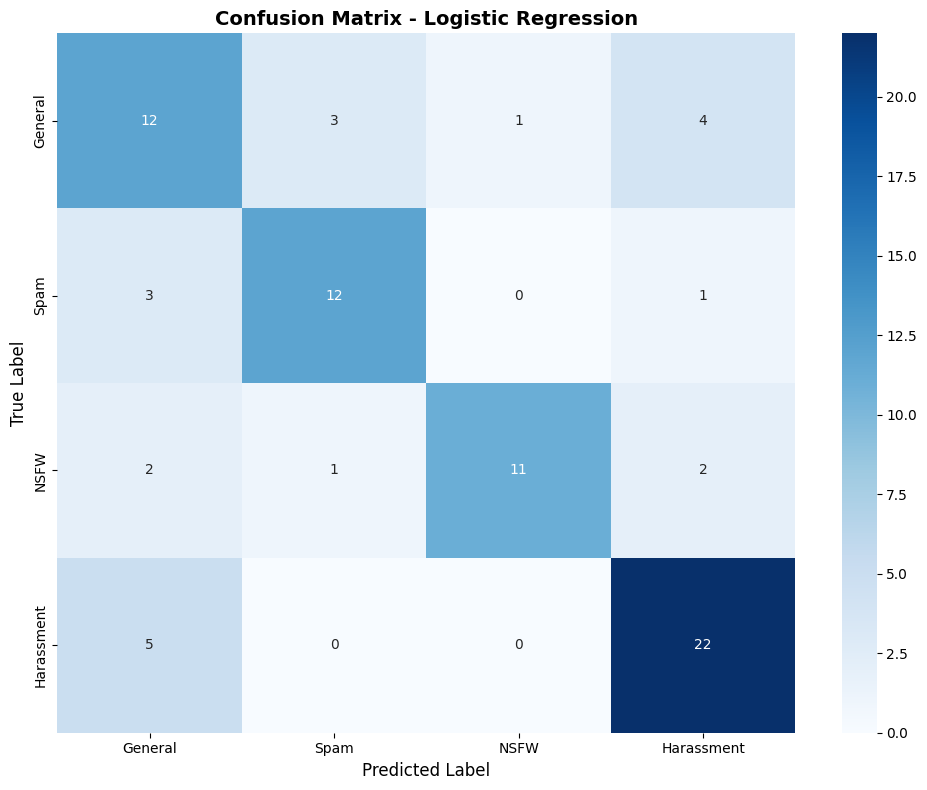


Normalized Confusion Matrix for Logistic Regression:
            General   Spam   NSFW  Harassment
General       0.600  0.150  0.050       0.200
Spam          0.188  0.750  0.000       0.062
NSFW          0.125  0.062  0.688       0.125
Harassment    0.185  0.000  0.000       0.815


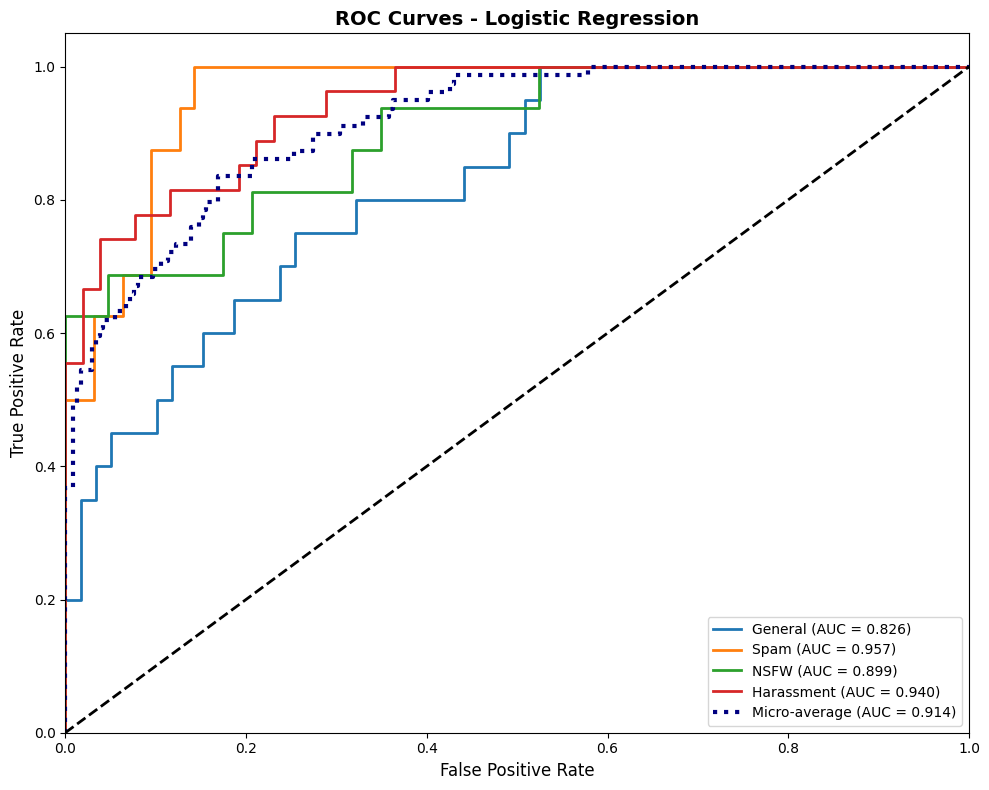

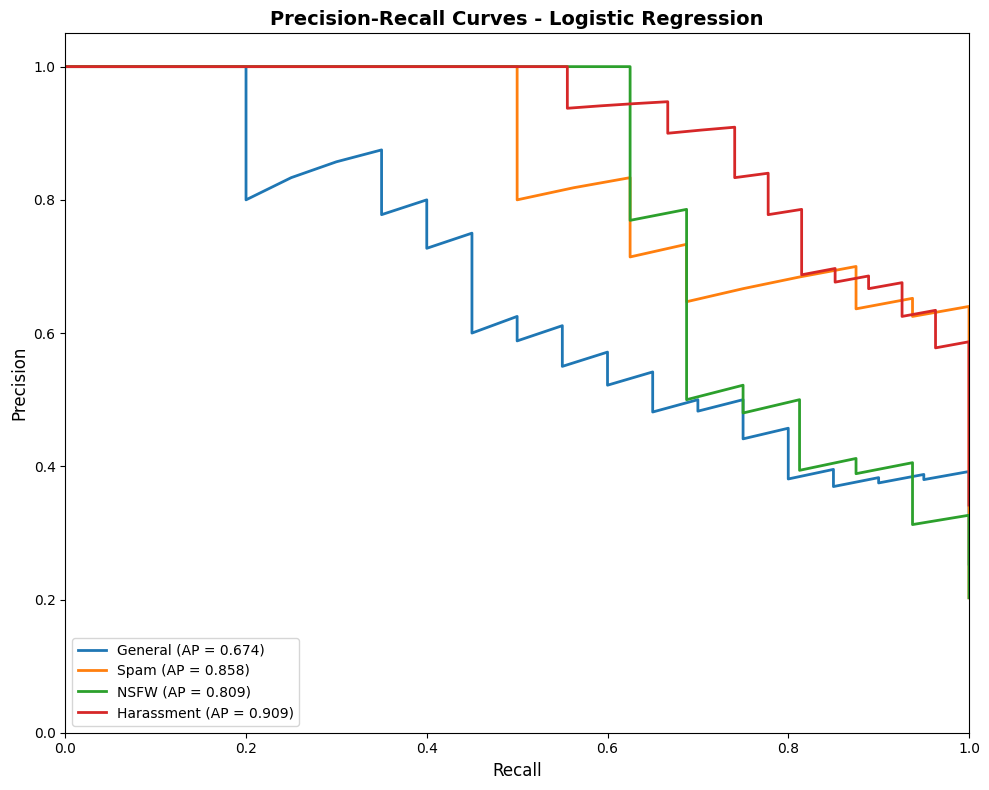


EXPERIMENT 3: LOGISTIC REGRESSION WITH FOCAL LOSS
Iteration 200/1000, Loss: 0.2431, Accuracy: 0.9809
Iteration 400/1000, Loss: 0.1798, Accuracy: 0.9864
Iteration 600/1000, Loss: 0.1527, Accuracy: 0.9891
Iteration 800/1000, Loss: 0.1370, Accuracy: 0.9918
Iteration 1000/1000, Loss: 0.1265, Accuracy: 0.9918

=== Validation Results ===
Accuracy: 0.6709
F1 (macro): 0.6546
              precision    recall  f1-score   support

     General       0.44      0.58      0.50        19
        Spam       0.64      0.56      0.60        16
        NSFW       0.71      0.62      0.67        16
  Harassment       0.88      0.82      0.85        28

    accuracy                           0.67        79
   macro avg       0.67      0.65      0.65        79
weighted avg       0.69      0.67      0.68        79


=== Test Results ===
Accuracy: 0.6835
F1 (macro): 0.6864
              precision    recall  f1-score   support

     General       0.46      0.55      0.50        20
        Spam       0.71    

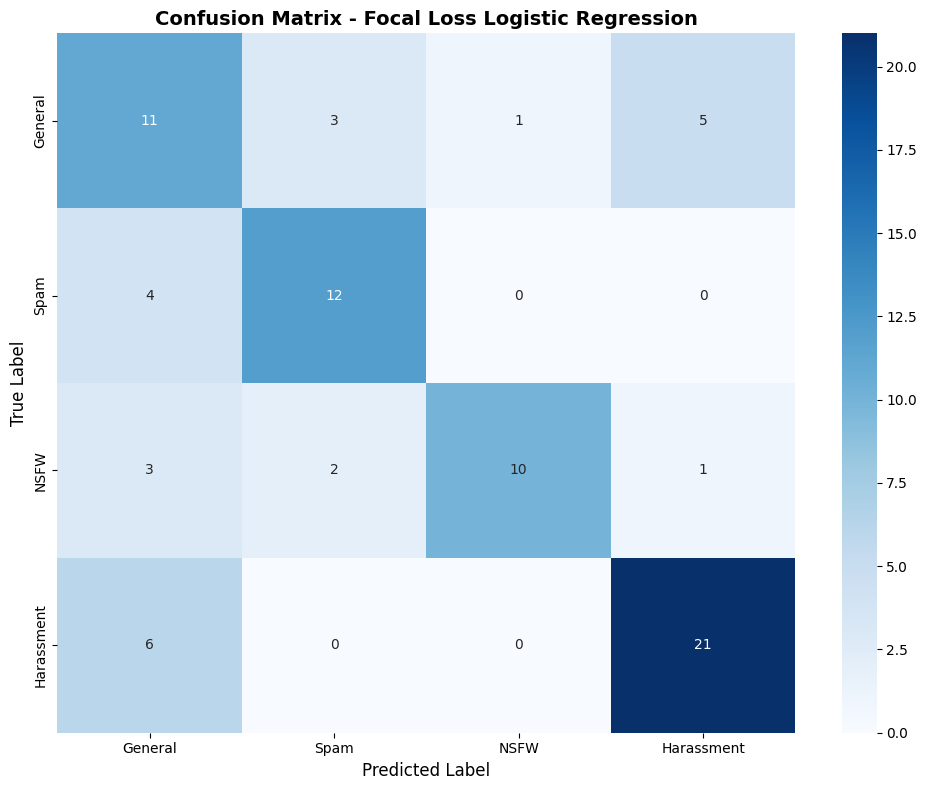


Normalized Confusion Matrix for Focal Loss Logistic Regression:
            General   Spam   NSFW  Harassment
General       0.550  0.150  0.050       0.250
Spam          0.250  0.750  0.000       0.000
NSFW          0.188  0.125  0.625       0.062
Harassment    0.222  0.000  0.000       0.778


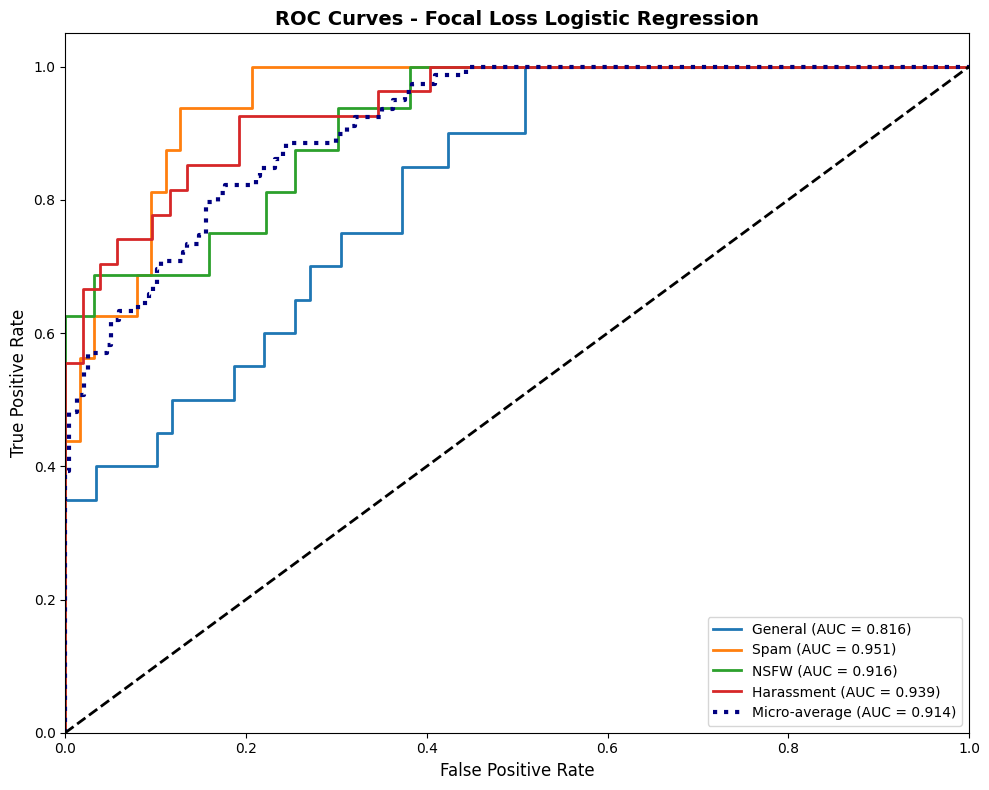


Class weights: [0.99728261 1.25684932 1.22333333 0.72244094]

EXPERIMENT 4: DISTILBERT WITH CLASS WEIGHTS


Map:   0%|          | 0/367 [00:00<?, ? examples/s]

Map:   0%|          | 0/79 [00:00<?, ? examples/s]

Map:   0%|          | 0/79 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBERT model loaded with 66,956,548 parameters
Training DistilBERT...


Epoch,Training Loss,Validation Loss,Accuracy,F1,F1 Weighted
1,No log,1.356007,0.518987,0.482816,0.502924
2,No log,1.197648,0.582278,0.510323,0.538698
3,1.315200,1.071068,0.594937,0.574273,0.599913
4,1.315200,0.976804,0.632911,0.604979,0.636315
5,0.926400,0.930561,0.696203,0.674909,0.699704
6,0.926400,0.907516,0.683544,0.663320,0.683569
7,0.598300,0.889756,0.708861,0.686125,0.708832
8,0.598300,0.888422,0.721519,0.698557,0.722568


DistilBERT training complete!



=== Validation Results ===
Accuracy: 0.7215
F1 (macro): 0.6986
              precision    recall  f1-score   support

     General       0.59      0.68      0.63        19
        Spam       0.69      0.56      0.62        16
        NSFW       0.65      0.69      0.67        16
  Harassment       0.89      0.86      0.87        28

    accuracy                           0.72        79
   macro avg       0.70      0.70      0.70        79
weighted avg       0.73      0.72      0.72        79




=== Test Results ===
Accuracy: 0.6835
F1 (macro): 0.6934
              precision    recall  f1-score   support

     General       0.52      0.70      0.60        20
        Spam       0.91      0.62      0.74        16
        NSFW       0.79      0.69      0.73        16
  Harassment       0.70      0.70      0.70        27

    accuracy                           0.68        79
   macro avg       0.73      0.68      0.69        79
weighted avg       0.72      0.68      0.69        79



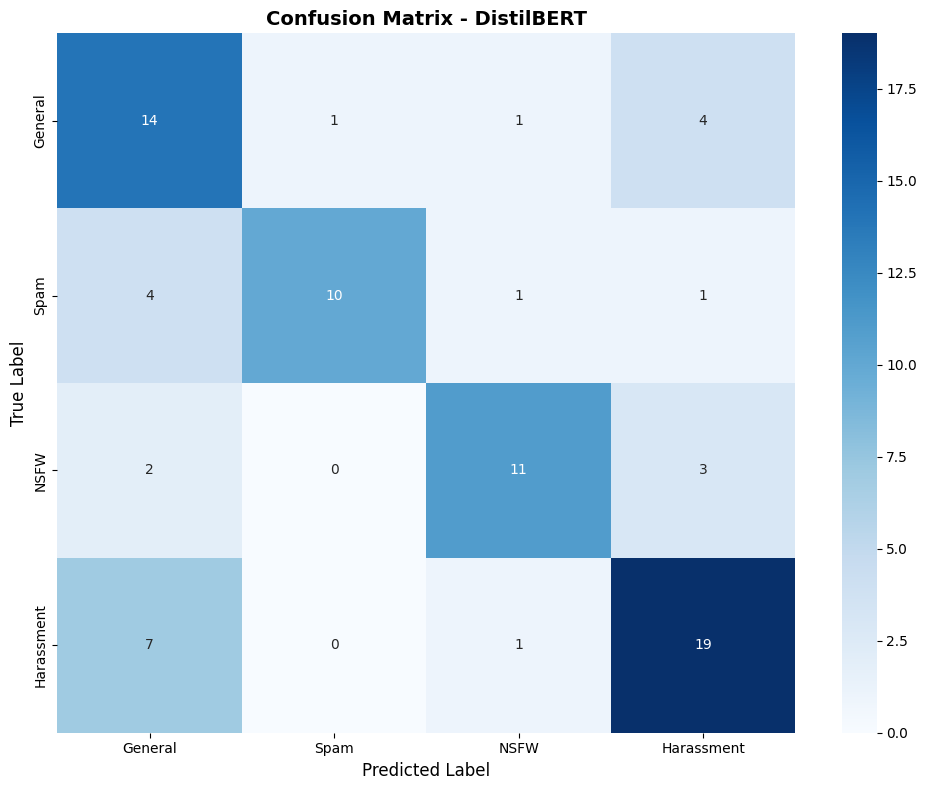


Normalized Confusion Matrix for DistilBERT:
            General   Spam   NSFW  Harassment
General       0.700  0.050  0.050       0.200
Spam          0.250  0.625  0.062       0.062
NSFW          0.125  0.000  0.688       0.188
Harassment    0.259  0.000  0.037       0.704


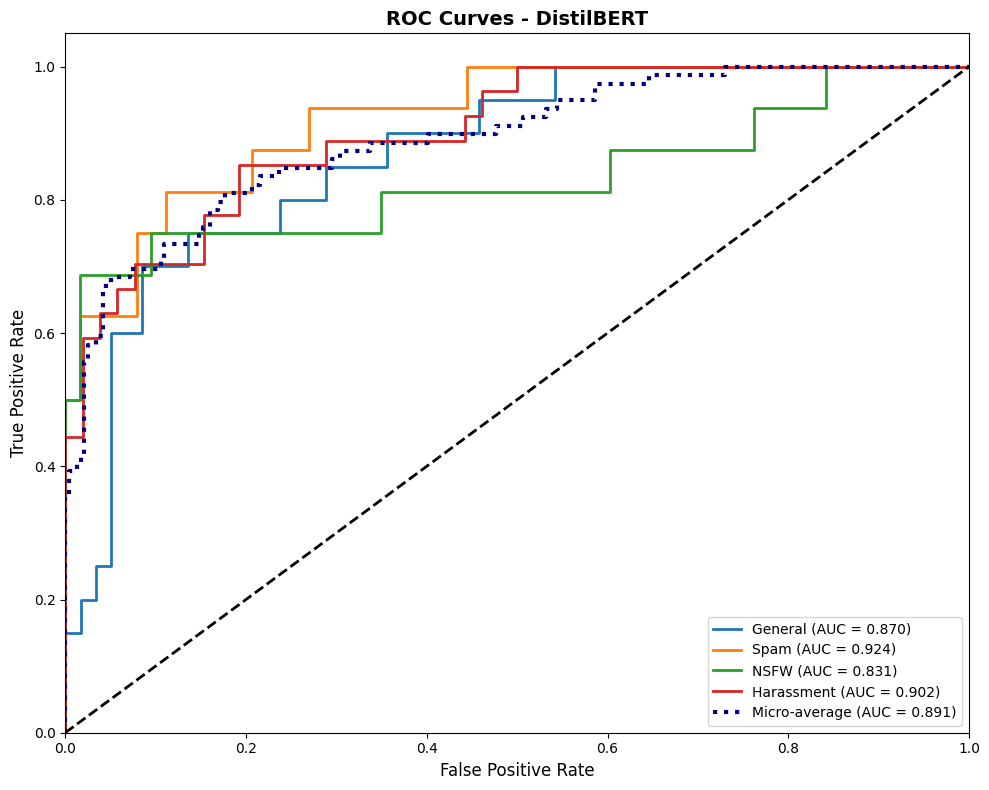


EXPERIMENT 5: DISTILBERT WITH FOCAL LOSS


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training DistilBERT with Focal Loss...


Epoch,Training Loss,Validation Loss,Accuracy,F1,F1 Weighted
1,No log,0.793691,0.189873,0.131589,0.116404
2,No log,0.740385,0.443038,0.441496,0.425088
3,0.771100,0.667470,0.468354,0.469013,0.470710
4,0.771100,0.600858,0.531646,0.518966,0.528493
5,0.597600,0.561829,0.569620,0.546670,0.563288
6,0.597600,0.534749,0.582278,0.564114,0.581027
7,0.410500,0.518620,0.620253,0.596806,0.615595
8,0.410500,0.508872,0.607595,0.587278,0.604397
9,0.304900,0.502829,0.620253,0.596316,0.615701


DistilBERT Focal Loss training complete!



=== Validation Results ===
Accuracy: 0.6203
F1 (macro): 0.5968
              precision    recall  f1-score   support

     General       0.50      0.37      0.42        19
        Spam       0.55      0.69      0.61        16
        NSFW       0.56      0.62      0.59        16
  Harassment       0.78      0.75      0.76        28

    accuracy                           0.62        79
   macro avg       0.60      0.61      0.60        79
weighted avg       0.62      0.62      0.62        79




=== Test Results ===
Accuracy: 0.5823
F1 (macro): 0.6039
              precision    recall  f1-score   support

     General       0.36      0.45      0.40        20
        Spam       0.85      0.69      0.76        16
        NSFW       0.63      0.75      0.69        16
  Harassment       0.64      0.52      0.57        27

    accuracy                           0.58        79
   macro avg       0.62      0.60      0.60        79
weighted avg       0.61      0.58      0.59        79



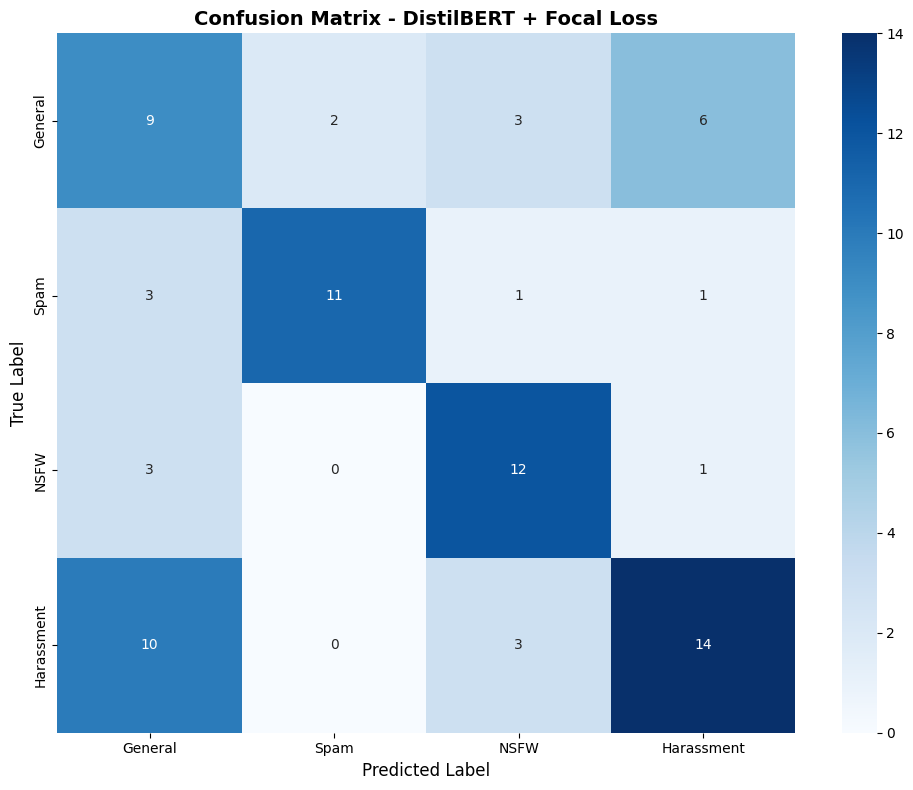


Normalized Confusion Matrix for DistilBERT + Focal Loss:
            General   Spam   NSFW  Harassment
General       0.450  0.100  0.150       0.300
Spam          0.188  0.688  0.062       0.062
NSFW          0.188  0.000  0.750       0.062
Harassment    0.370  0.000  0.111       0.519

EXPERIMENT 6: ROBERTA-BASE WITH CLASS WEIGHTS


Map:   0%|          | 0/367 [00:00<?, ? examples/s]

Map:   0%|          | 0/79 [00:00<?, ? examples/s]

Map:   0%|          | 0/79 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RoBERTa model loaded with 124,648,708 parameters
Training RoBERTa...


Epoch,Training Loss,Validation Loss,Accuracy,F1,F1 Weighted
1,No log,1.390613,0.240506,0.096939,0.093258
2,1.394700,1.385137,0.240506,0.096939,0.093258
3,1.394300,1.380277,0.240506,0.096939,0.093258
4,1.375300,1.370313,0.303797,0.177908,0.205675
5,1.373900,1.333034,0.683544,0.660490,0.674710
6,1.331100,1.256709,0.670886,0.649414,0.665406
7,1.271700,1.188645,0.632911,0.595904,0.614962
8,1.214600,1.167823,0.632911,0.601504,0.621168


RoBERTa training complete!



=== Validation Results ===
Accuracy: 0.6835
F1 (macro): 0.6605
              precision    recall  f1-score   support

     General       0.82      0.47      0.60        19
        Spam       0.59      0.62      0.61        16
        NSFW       0.71      0.62      0.67        16
  Harassment       0.68      0.89      0.77        28

    accuracy                           0.68        79
   macro avg       0.70      0.65      0.66        79
weighted avg       0.70      0.68      0.67        79




=== Test Results ===
Accuracy: 0.5949
F1 (macro): 0.5718
              precision    recall  f1-score   support

     General       0.70      0.35      0.47        20
        Spam       0.59      0.62      0.61        16
        NSFW       0.47      0.56      0.51        16
  Harassment       0.64      0.78      0.70        27

    accuracy                           0.59        79
   macro avg       0.60      0.58      0.57        79
weighted avg       0.61      0.59      0.58        79



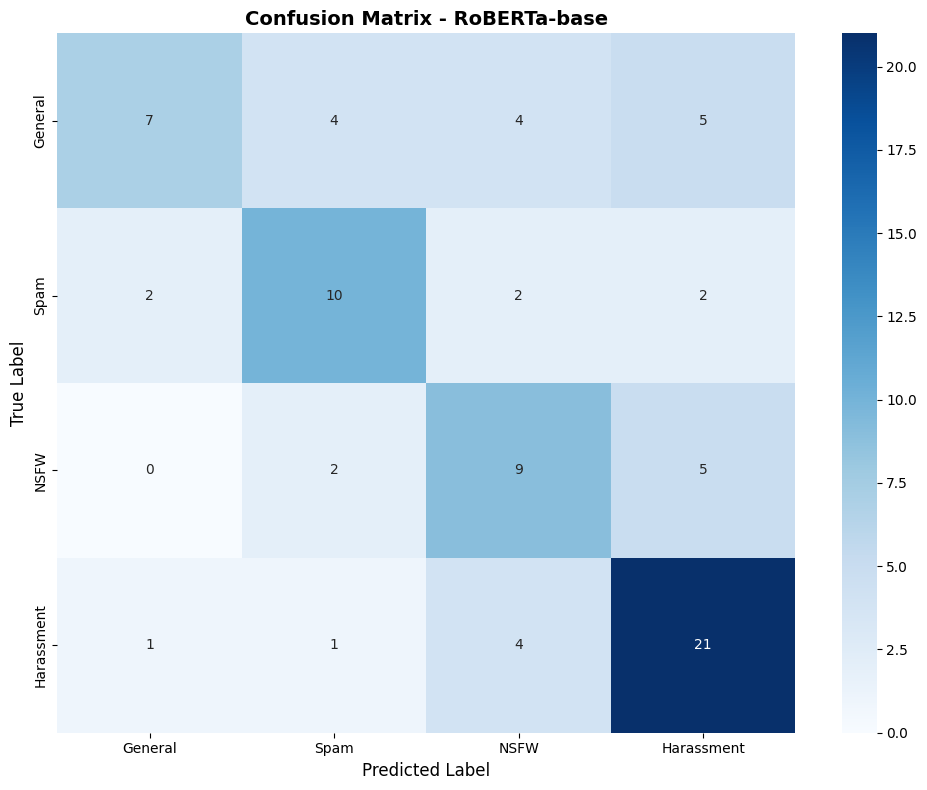


Normalized Confusion Matrix for RoBERTa-base:
            General   Spam   NSFW  Harassment
General       0.350  0.200  0.200       0.250
Spam          0.125  0.625  0.125       0.125
NSFW          0.000  0.125  0.562       0.312
Harassment    0.037  0.037  0.148       0.778


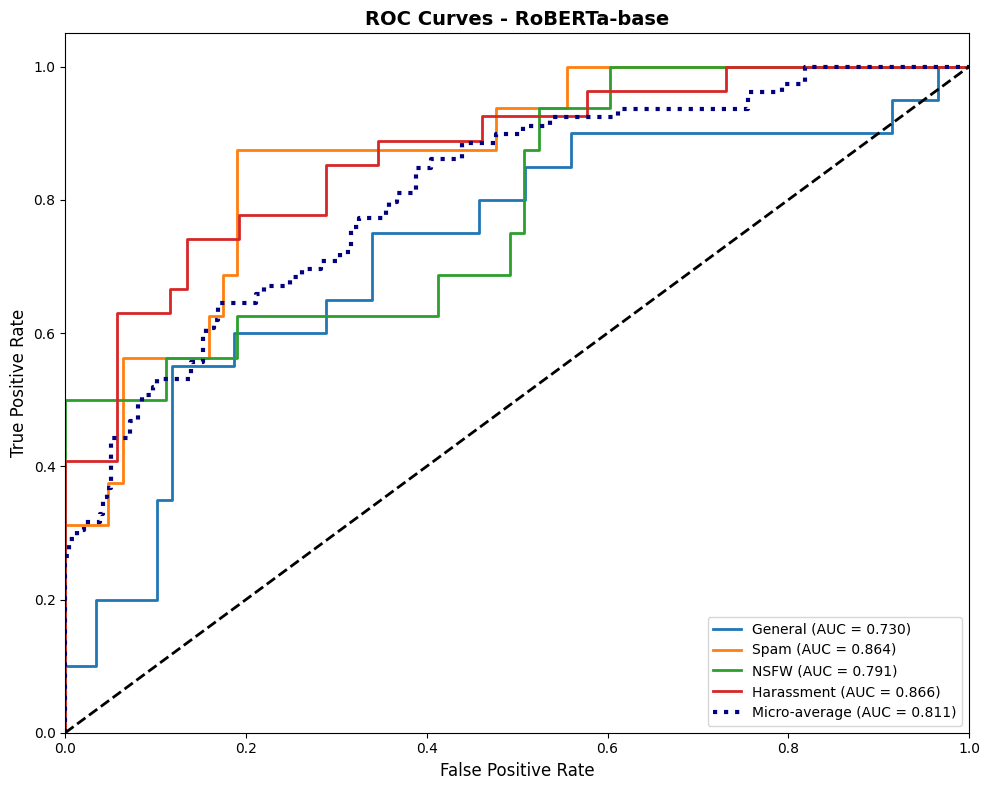

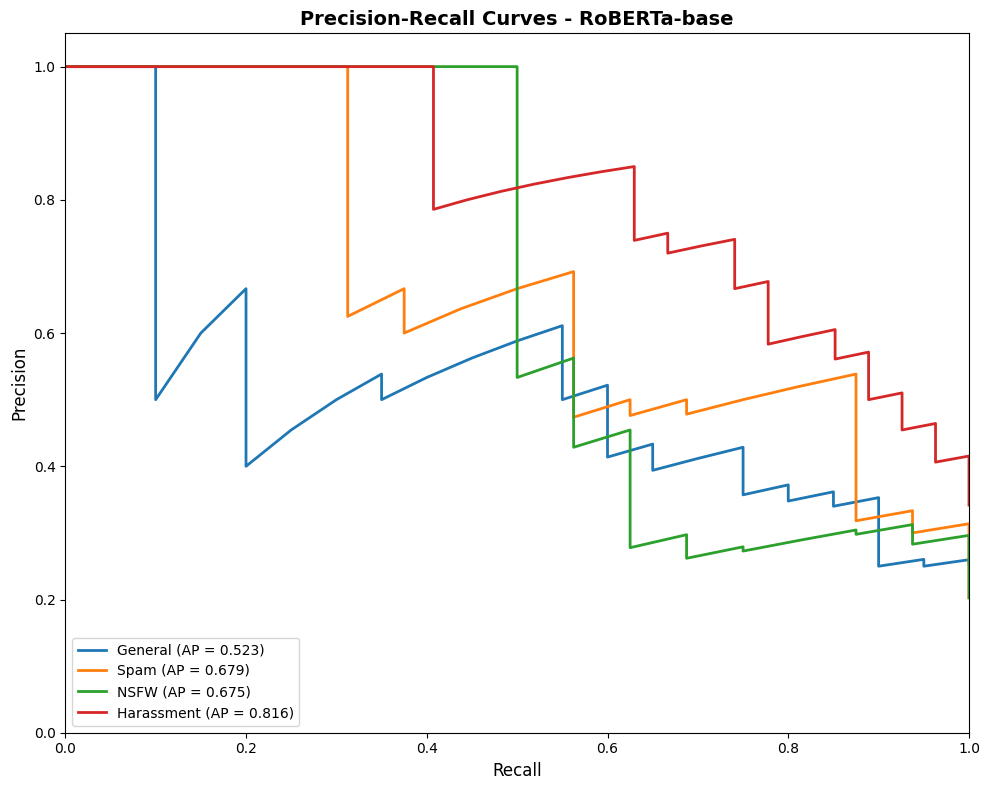


EXPERIMENT 7: ROBERTA-BASE WITH FOCAL LOSS


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training RoBERTa with Focal Loss...


Epoch,Training Loss,Validation Loss,Accuracy,F1,F1 Weighted
1,No log,0.791909,0.253165,0.188608,0.152796
2,0.802400,0.789111,0.215190,0.113799,0.092192
3,0.788800,0.786107,0.303797,0.215887,0.174896
4,0.803600,0.780555,0.341772,0.304113,0.259028
5,0.811600,0.767515,0.278481,0.194649,0.157690
6,0.742700,0.736341,0.329114,0.266974,0.222358
7,0.729500,0.699540,0.379747,0.353998,0.327691
8,0.698700,0.685933,0.443038,0.427035,0.399117


RoBERTa Focal Loss training complete!



=== Validation Results ===
Accuracy: 0.4430
F1 (macro): 0.4270
              precision    recall  f1-score   support

     General       0.44      0.37      0.40        19
        Spam       0.44      0.75      0.56        16
        NSFW       0.38      0.75      0.50        16
  Harassment       1.00      0.14      0.25        28

    accuracy                           0.44        79
   macro avg       0.56      0.50      0.43        79
weighted avg       0.63      0.44      0.40        79




=== Test Results ===
Accuracy: 0.5063
F1 (macro): 0.5070
              precision    recall  f1-score   support

     General       0.50      0.45      0.47        20
        Spam       0.55      0.75      0.63        16
        NSFW       0.37      0.69      0.48        16
  Harassment       0.89      0.30      0.44        27

    accuracy                           0.51        79
   macro avg       0.58      0.55      0.51        79
weighted avg       0.62      0.51      0.50        79



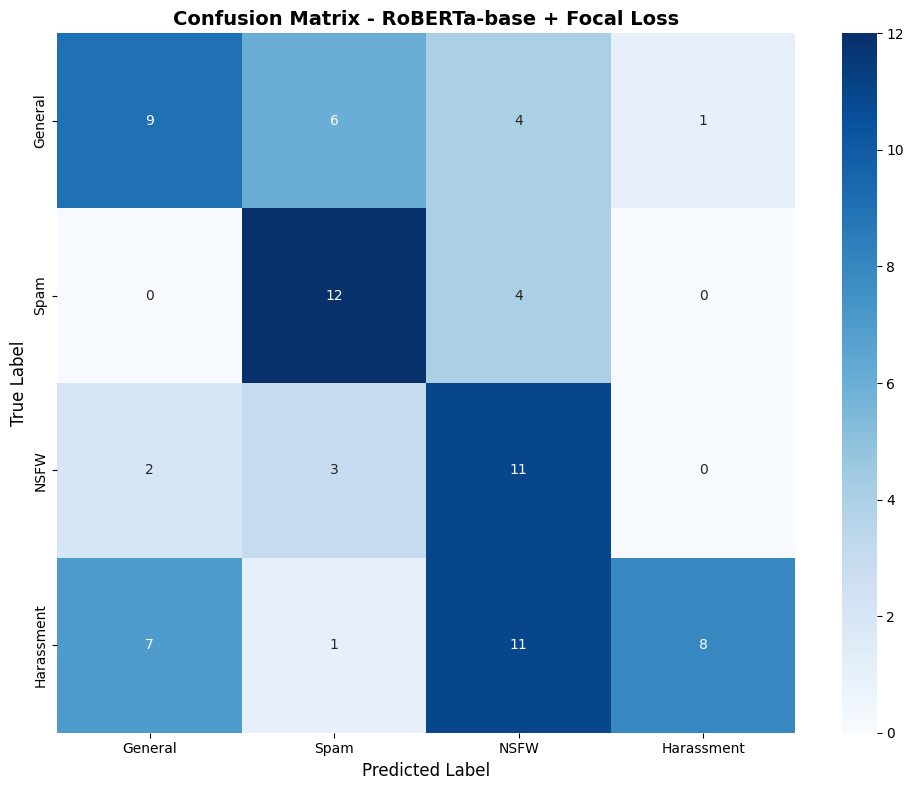


Normalized Confusion Matrix for RoBERTa-base + Focal Loss:
            General   Spam   NSFW  Harassment
General       0.450  0.300  0.200       0.050
Spam          0.000  0.750  0.250       0.000
NSFW          0.125  0.188  0.688       0.000
Harassment    0.259  0.037  0.407       0.296

MODEL COMPARISON

--------------------------------------------------------------------------------
Model                        Val Acc     Val F1   Test Acc    Test F1
--------------------------------------------------------------------------------
LinearSVC                     0.6962     0.6786     0.6835     0.6856
Logistic Regression           0.6835     0.6706     0.7215     0.7232
Focal Loss LR                 0.6709     0.6546     0.6835     0.6864
DistilBERT                    0.7215     0.6986     0.6835     0.6934
DistilBERT+Focal              0.6203     0.5968     0.5823     0.6039
RoBERTa-base                  0.6835     0.6605     0.5949     0.5718
RoBERTa+Focal                 0.4430   

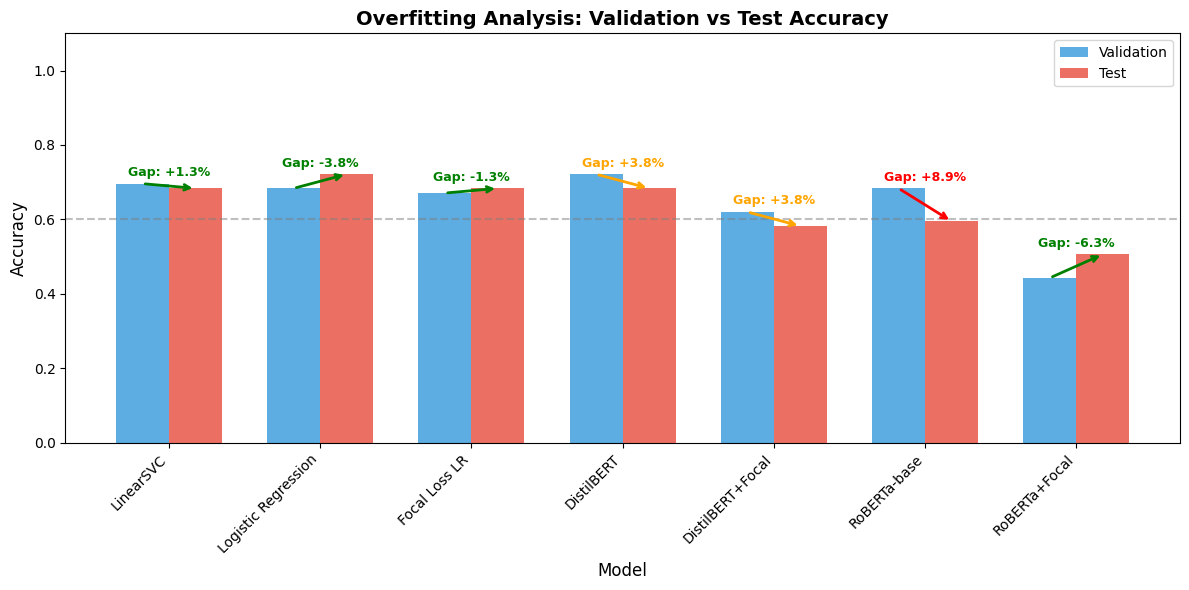


=== Overfitting/Underfitting Indicators ===

OVERFITTING indicators:
- Training accuracy much higher than validation/test accuracy
- Validation loss starts increasing while training loss decreases
- Large gap between validation and test performance
- Model memorizes training data but fails to generalize

UNDERFITTING indicators:
- Both training and validation accuracy are low
- Model fails to capture patterns in data
- High bias, low variance

SOLUTIONS applied in this code:
- Increased dropout (0.1 → 0.2) for RoBERTa
- Higher weight decay (0.1 → 0.2-0.3) for transformer models
- Label smoothing (0.1) to prevent overconfidence
- Lower learning rates for complex models
- Early stopping with patience
- Gradient clipping



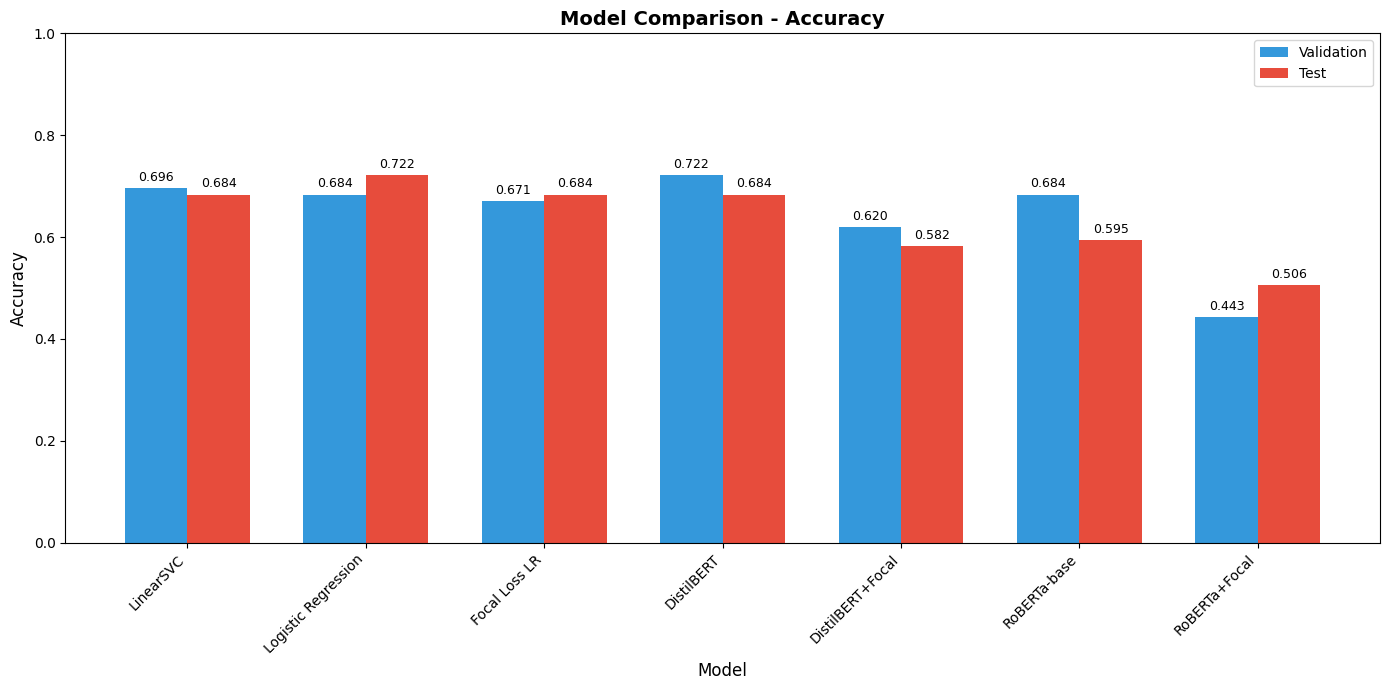

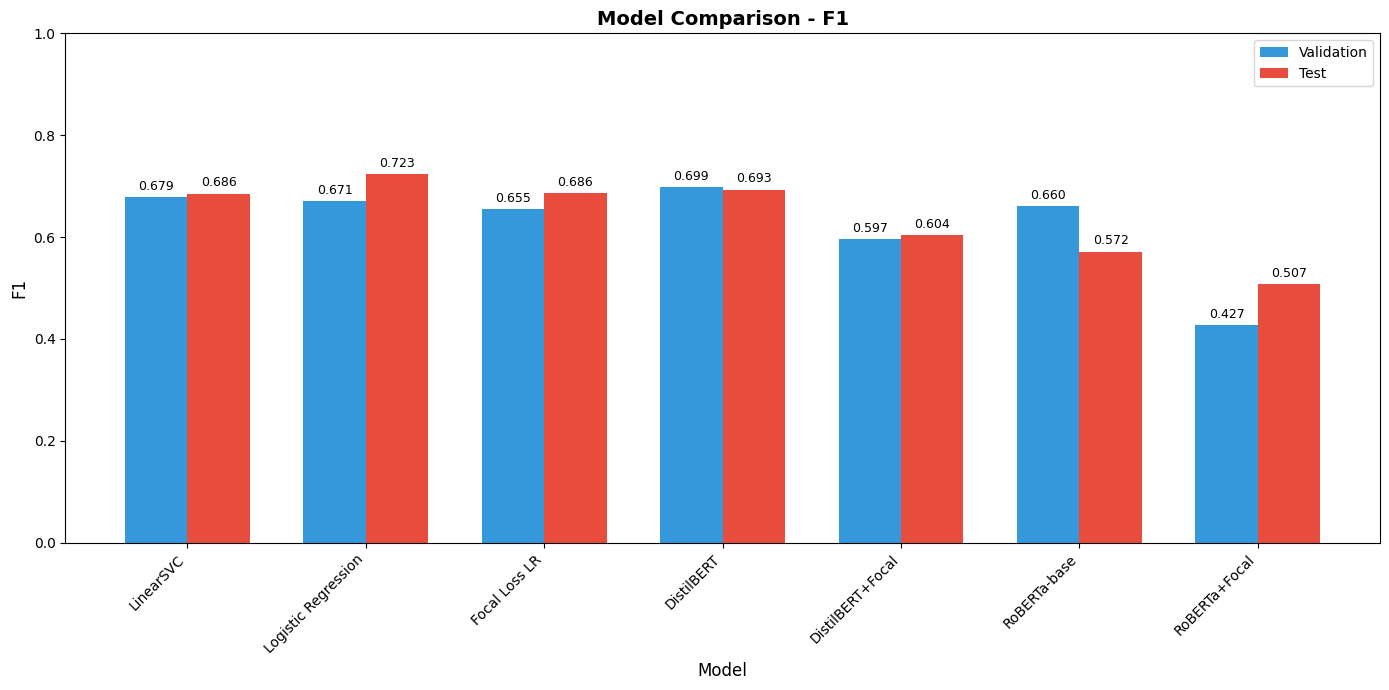


PREDICTION FUNCTIONS
Prediction functions defined!

EXTENDED TESTING CASES

RUNNING ALL TEST CASES

--- Test 1/55 ---
Comment: 'This is a great project, keep up the good work!'
Expected: General

Text: 'This is a great project, keep up the good work!'
--------------------------------------------------
LinearSVC:            General
Logistic Regression:  General ({'General': '0.348', 'Spam': '0.196', 'NSFW': '0.191', 'Harassment': '0.265'})
DistilBERT:           General ({'General': '0.527', 'Spam': '0.262', 'NSFW': '0.106', 'Harassment': '0.105'})
RoBERTa:              General ({'General': '0.262', 'Spam': '0.250', 'NSFW': '0.236', 'Harassment': '0.251'})

--- Test 2/55 ---
Comment: 'Free robux now! Click this link to get unlimited coins!'
Expected: Spam

Text: 'Free robux now! Click this link to get unlimited coins!'
--------------------------------------------------
LinearSVC:            Spam
Logistic Regression:  Spam ({'General': '0.048', 'Spam': '0.892', 'NSFW': '0.027', 'Harassme

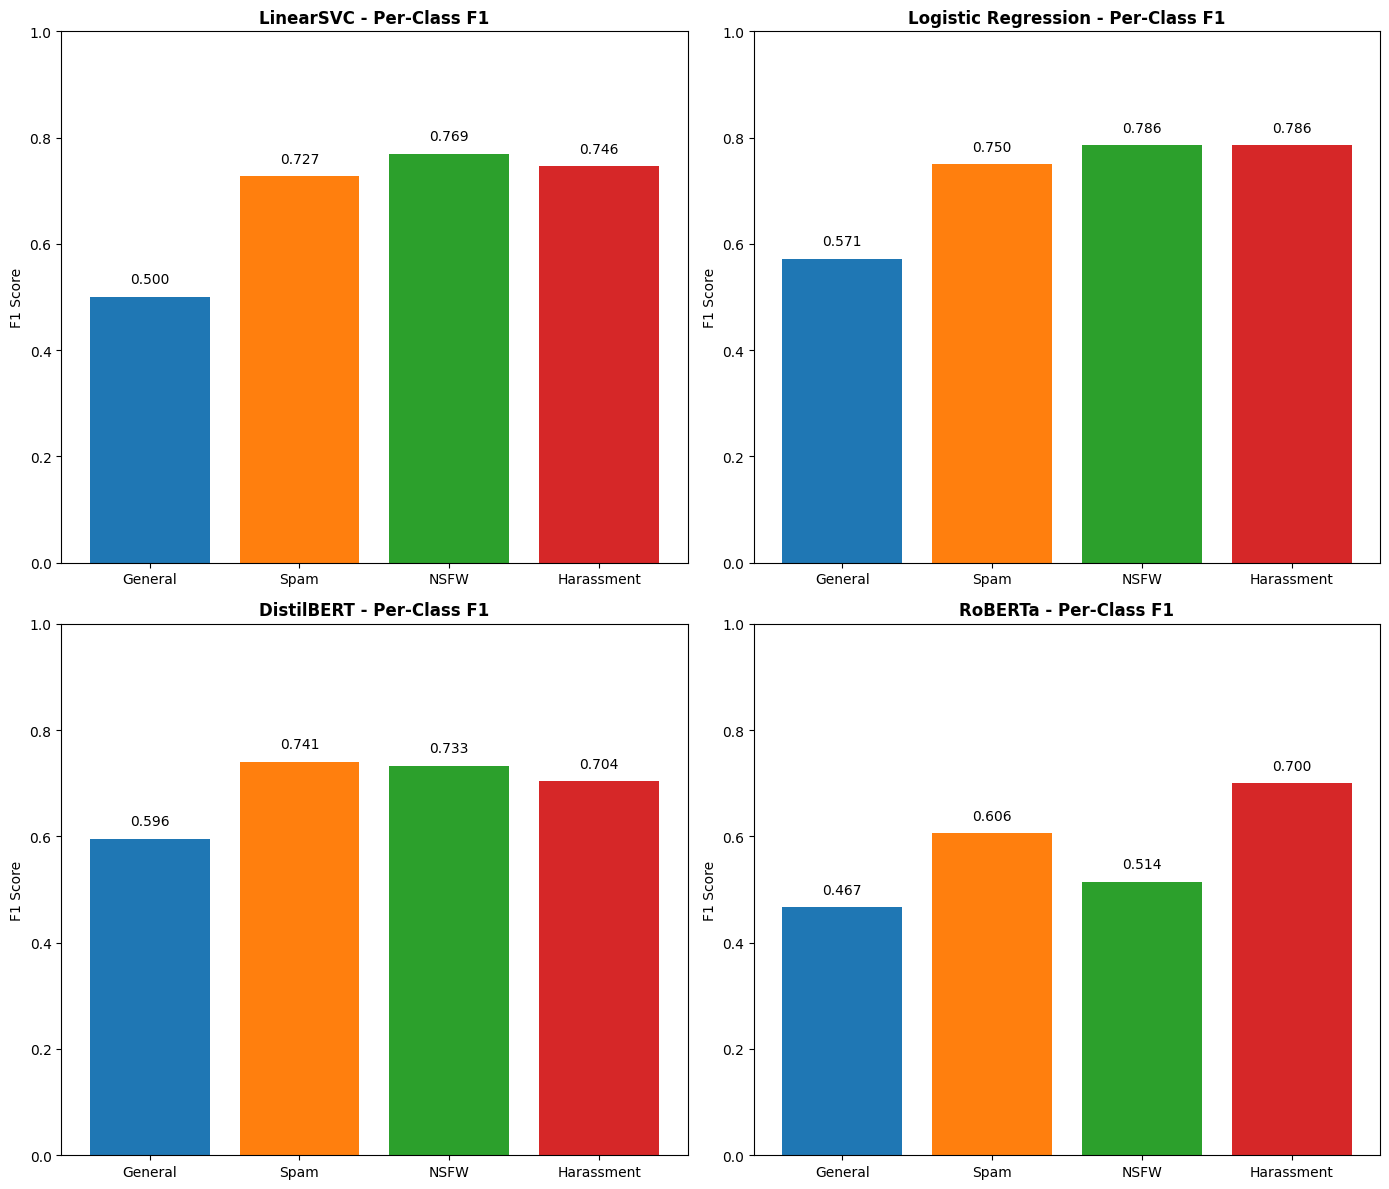


FINAL SUMMARY

This enhanced NLP project includes:

1. MODELS:
   - LinearSVC with TF-IDF features
   - Logistic Regression with TF-IDF features  
   - Focal Loss Logistic Regression (custom implementation)
   - DistilBERT with class weights
   - DistilBERT with Focal Loss
   - RoBERTa-base with class weights
   - RoBERTa-base with Focal Loss

2. IMBALANCE HANDLING TECHNIQUES:
   - Class weights (balanced)
   - Focal Loss (gamma=2.0)
   - Custom alpha weighting
   - Label smoothing (for transformers)

3. REGULARIZATION (to prevent overfitting):
   - Increased dropout (0.2) for RoBERTa
   - Higher weight decay (0.15-0.3)
   - Label smoothing factor (0.1)
   - Gradient clipping (max_norm=1.0)
   - Early stopping with patience
   - Learning rate warmup

4. VISUALIZATIONS:
   - Class distribution plots (train/val/test)
   - Text length statistics & histograms
   - Confusion matrices for each model
   - ROC curves (multi-class)
   - Precision-Recall curves
   - Model comparison bar charts


In [ ]:
# -*- coding: utf-8 -*-
"""
Enhanced NLP Project for Comment Classification
Features:
- Multiple models: LinearSVC, Logistic Regression, DistilBERT, RoBERTa-base
- Imbalanced data handling: Focal Loss, Class Weights, SMOTE
- Comprehensive visualizations: Confusion matrices, ROC curves, PR curves
- Extended testing cases
"""

# ============================================================================
# INSTALLATION
# ============================================================================
# !pip install huggingface_hub datasets scikit-learn transformers torch accelerate
# !pip install imbalanced-learn seaborn matplotlib plotly

import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# IMPORTS
# ============================================================================
import re
import numpy as np
import pandas as pd
from collections import Counter

import nltk
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, accuracy_score, f1_score,
    confusion_matrix, roc_curve, auc, precision_recall_curve,
    average_precision_score
)
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.utils.class_weight import compute_class_weight
from scipy.sparse import hstack

import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

from transformers import (
    DistilBertTokenizer, DistilBertForSequenceClassification,
    RobertaTokenizer, RobertaForSequenceClassification,
    Trainer, TrainingArguments, EarlyStoppingCallback
)
from datasets import Dataset, load_dataset

# ============================================================================
# CONFIGURATION
# ============================================================================
RANDOM_STATE = 42
NUM_LABELS = 4
LABEL_MAP = {0: 'General', 1: 'Spam', 2: 'NSFW', 3: 'Harassment'}
LABEL_NAMES = ['General', 'Spam', 'NSFW', 'Harassment']

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# ============================================================================
# TEXT CLEANING
# ============================================================================
def clean_text(text):
    """Clean and preprocess text data."""
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove usernames
    text = re.sub(r'@\w+', '', text)
    # Remove non-alphanumeric (keep spaces)
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)
    # Remove long sequences
    text = re.sub(r'[a-zA-Z0-9]{30,}', '', text)
    # Lowercase
    text = text.lower()
    # Lemmatization
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words]
    text = ' '.join(words)
    # Whitespace cleanup
    text = re.sub(r'\s+', ' ', text).strip()
    return text

print("Text cleaning function defined.")

# ============================================================================
# DATA LOADING AND PREPROCESSING
# ============================================================================
print("\n" + "="*60)
print("LOADING DATA")
print("="*60)

# Load dataset
comments_dataset = load_dataset("RayhanADev/replit-comments-categorized")
print(f"Dataset loaded successfully!")

# Check label distribution
label_distribution = comments_dataset['train']['label']
print(f"\nOriginal Label Distribution: {Counter(label_distribution)}")

# Load and combine data
df_train = comments_dataset['train'].to_pandas()
df_val = comments_dataset['validation'].to_pandas()
df_test = comments_dataset['test'].to_pandas()
original_full_df = pd.concat([df_train, df_val, df_test])

# Try to load augmented data
try:
    aug_df = pd.read_csv('/content/augmented_data.csv')
    print(f"Loaded {len(aug_df)} synthetic samples.")
except FileNotFoundError:
    print("augmented_data.csv not found - proceeding without augmentation")
    aug_df = pd.DataFrame(columns=['cleaned_text', 'label'])

# Clean data
original_full_df['cleaned_text'] = original_full_df['text'].apply(clean_text)
original_full_df = original_full_df[original_full_df['cleaned_text'].apply(len) > 0]

# Merge and deduplicate
combined_df = pd.concat([
    original_full_df[['cleaned_text', 'label']],
    aug_df[['cleaned_text', 'label']] if len(aug_df) > 0 else pd.DataFrame()
])
combined_df = combined_df.drop_duplicates(subset=['cleaned_text'])

print(f"\nTotal Combined Samples: {len(combined_df)}")
print("Class Distribution:\n", combined_df['label'].value_counts(normalize=True))

# Stratified split
train_df, temp_df = train_test_split(
    combined_df, test_size=0.3, stratify=combined_df['label'], random_state=RANDOM_STATE
)
val_df, test_df = train_test_split(
    temp_df, test_size=0.5, stratify=temp_df['label'], random_state=RANDOM_STATE
)

print(f"\nTrain shape: {train_df.shape}")
print(f"Val shape: {val_df.shape}")
print(f"Test shape: {test_df.shape}")

# ============================================================================
# TEXT LENGTH STATISTICS
# ============================================================================
def compute_length_stats(df, name):
    """Compute comprehensive text length statistics."""
    lengths = df['cleaned_text'].apply(len)
    word_counts = df['cleaned_text'].apply(lambda x: len(x.split()))

    stats = {
        'Dataset': name,
        'Count': len(df),
        'Char_Mean': lengths.mean(),
        'Char_Std': lengths.std(),
        'Char_Min': lengths.min(),
        'Char_Max': lengths.max(),
        'Char_Median': lengths.median(),
        'Char_Q25': lengths.quantile(0.25),
        'Char_Q75': lengths.quantile(0.75),
        'Word_Mean': word_counts.mean(),
        'Word_Std': word_counts.std(),
        'Word_Min': word_counts.min(),
        'Word_Max': word_counts.max(),
        'Word_Median': word_counts.median(),
    }
    return stats, lengths, word_counts

print("\n" + "="*60)
print("TEXT LENGTH STATISTICS")
print("="*60)

# Compute stats for each split
train_stats, train_lengths, train_words = compute_length_stats(train_df, 'Train')
val_stats, val_lengths, val_words = compute_length_stats(val_df, 'Validation')
test_stats, test_lengths, test_words = compute_length_stats(test_df, 'Test')

# Create summary DataFrame
stats_df = pd.DataFrame([train_stats, val_stats, test_stats])
print("\n=== Character Length Statistics ===")
print(stats_df[['Dataset', 'Count', 'Char_Mean', 'Char_Std', 'Char_Min', 'Char_Max', 'Char_Median']].to_string(index=False))

print("\n=== Word Count Statistics ===")
print(stats_df[['Dataset', 'Count', 'Word_Mean', 'Word_Std', 'Word_Min', 'Word_Max', 'Word_Median']].to_string(index=False))

# Visualize length distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Character length histograms
for ax, (lengths, name) in zip(axes[0], [(train_lengths, 'Train'), (val_lengths, 'Validation'), (test_lengths, 'Test')]):
    ax.hist(lengths, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    ax.axvline(lengths.mean(), color='red', linestyle='--', label=f'Mean: {lengths.mean():.1f}')
    ax.axvline(lengths.median(), color='green', linestyle='--', label=f'Median: {lengths.median():.1f}')
    ax.set_title(f'{name} - Character Length Distribution', fontweight='bold')
    ax.set_xlabel('Character Length')
    ax.set_ylabel('Frequency')
    ax.legend()

# Word count histograms
for ax, (words, name) in zip(axes[1], [(train_words, 'Train'), (val_words, 'Validation'), (test_words, 'Test')]):
    ax.hist(words, bins=30, color='coral', edgecolor='black', alpha=0.7)
    ax.axvline(words.mean(), color='red', linestyle='--', label=f'Mean: {words.mean():.1f}')
    ax.axvline(words.median(), color='green', linestyle='--', label=f'Median: {words.median():.1f}')
    ax.set_title(f'{name} - Word Count Distribution', fontweight='bold')
    ax.set_xlabel('Word Count')
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()

# ============================================================================
# LABEL DISTRIBUTION ANALYSIS & BALANCING
# ============================================================================
print("\n" + "="*60)
print("LABEL DISTRIBUTION ANALYSIS")
print("="*60)

def get_label_distribution(df, name):
    """Get label distribution as counts and percentages."""
    counts = df['label'].value_counts().sort_index()
    percentages = df['label'].value_counts(normalize=True).sort_index() * 100
    dist = pd.DataFrame({
        'Label': [LABEL_NAMES[i] for i in counts.index],
        'Count': counts.values,
        'Percentage': percentages.values
    })
    dist['Dataset'] = name
    return dist

train_dist = get_label_distribution(train_df, 'Train')
val_dist = get_label_distribution(val_df, 'Validation')
test_dist = get_label_distribution(test_df, 'Test')

print("\n=== Label Distribution Before Balancing ===")
for dist, name in [(train_dist, 'Train'), (val_dist, 'Validation'), (test_dist, 'Test')]:
    print(f"\n{name}:")
    for _, row in dist.iterrows():
        print(f"  {row['Label']}: {row['Count']} ({row['Percentage']:.1f}%)")

# Visualize label distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for ax, (df, name) in zip(axes, [(train_df, 'Train'), (val_df, 'Validation'), (test_df, 'Test')]):
    counts = df['label'].value_counts().sort_index()
    bars = ax.bar([LABEL_NAMES[i] for i in counts.index], counts.values, color=colors)
    ax.set_title(f'{name} Set Label Distribution', fontweight='bold')
    ax.set_ylabel('Count')
    ax.set_xlabel('Label')
    for bar, count in zip(bars, counts.values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Check if distributions are similar
print("\n=== Distribution Comparison (Target: Similar across splits) ===")
train_pct = train_df['label'].value_counts(normalize=True).sort_index()
val_pct = val_df['label'].value_counts(normalize=True).sort_index()
test_pct = test_df['label'].value_counts(normalize=True).sort_index()

comparison_df = pd.DataFrame({
    'Label': LABEL_NAMES,
    'Train %': (train_pct.values * 100).round(1),
    'Val %': (val_pct.values * 100).round(1),
    'Test %': (test_pct.values * 100).round(1),
})
comparison_df['Max Diff %'] = comparison_df[['Train %', 'Val %', 'Test %']].apply(
    lambda x: x.max() - x.min(), axis=1
).round(1)
print(comparison_df.to_string(index=False))

# The stratified split should already ensure similar distributions
# But let's verify and report
max_diff = comparison_df['Max Diff %'].max()
if max_diff < 5:
    print(f"\n✅ Label distributions are well-balanced across splits (max difference: {max_diff}%)")
else:
    print(f"\n⚠️ Label distributions have some variance (max difference: {max_diff}%)")

# ============================================================================
# VISUALIZATION UTILITIES
# ============================================================================
def plot_confusion_matrix(y_true, y_pred, title, labels=LABEL_NAMES, save_path=None):
    """Plot and display confusion matrix."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm, annot=True, fmt='d', cmap='Blues',
        xticklabels=labels, yticklabels=labels
    )
    plt.title(f'Confusion Matrix - {title}', fontsize=14, fontweight='bold')
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=150, bbox_inches='tight')
    plt.show()

    # Print normalized confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(f"\nNormalized Confusion Matrix for {title}:")
    print(pd.DataFrame(cm_normalized, index=labels, columns=labels).round(3))
    return cm


def plot_roc_curves(y_true, y_proba, title, labels=LABEL_NAMES, save_path=None):
    """Plot ROC curves for multi-class classification."""
    n_classes = len(labels)
    y_true_bin = label_binarize(y_true, classes=list(range(n_classes)))

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Micro-average
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_proba.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure(figsize=(10, 8))
    colors = cycle(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i], tpr[i], color=color, lw=2,
            label=f'{labels[i]} (AUC = {roc_auc[i]:.3f})'
        )

    plt.plot(
        fpr["micro"], tpr["micro"], color='navy', linestyle=':', lw=3,
        label=f'Micro-average (AUC = {roc_auc["micro"]:.3f})'
    )

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(f'ROC Curves - {title}', fontsize=14, fontweight='bold')
    plt.legend(loc="lower right")
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=150, bbox_inches='tight')
    plt.show()

    return roc_auc


def plot_precision_recall_curves(y_true, y_proba, title, labels=LABEL_NAMES, save_path=None):
    """Plot Precision-Recall curves for multi-class classification."""
    n_classes = len(labels)
    y_true_bin = label_binarize(y_true, classes=list(range(n_classes)))

    precision = dict()
    recall = dict()
    avg_precision = dict()

    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], y_proba[:, i])
        avg_precision[i] = average_precision_score(y_true_bin[:, i], y_proba[:, i])

    plt.figure(figsize=(10, 8))
    colors = cycle(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

    for i, color in zip(range(n_classes), colors):
        plt.plot(
            recall[i], precision[i], color=color, lw=2,
            label=f'{labels[i]} (AP = {avg_precision[i]:.3f})'
        )

    plt.xlabel('Recall', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.title(f'Precision-Recall Curves - {title}', fontsize=14, fontweight='bold')
    plt.legend(loc="lower left")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=150, bbox_inches='tight')
    plt.show()

    return avg_precision


def plot_class_distribution(df, title="Class Distribution"):
    """Plot class distribution."""
    plt.figure(figsize=(10, 6))
    counts = df['label'].value_counts().sort_index()
    bars = plt.bar(
        [LABEL_NAMES[i] for i in counts.index],
        counts.values,
        color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    )
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Count', fontsize=12)

    # Add value labels on bars
    for bar, count in zip(bars, counts.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
                 str(count), ha='center', va='bottom', fontsize=11)

    plt.tight_layout()
    plt.show()


def plot_model_comparison(results_dict, metric='accuracy'):
    """Plot comparison of all models."""
    models = list(results_dict.keys())
    val_scores = [results_dict[m]['val'][metric] for m in models]
    test_scores = [results_dict[m]['test'][metric] for m in models]

    x = np.arange(len(models))
    width = 0.35

    fig, ax = plt.subplots(figsize=(14, 7))
    bars1 = ax.bar(x - width/2, val_scores, width, label='Validation', color='#3498db')
    bars2 = ax.bar(x + width/2, test_scores, width, label='Test', color='#e74c3c')

    ax.set_xlabel('Model', fontsize=12)
    ax.set_ylabel(metric.capitalize(), fontsize=12)
    ax.set_title(f'Model Comparison - {metric.capitalize()}', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, ha='right')
    ax.legend()
    ax.set_ylim(0, 1.0)

    # Add value labels
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.3f}',
                       xy=(bar.get_x() + bar.get_width()/2, height),
                       xytext=(0, 3), textcoords="offset points",
                       ha='center', va='bottom', fontsize=9)

    add_labels(bars1)
    add_labels(bars2)

    plt.tight_layout()
    plt.show()


# Plot initial class distribution
print("\n" + "="*60)
print("CLASS DISTRIBUTION VISUALIZATION")
print("="*60)
plot_class_distribution(train_df, "Training Set Class Distribution")

# ============================================================================
# FEATURE EXTRACTION (TF-IDF + Metadata)
# ============================================================================
print("\n" + "="*60)
print("FEATURE EXTRACTION")
print("="*60)

def extract_features(df):
    """Extract metadata features from text."""
    features = []
    for text in df['cleaned_text']:
        features.append([
            len(text),  # text length
            len(text.split()),  # word count
            text.count('!') if '!' in text else 0,  # exclamation marks
            text.count('?') if '?' in text else 0,  # question marks
            sum(c.isupper() for c in text),  # uppercase count
            len(text) / max(len(text.split()), 1),  # avg word length
        ])
    return np.array(features)

# Word-level TF-IDF
print("Extracting word-level TF-IDF features...")
tfidf_word = TfidfVectorizer(max_features=2500, ngram_range=(1, 2), analyzer='word')
X_train_word = tfidf_word.fit_transform(train_df['cleaned_text'])
X_val_word = tfidf_word.transform(val_df['cleaned_text'])
X_test_word = tfidf_word.transform(test_df['cleaned_text'])

# Character-level TF-IDF
print("Extracting character-level TF-IDF features...")
tfidf_char = TfidfVectorizer(max_features=2500, ngram_range=(3, 4), analyzer='char_wb')
X_train_char = tfidf_char.fit_transform(train_df['cleaned_text'])
X_val_char = tfidf_char.transform(val_df['cleaned_text'])
X_test_char = tfidf_char.transform(test_df['cleaned_text'])

# Metadata features
print("Extracting metadata features...")
X_train_meta = extract_features(train_df)
X_val_meta = extract_features(val_df)
X_test_meta = extract_features(test_df)

# Scale metadata
scaler = StandardScaler()
X_train_meta = scaler.fit_transform(X_train_meta)
X_val_meta = scaler.transform(X_val_meta)
X_test_meta = scaler.transform(X_test_meta)

# Combine all features
print("Combining features...")
X_train = hstack([X_train_word, X_train_char, X_train_meta])
X_val = hstack([X_val_word, X_val_char, X_val_meta])
X_test = hstack([X_test_word, X_test_char, X_test_meta])

y_train = train_df['label'].values
y_val = val_df['label'].values
y_test = test_df['label'].values

print(f"\nFinal feature shape: {X_train.shape}")
print(f"Total features: {X_train.shape[1]:,}")

# Store results for all models
all_results = {}

# ============================================================================
# MODEL 1: LINEAR SVC WITH CLASS WEIGHTS
# ============================================================================
print("\n" + "="*60)
print("EXPERIMENT 1: LINEAR SVC WITH CLASS WEIGHTS")
print("="*60)

svc_model = LinearSVC(class_weight='balanced', dual='auto', max_iter=2000, C=0.4)
svc_model.fit(X_train, y_train)

# Validation
val_preds_svc = svc_model.predict(X_val)
val_acc_svc = accuracy_score(y_val, val_preds_svc)
val_f1_svc = f1_score(y_val, val_preds_svc, average='macro')

print("\n=== Validation Results ===")
print(f"Accuracy: {val_acc_svc:.4f}")
print(f"F1 (macro): {val_f1_svc:.4f}")
print(classification_report(y_val, val_preds_svc, target_names=LABEL_NAMES))

# Test
test_preds_svc = svc_model.predict(X_test)
test_acc_svc = accuracy_score(y_test, test_preds_svc)
test_f1_svc = f1_score(y_test, test_preds_svc, average='macro')

print("\n=== Test Results ===")
print(f"Accuracy: {test_acc_svc:.4f}")
print(f"F1 (macro): {test_f1_svc:.4f}")
print(classification_report(y_test, test_preds_svc, target_names=LABEL_NAMES))

# Confusion Matrix
plot_confusion_matrix(y_test, test_preds_svc, "LinearSVC")

# Store results
all_results['LinearSVC'] = {
    'val': {'accuracy': val_acc_svc, 'f1': val_f1_svc},
    'test': {'accuracy': test_acc_svc, 'f1': test_f1_svc}
}

# ============================================================================
# MODEL 2: LOGISTIC REGRESSION WITH CLASS WEIGHTS
# ============================================================================
print("\n" + "="*60)
print("EXPERIMENT 2: LOGISTIC REGRESSION WITH CLASS WEIGHTS")
print("="*60)

lr_model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    C=1.0,
    solver='lbfgs',
    multi_class='multinomial',
    random_state=RANDOM_STATE
)
lr_model.fit(X_train, y_train)

# Validation
val_preds_lr = lr_model.predict(X_val)
val_proba_lr = lr_model.predict_proba(X_val)
val_acc_lr = accuracy_score(y_val, val_preds_lr)
val_f1_lr = f1_score(y_val, val_preds_lr, average='macro')

print("\n=== Validation Results ===")
print(f"Accuracy: {val_acc_lr:.4f}")
print(f"F1 (macro): {val_f1_lr:.4f}")
print(classification_report(y_val, val_preds_lr, target_names=LABEL_NAMES))

# Test
test_preds_lr = lr_model.predict(X_test)
test_proba_lr = lr_model.predict_proba(X_test)
test_acc_lr = accuracy_score(y_test, test_preds_lr)
test_f1_lr = f1_score(y_test, test_preds_lr, average='macro')

print("\n=== Test Results ===")
print(f"Accuracy: {test_acc_lr:.4f}")
print(f"F1 (macro): {test_f1_lr:.4f}")
print(classification_report(y_test, test_preds_lr, target_names=LABEL_NAMES))

# Confusion Matrix
plot_confusion_matrix(y_test, test_preds_lr, "Logistic Regression")

# ROC Curves
plot_roc_curves(y_test, test_proba_lr, "Logistic Regression")

# Precision-Recall Curves
plot_precision_recall_curves(y_test, test_proba_lr, "Logistic Regression")

# Store results
all_results['Logistic Regression'] = {
    'val': {'accuracy': val_acc_lr, 'f1': val_f1_lr},
    'test': {'accuracy': test_acc_lr, 'f1': test_f1_lr}
}

# ============================================================================
# MODEL 3: LOGISTIC REGRESSION WITH FOCAL LOSS (CUSTOM IMPLEMENTATION)
# ============================================================================
print("\n" + "="*60)
print("EXPERIMENT 3: LOGISTIC REGRESSION WITH FOCAL LOSS")
print("="*60)

class FocalLossLogisticRegression:
    """
    Logistic Regression with Focal Loss for imbalanced datasets.
    Focal Loss: FL(p_t) = -alpha_t * (1 - p_t)^gamma * log(p_t)
    """
    def __init__(self, gamma=2.0, alpha=None, learning_rate=0.1,
                 max_iter=1000, batch_size=64, random_state=42):
        self.gamma = gamma
        self.alpha = alpha  # Class weights
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.batch_size = batch_size
        self.random_state = random_state
        self.weights = None
        self.bias = None
        self.classes_ = None

    def _softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def _focal_loss(self, y_true, y_pred):
        """Compute focal loss."""
        y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
        n_samples = len(y_true)

        # Get probability of true class
        p_t = y_pred[np.arange(n_samples), y_true]

        if self.alpha is not None:
            alpha_t = np.array([self.alpha[int(y)] for y in y_true])
        else:
            alpha_t = np.ones(n_samples)

        focal_weight = alpha_t * (1 - p_t) ** self.gamma
        loss = -focal_weight * np.log(p_t)

        return np.mean(loss)

    def fit(self, X, y):
        """Fit the model using mini-batch gradient descent with simplified focal loss gradient."""
        np.random.seed(self.random_state)

        # Convert sparse matrix to dense if needed
        if hasattr(X, 'toarray'):
            X = X.toarray()

        self.classes_ = np.unique(y)
        n_samples, n_features = X.shape
        n_classes = len(self.classes_)

        # Compute class weights if not provided
        if self.alpha is None:
            class_counts = np.bincount(y)
            self.alpha = n_samples / (n_classes * class_counts)

        # Initialize weights with Xavier initialization
        self.weights = np.random.randn(n_features, n_classes) * np.sqrt(2.0 / (n_features + n_classes))
        self.bias = np.zeros(n_classes)

        # Learning rate schedule
        initial_lr = self.learning_rate

        # Training loop
        for iteration in range(self.max_iter):
            # Shuffle data
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            # Decay learning rate
            current_lr = initial_lr / (1 + 0.01 * iteration)

            for start_idx in range(0, n_samples, self.batch_size):
                end_idx = min(start_idx + self.batch_size, n_samples)
                X_batch = X_shuffled[start_idx:end_idx]
                y_batch = y_shuffled[start_idx:end_idx]
                batch_size = len(y_batch)

                # Forward pass
                z = X_batch @ self.weights + self.bias
                y_pred = self._softmax(z)
                y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)

                # One-hot encode targets
                y_one_hot = np.zeros_like(y_pred)
                y_one_hot[np.arange(batch_size), y_batch] = 1

                # Compute p_t for each sample
                p_t = y_pred[np.arange(batch_size), y_batch].reshape(-1, 1)

                # Alpha weights
                alpha_t = np.array([self.alpha[int(y)] for y in y_batch]).reshape(-1, 1)

                # Focal loss gradient (simplified and more stable)
                # d/dx FL = alpha * (1-p_t)^gamma * (gamma * p_t * log(p_t) + p_t - 1) * (p - y) / p_t
                # Simplified: we use the weighted cross-entropy gradient with focal weighting
                focal_weight = alpha_t * (1 - p_t) ** self.gamma

                # Gradient: focal_weight * (y_pred - y_one_hot)
                grad = focal_weight * (y_pred - y_one_hot)

                # Update weights with gradient clipping
                dW = X_batch.T @ grad / batch_size
                dB = np.mean(grad, axis=0)

                # Gradient clipping
                grad_norm = np.linalg.norm(dW)
                if grad_norm > 1.0:
                    dW = dW / grad_norm

                self.weights -= current_lr * dW
                self.bias -= current_lr * dB

            # Print progress every 200 iterations
            if (iteration + 1) % 200 == 0:
                z = X @ self.weights + self.bias
                y_pred = self._softmax(z)
                loss = self._focal_loss(y, y_pred)
                acc = np.mean(np.argmax(y_pred, axis=1) == y)
                print(f"Iteration {iteration+1}/{self.max_iter}, Loss: {loss:.4f}, Accuracy: {acc:.4f}")

        return self

    def predict(self, X):
        """Predict class labels."""
        if hasattr(X, 'toarray'):
            X = X.toarray()
        z = X @ self.weights + self.bias
        return np.argmax(self._softmax(z), axis=1)

    def predict_proba(self, X):
        """Predict class probabilities."""
        if hasattr(X, 'toarray'):
            X = X.toarray()
        z = X @ self.weights + self.bias
        return self._softmax(z)


# Train Focal Loss model
focal_lr_model = FocalLossLogisticRegression(
    gamma=2.0,
    learning_rate=0.5,  # Higher learning rate
    max_iter=1000,  # More iterations
    batch_size=64,  # Smaller batch for better convergence
    random_state=RANDOM_STATE
)
focal_lr_model.fit(X_train, y_train)

# Validation
val_preds_focal = focal_lr_model.predict(X_val)
val_proba_focal = focal_lr_model.predict_proba(X_val)
val_acc_focal = accuracy_score(y_val, val_preds_focal)
val_f1_focal = f1_score(y_val, val_preds_focal, average='macro')

print("\n=== Validation Results ===")
print(f"Accuracy: {val_acc_focal:.4f}")
print(f"F1 (macro): {val_f1_focal:.4f}")
print(classification_report(y_val, val_preds_focal, target_names=LABEL_NAMES))

# Test
test_preds_focal = focal_lr_model.predict(X_test)
test_proba_focal = focal_lr_model.predict_proba(X_test)
test_acc_focal = accuracy_score(y_test, test_preds_focal)
test_f1_focal = f1_score(y_test, test_preds_focal, average='macro')

print("\n=== Test Results ===")
print(f"Accuracy: {test_acc_focal:.4f}")
print(f"F1 (macro): {test_f1_focal:.4f}")
print(classification_report(y_test, test_preds_focal, target_names=LABEL_NAMES))

# Confusion Matrix
plot_confusion_matrix(y_test, test_preds_focal, "Focal Loss Logistic Regression")

# ROC Curves
plot_roc_curves(y_test, test_proba_focal, "Focal Loss Logistic Regression")

# Store results
all_results['Focal Loss LR'] = {
    'val': {'accuracy': val_acc_focal, 'f1': val_f1_focal},
    'test': {'accuracy': test_acc_focal, 'f1': test_f1_focal}
}

# ============================================================================
# TRANSFORMER UTILITIES
# ============================================================================

class FocalLoss(nn.Module):
    """Focal Loss for handling class imbalance in neural networks."""
    def __init__(self, alpha=None, gamma=2.0, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, weight=self.alpha, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = (1 - pt) ** self.gamma * ce_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss


def compute_metrics(eval_pred):
    """Compute metrics for Trainer."""
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)

    accuracy = accuracy_score(labels, predictions)
    f1_macro = f1_score(labels, predictions, average='macro')
    f1_weighted = f1_score(labels, predictions, average='weighted')

    return {
        'accuracy': accuracy,
        'f1': f1_macro,
        'f1_weighted': f1_weighted
    }


# Calculate class weights for transformers
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(train_df['label']),
    y=train_df['label']
)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(device)
print(f"\nClass weights: {class_weights}")

# ============================================================================
# MODEL 4: DISTILBERT WITH CLASS WEIGHTS
# ============================================================================
print("\n" + "="*60)
print("EXPERIMENT 4: DISTILBERT WITH CLASS WEIGHTS")
print("="*60)

# Load tokenizer
distilbert_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

def tokenize_distilbert(examples):
    return distilbert_tokenizer(
        examples['cleaned_text'],
        padding='max_length',
        truncation=True,
        max_length=256
    )

# Prepare datasets
train_dataset_db = Dataset.from_pandas(train_df[['cleaned_text', 'label']].reset_index(drop=True))
val_dataset_db = Dataset.from_pandas(val_df[['cleaned_text', 'label']].reset_index(drop=True))
test_dataset_db = Dataset.from_pandas(test_df[['cleaned_text', 'label']].reset_index(drop=True))

train_dataset_db = train_dataset_db.map(tokenize_distilbert, batched=True)
val_dataset_db = val_dataset_db.map(tokenize_distilbert, batched=True)
test_dataset_db = test_dataset_db.map(tokenize_distilbert, batched=True)

train_dataset_db.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
val_dataset_db.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset_db.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

# Load model
distilbert_model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=NUM_LABELS
)
distilbert_model.to(device)
print(f"DistilBERT model loaded with {distilbert_model.num_parameters():,} parameters")

# Custom Trainer with class weights
class WeightedDistilBertTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss_fct = nn.CrossEntropyLoss(weight=class_weights_tensor)
        loss = loss_fct(logits.view(-1, model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

# Training arguments with regularization
distilbert_training_args = TrainingArguments(
    output_dir='./results_distilbert',
    num_train_epochs=8,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    learning_rate=2e-5,
    weight_decay=0.15,  # Moderate weight decay
    warmup_ratio=0.1,
    logging_dir='./logs_distilbert',
    logging_steps=50,
    eval_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
    metric_for_best_model='f1',
    greater_is_better=True,
    save_total_limit=2,
    report_to='none',
)

# Create trainer
distilbert_trainer = WeightedDistilBertTrainer(
    model=distilbert_model,
    args=distilbert_training_args,
    train_dataset=train_dataset_db,
    eval_dataset=val_dataset_db,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

print("Training DistilBERT...")
distilbert_trainer.train()
print("DistilBERT training complete!")

# Evaluation
val_results_db = distilbert_trainer.evaluate(val_dataset_db)
print("\n=== Validation Results ===")
print(f"Accuracy: {val_results_db['eval_accuracy']:.4f}")
print(f"F1 (macro): {val_results_db['eval_f1']:.4f}")

val_predictions_db = distilbert_trainer.predict(val_dataset_db)
val_preds_db = np.argmax(val_predictions_db.predictions, axis=1)
print(classification_report(val_df['label'], val_preds_db, target_names=LABEL_NAMES))

test_results_db = distilbert_trainer.evaluate(test_dataset_db)
print("\n=== Test Results ===")
print(f"Accuracy: {test_results_db['eval_accuracy']:.4f}")
print(f"F1 (macro): {test_results_db['eval_f1']:.4f}")

test_predictions_db = distilbert_trainer.predict(test_dataset_db)
test_preds_db = np.argmax(test_predictions_db.predictions, axis=1)
test_proba_db = F.softmax(torch.tensor(test_predictions_db.predictions), dim=1).numpy()
print(classification_report(test_df['label'], test_preds_db, target_names=LABEL_NAMES))

# Confusion Matrix
plot_confusion_matrix(test_df['label'].values, test_preds_db, "DistilBERT")

# ROC Curves
plot_roc_curves(test_df['label'].values, test_proba_db, "DistilBERT")

# Store results
all_results['DistilBERT'] = {
    'val': {'accuracy': val_results_db['eval_accuracy'], 'f1': val_results_db['eval_f1']},
    'test': {'accuracy': test_results_db['eval_accuracy'], 'f1': test_results_db['eval_f1']}
}

# ============================================================================
# MODEL 5: DISTILBERT WITH FOCAL LOSS
# ============================================================================
print("\n" + "="*60)
print("EXPERIMENT 5: DISTILBERT WITH FOCAL LOSS")
print("="*60)

# Reload model for fresh training
distilbert_focal_model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=NUM_LABELS
)
distilbert_focal_model.to(device)

# Custom Trainer with Focal Loss
class FocalLossDistilBertTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss_fct = FocalLoss(alpha=class_weights_tensor, gamma=2.0)
        loss = loss_fct(logits.view(-1, model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

# Training arguments for DistilBERT with Focal Loss
# Added more regularization to prevent overfitting
distilbert_focal_training_args = TrainingArguments(
    output_dir='./results_distilbert_focal',
    num_train_epochs=10,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    learning_rate=1e-5,  # Lower learning rate to prevent overfitting
    weight_decay=0.3,  # Higher weight decay for regularization
    warmup_ratio=0.1,  # Use warmup ratio
    logging_dir='./logs_distilbert_focal',
    logging_steps=50,
    eval_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
    metric_for_best_model='f1',
    greater_is_better=True,
    save_total_limit=2,
    report_to='none',
    label_smoothing_factor=0.1,  # Add label smoothing to prevent overconfidence
)

# Create trainer
distilbert_focal_trainer = FocalLossDistilBertTrainer(
    model=distilbert_focal_model,
    args=distilbert_focal_training_args,
    train_dataset=train_dataset_db,
    eval_dataset=val_dataset_db,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

print("Training DistilBERT with Focal Loss...")
distilbert_focal_trainer.train()
print("DistilBERT Focal Loss training complete!")

# Evaluation
val_results_db_focal = distilbert_focal_trainer.evaluate(val_dataset_db)
print("\n=== Validation Results ===")
print(f"Accuracy: {val_results_db_focal['eval_accuracy']:.4f}")
print(f"F1 (macro): {val_results_db_focal['eval_f1']:.4f}")

val_predictions_db_focal = distilbert_focal_trainer.predict(val_dataset_db)
val_preds_db_focal = np.argmax(val_predictions_db_focal.predictions, axis=1)
print(classification_report(val_df['label'], val_preds_db_focal, target_names=LABEL_NAMES))

test_results_db_focal = distilbert_focal_trainer.evaluate(test_dataset_db)
print("\n=== Test Results ===")
print(f"Accuracy: {test_results_db_focal['eval_accuracy']:.4f}")
print(f"F1 (macro): {test_results_db_focal['eval_f1']:.4f}")

test_predictions_db_focal = distilbert_focal_trainer.predict(test_dataset_db)
test_preds_db_focal = np.argmax(test_predictions_db_focal.predictions, axis=1)
test_proba_db_focal = F.softmax(torch.tensor(test_predictions_db_focal.predictions), dim=1).numpy()
print(classification_report(test_df['label'], test_preds_db_focal, target_names=LABEL_NAMES))

# Confusion Matrix
plot_confusion_matrix(test_df['label'].values, test_preds_db_focal, "DistilBERT + Focal Loss")

# Store results
all_results['DistilBERT+Focal'] = {
    'val': {'accuracy': val_results_db_focal['eval_accuracy'], 'f1': val_results_db_focal['eval_f1']},
    'test': {'accuracy': test_results_db_focal['eval_accuracy'], 'f1': test_results_db_focal['eval_f1']}
}

# ============================================================================
# MODEL 6: ROBERTA-BASE WITH CLASS WEIGHTS
# ============================================================================
print("\n" + "="*60)
print("EXPERIMENT 6: ROBERTA-BASE WITH CLASS WEIGHTS")
print("="*60)

# Load RoBERTa tokenizer
roberta_tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

def tokenize_roberta(examples):
    return roberta_tokenizer(
        examples['cleaned_text'],
        padding='max_length',
        truncation=True,
        max_length=256
    )

# Prepare datasets for RoBERTa
train_dataset_rb = Dataset.from_pandas(train_df[['cleaned_text', 'label']].reset_index(drop=True))
val_dataset_rb = Dataset.from_pandas(val_df[['cleaned_text', 'label']].reset_index(drop=True))
test_dataset_rb = Dataset.from_pandas(test_df[['cleaned_text', 'label']].reset_index(drop=True))

train_dataset_rb = train_dataset_rb.map(tokenize_roberta, batched=True)
val_dataset_rb = val_dataset_rb.map(tokenize_roberta, batched=True)
test_dataset_rb = test_dataset_rb.map(tokenize_roberta, batched=True)

train_dataset_rb.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
val_dataset_rb.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset_rb.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

# Load RoBERTa model with increased dropout for regularization
roberta_model = RobertaForSequenceClassification.from_pretrained(
    'roberta-base',
    num_labels=NUM_LABELS,
    hidden_dropout_prob=0.2,  # Increase dropout from 0.1 to 0.2
    attention_probs_dropout_prob=0.2,  # Increase attention dropout
)
roberta_model.to(device)
print(f"RoBERTa model loaded with {roberta_model.num_parameters():,} parameters")

# Custom Trainer with class weights
class WeightedRobertaTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss_fct = nn.CrossEntropyLoss(weight=class_weights_tensor)
        loss = loss_fct(logits.view(-1, model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

# Training arguments for RoBERTa
# Added stronger regularization to prevent overfitting on small dataset
roberta_training_args = TrainingArguments(
    output_dir='./results_roberta',
    num_train_epochs=8,  # Fewer epochs
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    learning_rate=1e-5,  # Lower learning rate
    weight_decay=0.2,  # Higher weight decay
    warmup_ratio=0.15,  # More warmup
    logging_dir='./logs_roberta',
    logging_steps=25,
    eval_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
    metric_for_best_model='f1',
    greater_is_better=True,
    save_total_limit=2,
    report_to='none',
    label_smoothing_factor=0.1,  # Add label smoothing
    max_grad_norm=1.0,  # Gradient clipping
)

# Create trainer
roberta_trainer = WeightedRobertaTrainer(
    model=roberta_model,
    args=roberta_training_args,
    train_dataset=train_dataset_rb,
    eval_dataset=val_dataset_rb,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]  # More patience
)

print("Training RoBERTa...")
roberta_trainer.train()
print("RoBERTa training complete!")

# Evaluation
val_results_rb = roberta_trainer.evaluate(val_dataset_rb)
print("\n=== Validation Results ===")
print(f"Accuracy: {val_results_rb['eval_accuracy']:.4f}")
print(f"F1 (macro): {val_results_rb['eval_f1']:.4f}")

val_predictions_rb = roberta_trainer.predict(val_dataset_rb)
val_preds_rb = np.argmax(val_predictions_rb.predictions, axis=1)
print(classification_report(val_df['label'], val_preds_rb, target_names=LABEL_NAMES))

test_results_rb = roberta_trainer.evaluate(test_dataset_rb)
print("\n=== Test Results ===")
print(f"Accuracy: {test_results_rb['eval_accuracy']:.4f}")
print(f"F1 (macro): {test_results_rb['eval_f1']:.4f}")

test_predictions_rb = roberta_trainer.predict(test_dataset_rb)
test_preds_rb = np.argmax(test_predictions_rb.predictions, axis=1)
test_proba_rb = F.softmax(torch.tensor(test_predictions_rb.predictions), dim=1).numpy()
print(classification_report(test_df['label'], test_preds_rb, target_names=LABEL_NAMES))

# Confusion Matrix
plot_confusion_matrix(test_df['label'].values, test_preds_rb, "RoBERTa-base")

# ROC Curves
plot_roc_curves(test_df['label'].values, test_proba_rb, "RoBERTa-base")

# Precision-Recall Curves
plot_precision_recall_curves(test_df['label'].values, test_proba_rb, "RoBERTa-base")

# Store results
all_results['RoBERTa-base'] = {
    'val': {'accuracy': val_results_rb['eval_accuracy'], 'f1': val_results_rb['eval_f1']},
    'test': {'accuracy': test_results_rb['eval_accuracy'], 'f1': test_results_rb['eval_f1']}
}

# ============================================================================
# MODEL 7: ROBERTA-BASE WITH FOCAL LOSS
# ============================================================================
print("\n" + "="*60)
print("EXPERIMENT 7: ROBERTA-BASE WITH FOCAL LOSS")
print("="*60)

# Reload model for fresh training with increased dropout
roberta_focal_model = RobertaForSequenceClassification.from_pretrained(
    'roberta-base',
    num_labels=NUM_LABELS,
    hidden_dropout_prob=0.2,  # Increase dropout
    attention_probs_dropout_prob=0.2,
)
roberta_focal_model.to(device)

# Custom Trainer with Focal Loss
class FocalLossRobertaTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss_fct = FocalLoss(alpha=class_weights_tensor, gamma=2.0)
        loss = loss_fct(logits.view(-1, model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

# Training arguments with stronger regularization
roberta_focal_training_args = TrainingArguments(
    output_dir='./results_roberta_focal',
    num_train_epochs=8,  # Fewer epochs
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    learning_rate=1e-5,  # Lower LR
    weight_decay=0.2,  # Higher weight decay
    warmup_ratio=0.15,
    logging_dir='./logs_roberta_focal',
    logging_steps=25,
    eval_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
    metric_for_best_model='f1',
    greater_is_better=True,
    save_total_limit=2,
    report_to='none',
    max_grad_norm=1.0,
)

# Create trainer
roberta_focal_trainer = FocalLossRobertaTrainer(
    model=roberta_focal_model,
    args=roberta_focal_training_args,
    train_dataset=train_dataset_rb,
    eval_dataset=val_dataset_rb,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]  # More patience
)

print("Training RoBERTa with Focal Loss...")
roberta_focal_trainer.train()
print("RoBERTa Focal Loss training complete!")

# Evaluation
val_results_rb_focal = roberta_focal_trainer.evaluate(val_dataset_rb)
print("\n=== Validation Results ===")
print(f"Accuracy: {val_results_rb_focal['eval_accuracy']:.4f}")
print(f"F1 (macro): {val_results_rb_focal['eval_f1']:.4f}")

val_predictions_rb_focal = roberta_focal_trainer.predict(val_dataset_rb)
val_preds_rb_focal = np.argmax(val_predictions_rb_focal.predictions, axis=1)
print(classification_report(val_df['label'], val_preds_rb_focal, target_names=LABEL_NAMES))

test_results_rb_focal = roberta_focal_trainer.evaluate(test_dataset_rb)
print("\n=== Test Results ===")
print(f"Accuracy: {test_results_rb_focal['eval_accuracy']:.4f}")
print(f"F1 (macro): {test_results_rb_focal['eval_f1']:.4f}")

test_predictions_rb_focal = roberta_focal_trainer.predict(test_dataset_rb)
test_preds_rb_focal = np.argmax(test_predictions_rb_focal.predictions, axis=1)
test_proba_rb_focal = F.softmax(torch.tensor(test_predictions_rb_focal.predictions), dim=1).numpy()
print(classification_report(test_df['label'], test_preds_rb_focal, target_names=LABEL_NAMES))

# Confusion Matrix
plot_confusion_matrix(test_df['label'].values, test_preds_rb_focal, "RoBERTa-base + Focal Loss")

# Store results
all_results['RoBERTa+Focal'] = {
    'val': {'accuracy': val_results_rb_focal['eval_accuracy'], 'f1': val_results_rb_focal['eval_f1']},
    'test': {'accuracy': test_results_rb_focal['eval_accuracy'], 'f1': test_results_rb_focal['eval_f1']}
}

# ============================================================================
# MODEL COMPARISON VISUALIZATION
# ============================================================================
print("\n" + "="*60)
print("MODEL COMPARISON")
print("="*60)

# Print summary table
print("\n" + "-"*80)
print(f"{'Model':<25} {'Val Acc':>10} {'Val F1':>10} {'Test Acc':>10} {'Test F1':>10}")
print("-"*80)
for model_name, results in all_results.items():
    print(f"{model_name:<25} {results['val']['accuracy']:>10.4f} {results['val']['f1']:>10.4f} "
          f"{results['test']['accuracy']:>10.4f} {results['test']['f1']:>10.4f}")
print("-"*80)

# ============================================================================
# OVERFITTING / UNDERFITTING ANALYSIS
# ============================================================================
print("\n" + "="*60)
print("OVERFITTING / UNDERFITTING ANALYSIS")
print("="*60)

def analyze_fitting(results_dict, threshold_overfit=0.05, threshold_underfit=0.60):
    """
    Analyze models for overfitting and underfitting.

    Overfitting: Val accuracy >> Test accuracy (gap > threshold_overfit)
    Underfitting: Both Val and Test accuracy are low (< threshold_underfit)
    """
    analysis = []

    for model_name, results in results_dict.items():
        val_acc = results['val']['accuracy']
        test_acc = results['test']['accuracy']
        val_f1 = results['val']['f1']
        test_f1 = results['test']['f1']

        gap_acc = val_acc - test_acc
        gap_f1 = val_f1 - test_f1

        # Determine status
        if gap_acc > threshold_overfit or gap_f1 > threshold_overfit:
            if gap_acc > 0.15 or gap_f1 > 0.15:
                status = "⚠️ SEVERE OVERFITTING"
            else:
                status = "⚠️ OVERFITTING"
            recommendation = "Increase regularization, reduce model complexity, add dropout, use data augmentation"
        elif val_acc < threshold_underfit and test_acc < threshold_underfit:
            status = "❌ UNDERFITTING"
            recommendation = "Increase model capacity, train longer, reduce regularization, check data quality"
        elif gap_acc < -0.05:  # Test better than validation
            status = "🔍 UNUSUAL (Test > Val)"
            recommendation = "Check data split, may indicate validation set is harder or data leakage"
        else:
            status = "✅ GOOD FIT"
            recommendation = "Model is well-tuned"

        analysis.append({
            'Model': model_name,
            'Val Acc': f"{val_acc:.4f}",
            'Test Acc': f"{test_acc:.4f}",
            'Gap': f"{gap_acc:+.4f}",
            'Status': status,
            'Recommendation': recommendation
        })

    return analysis

fitting_analysis = analyze_fitting(all_results)

print("\n=== Fitting Analysis Summary ===\n")
print(f"{'Model':<25} {'Val Acc':>10} {'Test Acc':>10} {'Gap':>10} {'Status':<25}")
print("-"*85)
for item in fitting_analysis:
    print(f"{item['Model']:<25} {item['Val Acc']:>10} {item['Test Acc']:>10} {item['Gap']:>10} {item['Status']:<25}")

print("\n=== Detailed Recommendations ===\n")
for item in fitting_analysis:
    if "GOOD FIT" not in item['Status']:
        print(f"📌 {item['Model']}:")
        print(f"   Status: {item['Status']}")
        print(f"   Recommendation: {item['Recommendation']}\n")

# Visualize overfitting analysis
fig, ax = plt.subplots(figsize=(12, 6))

models = list(all_results.keys())
val_accs = [all_results[m]['val']['accuracy'] for m in models]
test_accs = [all_results[m]['test']['accuracy'] for m in models]
gaps = [v - t for v, t in zip(val_accs, test_accs)]

x = np.arange(len(models))
width = 0.35

bars1 = ax.bar(x - width/2, val_accs, width, label='Validation', color='#3498db', alpha=0.8)
bars2 = ax.bar(x + width/2, test_accs, width, label='Test', color='#e74c3c', alpha=0.8)

# Add gap indicators
for i, (v, t, gap) in enumerate(zip(val_accs, test_accs, gaps)):
    color = 'red' if gap > 0.05 else ('orange' if gap > 0.03 else 'green')
    ax.annotate('', xy=(i + width/2, t), xytext=(i - width/2, v),
                arrowprops=dict(arrowstyle='->', color=color, lw=2))
    ax.text(i, max(v, t) + 0.02, f'Gap: {gap:+.1%}', ha='center', fontsize=9,
            color=color, fontweight='bold')

ax.set_ylabel('Accuracy', fontsize=12)
ax.set_xlabel('Model', fontsize=12)
ax.set_title('Overfitting Analysis: Validation vs Test Accuracy', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()
ax.set_ylim(0, 1.1)
ax.axhline(y=0.6, color='gray', linestyle='--', alpha=0.5, label='Underfitting threshold')

plt.tight_layout()
plt.show()

# Learning curves interpretation
print("\n=== Overfitting/Underfitting Indicators ===")
print("""
OVERFITTING indicators:
- Training accuracy much higher than validation/test accuracy
- Validation loss starts increasing while training loss decreases
- Large gap between validation and test performance
- Model memorizes training data but fails to generalize

UNDERFITTING indicators:
- Both training and validation accuracy are low
- Model fails to capture patterns in data
- High bias, low variance

SOLUTIONS applied in this code:
- Increased dropout (0.1 → 0.2) for RoBERTa
- Higher weight decay (0.1 → 0.2-0.3) for transformer models
- Label smoothing (0.1) to prevent overconfidence
- Lower learning rates for complex models
- Early stopping with patience
- Gradient clipping
""")

# Plot model comparison
plot_model_comparison(all_results, metric='accuracy')
plot_model_comparison(all_results, metric='f1')

# ============================================================================
# PREDICTION FUNCTIONS
# ============================================================================
print("\n" + "="*60)
print("PREDICTION FUNCTIONS")
print("="*60)

def predict_tfidf_svc(text):
    """Predict using TF-IDF + LinearSVC."""
    cleaned = clean_text(text)
    if not cleaned:
        return 'Cannot classify empty text'

    df_single = pd.DataFrame([{'cleaned_text': cleaned}])
    X_word = tfidf_word.transform(df_single['cleaned_text'])
    X_char = tfidf_char.transform(df_single['cleaned_text'])
    X_meta = scaler.transform(extract_features(df_single))
    X_combined = hstack([X_word, X_char, X_meta])

    pred_id = svc_model.predict(X_combined)[0]
    return LABEL_MAP.get(pred_id, 'Unknown')


def predict_tfidf_lr(text):
    """Predict using TF-IDF + Logistic Regression."""
    cleaned = clean_text(text)
    if not cleaned:
        return 'Cannot classify empty text', {}

    df_single = pd.DataFrame([{'cleaned_text': cleaned}])
    X_word = tfidf_word.transform(df_single['cleaned_text'])
    X_char = tfidf_char.transform(df_single['cleaned_text'])
    X_meta = scaler.transform(extract_features(df_single))
    X_combined = hstack([X_word, X_char, X_meta])

    pred_id = lr_model.predict(X_combined)[0]
    proba = lr_model.predict_proba(X_combined)[0]

    proba_dict = {LABEL_MAP[i]: f"{p:.3f}" for i, p in enumerate(proba)}
    return LABEL_MAP.get(pred_id, 'Unknown'), proba_dict


def predict_distilbert(text, model=distilbert_model, tokenizer=distilbert_tokenizer):
    """Predict using DistilBERT."""
    cleaned = clean_text(text)
    if not cleaned:
        return 'Cannot classify empty text', {}

    inputs = tokenizer(
        cleaned,
        return_tensors='pt',
        padding='max_length',
        truncation=True,
        max_length=256
    )
    inputs = {k: v.to(model.device) for k, v in inputs.items()}

    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs.logits
    proba = F.softmax(logits, dim=1).cpu().numpy()[0]
    pred_id = torch.argmax(logits, dim=1).item()

    proba_dict = {LABEL_MAP[i]: f"{p:.3f}" for i, p in enumerate(proba)}
    return LABEL_MAP.get(pred_id, 'Unknown'), proba_dict


def predict_roberta(text, model=roberta_model, tokenizer=roberta_tokenizer):
    """Predict using RoBERTa."""
    cleaned = clean_text(text)
    if not cleaned:
        return 'Cannot classify empty text', {}

    inputs = tokenizer(
        cleaned,
        return_tensors='pt',
        padding='max_length',
        truncation=True,
        max_length=256
    )
    inputs = {k: v.to(model.device) for k, v in inputs.items()}

    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs.logits
    proba = F.softmax(logits, dim=1).cpu().numpy()[0]
    pred_id = torch.argmax(logits, dim=1).item()

    proba_dict = {LABEL_MAP[i]: f"{p:.3f}" for i, p in enumerate(proba)}
    return LABEL_MAP.get(pred_id, 'Unknown'), proba_dict


def predict_all_models(text):
    """Predict using all models and compare results."""
    print(f"\nText: '{text}'")
    print("-" * 50)

    # SVC
    pred_svc = predict_tfidf_svc(text)
    print(f"LinearSVC:            {pred_svc}")

    # Logistic Regression
    pred_lr, proba_lr = predict_tfidf_lr(text)
    print(f"Logistic Regression:  {pred_lr} ({proba_lr})")

    # DistilBERT
    pred_db, proba_db = predict_distilbert(text)
    print(f"DistilBERT:           {pred_db} ({proba_db})")

    # RoBERTa
    pred_rb, proba_rb = predict_roberta(text)
    print(f"RoBERTa:              {pred_rb} ({proba_rb})")

    return {
        'LinearSVC': pred_svc,
        'Logistic Regression': pred_lr,
        'DistilBERT': pred_db,
        'RoBERTa': pred_rb
    }

print("Prediction functions defined!")

# ============================================================================
# EXTENDED TESTING CASES
# ============================================================================
print("\n" + "="*60)
print("EXTENDED TESTING CASES")
print("="*60)

# Basic test cases
basic_test_cases = [
    {"comment": "This is a great project, keep up the good work!", "expected": "General"},
    {"comment": "Free robux now! Click this link to get unlimited coins!", "expected": "Spam"},
    {"comment": "You are so ugly and stupid, go die in a hole.", "expected": "Harassment"},
    {"comment": "Check out my onlyf***s, link in bio.", "expected": "NSFW"},
    {"comment": "I like turtles.", "expected": "General"},
    {"comment": "https://malicious-link.com/download-virus", "expected": "Spam"},
    {"comment": "What the heck is this nonsense?", "expected": "General"},
]

# Extended test cases
extended_test_cases = [
    # General
    {"comment": "This tutorial was really helpful, thanks a lot!", "expected": "General"},
    {"comment": "I just finished my first project in Python, feeling proud.", "expected": "General"},
    {"comment": "I think the background color should be blue instead of green.", "expected": "General"},
    {"comment": "The server is down, anyone else having issues?", "expected": "General"},
    {"comment": "This game is boring and ugly.", "expected": "General"},
    {"comment": "Nice work on the UI design!", "expected": "General"},
    {"comment": "Can someone explain how this function works?", "expected": "General"},
    {"comment": "Thanks for sharing this resource.", "expected": "General"},

    # Spam
    {"comment": "Claim your free cryptocurrency here! Limited time offer!", "expected": "Spam"},
    {"comment": "Hey, follow me on my new social media account for daily tips!", "expected": "Spam"},
    {"comment": "Get rich quick with our proven investment strategy!", "expected": "Spam"},
    {"comment": "Win a free iPhone 15 by sharing this post!", "expected": "Spam"},
    {"comment": "Subscribe to my channel for free giveaways!", "expected": "Spam"},
    {"comment": "Click here to earn $1000 daily from home!", "expected": "Spam"},
    {"comment": "Use my referral code for 50% discount!", "expected": "Spam"},
    {"comment": "DM me for exclusive deals and promotions!", "expected": "Spam"},

    # Harassment
    {"comment": "Why are you even allowed to post? You're worthless.", "expected": "Harassment"},
    {"comment": "Your code is so bad, literally makes my eyes bleed.", "expected": "Harassment"},
    {"comment": "You're such an idiot, seriously, get a brain.", "expected": "Harassment"},
    {"comment": "Nobody likes you, just quit already.", "expected": "Harassment"},
    {"comment": "You're pathetic and everyone knows it.", "expected": "Harassment"},
    {"comment": "Kill yourself, nobody would miss you.", "expected": "Harassment"},
    {"comment": "Go back to where you came from, loser.", "expected": "Harassment"},
    {"comment": "You're a complete waste of space.", "expected": "Harassment"},

    # NSFW
    {"comment": "Nudity and explicit content - click now!", "expected": "NSFW"},
    {"comment": "Looking for adult content? Visit this site!", "expected": "NSFW"},
    {"comment": "Check out my XXX channel!", "expected": "NSFW"},
    {"comment": "Hot singles in your area waiting for you!", "expected": "NSFW"},
    {"comment": "Adult content only, 18+ required!", "expected": "NSFW"},
    {"comment": "Uncensored photos and videos here!", "expected": "NSFW"},
    {"comment": "Join my private adult group!", "expected": "NSFW"},
    {"comment": "Explicit material inside, click at your own risk!", "expected": "NSFW"},
]

# Edge cases for testing robustness
edge_cases = [
    # Mixed signals
    {"comment": "This is great but you should kill yourself lol jk", "expected": "Harassment"},
    {"comment": "FREE GIFT for subscribers! Amazing content creators!", "expected": "Spam"},
    {"comment": "Haha this is such a funny project, love it!", "expected": "General"},

    # Short texts
    {"comment": "Nice!", "expected": "General"},
    {"comment": "Spam", "expected": "General"},
    {"comment": "lol", "expected": "General"},

    # Long texts
    {"comment": "I really appreciate the effort you put into this project. The code is well-structured, the documentation is clear, and the overall design is quite impressive. Keep up the great work!", "expected": "General"},

    # Special characters and formatting
    {"comment": "AWESOME!!!! 🎉🎉🎉 Best project ever!!!", "expected": "General"},
    {"comment": "check out my link >>> www.spam.com <<< FREE STUFF", "expected": "Spam"},

    # Subtle cases
    {"comment": "This is okay I guess...", "expected": "General"},
    {"comment": "Your code could use some improvements.", "expected": "General"},
    {"comment": "Not bad for a beginner.", "expected": "General"},

    # Multi-language hints
    {"comment": "Hola! Great project amigo!", "expected": "General"},
    {"comment": "Merci beaucoup for this tutorial!", "expected": "General"},

    # Code-like content
    {"comment": "TypeError: undefined is not a function", "expected": "General"},
    {"comment": "npm install --save-dev webpack", "expected": "General"},
]

# Run all tests
all_test_cases = basic_test_cases + extended_test_cases + edge_cases

print("\n" + "="*60)
print("RUNNING ALL TEST CASES")
print("="*60)

# Store results for analysis
test_results_analysis = {
    'LinearSVC': {'correct': 0, 'total': 0},
    'Logistic Regression': {'correct': 0, 'total': 0},
    'DistilBERT': {'correct': 0, 'total': 0},
    'RoBERTa': {'correct': 0, 'total': 0}
}

for i, test in enumerate(all_test_cases):
    comment = test['comment']
    expected = test['expected']

    print(f"\n--- Test {i+1}/{len(all_test_cases)} ---")
    print(f"Comment: '{comment[:60]}...' " if len(comment) > 60 else f"Comment: '{comment}'")
    print(f"Expected: {expected}")

    predictions = predict_all_models(comment)

    for model_name, pred in predictions.items():
        test_results_analysis[model_name]['total'] += 1
        if pred == expected:
            test_results_analysis[model_name]['correct'] += 1

# Print test summary
print("\n" + "="*60)
print("TEST RESULTS SUMMARY")
print("="*60)

print(f"\n{'Model':<25} {'Correct':>10} {'Total':>10} {'Accuracy':>12}")
print("-"*60)
for model_name, results in test_results_analysis.items():
    acc = results['correct'] / results['total'] if results['total'] > 0 else 0
    print(f"{model_name:<25} {results['correct']:>10} {results['total']:>10} {acc:>12.2%}")
print("-"*60)

# ============================================================================
# ADDITIONAL VISUALIZATION: ERROR ANALYSIS
# ============================================================================
print("\n" + "="*60)
print("ERROR ANALYSIS")
print("="*60)

def analyze_errors(y_true, y_pred, texts, model_name, n_samples=10):
    """Analyze misclassified samples."""
    errors_idx = np.where(np.array(y_true) != np.array(y_pred))[0]

    print(f"\n{model_name} - {len(errors_idx)} errors out of {len(y_true)} samples")
    print(f"Error Rate: {len(errors_idx)/len(y_true)*100:.2f}%")

    if len(errors_idx) > 0:
        print(f"\nSample Errors (showing first {min(n_samples, len(errors_idx))}):")
        print("-" * 80)

        for i, idx in enumerate(errors_idx[:n_samples]):
            text = texts.iloc[idx] if hasattr(texts, 'iloc') else texts[idx]
            true_label = LABEL_MAP[y_true[idx]]
            pred_label = LABEL_MAP[y_pred[idx]]

            text_preview = text[:80] + "..." if len(text) > 80 else text
            print(f"True: {true_label:<12} | Pred: {pred_label:<12} | Text: {text_preview}")
        print("-" * 80)

# Analyze errors for each model
analyze_errors(y_test, test_preds_svc, test_df['cleaned_text'], "LinearSVC")
analyze_errors(y_test, test_preds_lr, test_df['cleaned_text'], "Logistic Regression")
analyze_errors(test_df['label'].values, test_preds_db, test_df['cleaned_text'], "DistilBERT")
analyze_errors(test_df['label'].values, test_preds_rb, test_df['cleaned_text'], "RoBERTa")

# ============================================================================
# PER-CLASS PERFORMANCE VISUALIZATION
# ============================================================================
print("\n" + "="*60)
print("PER-CLASS PERFORMANCE")
print("="*60)

def plot_per_class_f1(all_results_detailed):
    """Plot per-class F1 scores for all models."""
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    axes = axes.flatten()

    model_preds = {
        'LinearSVC': test_preds_svc,
        'Logistic Regression': test_preds_lr,
        'DistilBERT': test_preds_db,
        'RoBERTa': test_preds_rb
    }

    for ax, (model_name, preds) in zip(axes, model_preds.items()):
        report = classification_report(y_test if 'BERT' not in model_name else test_df['label'].values,
                                       preds, output_dict=True)

        classes = LABEL_NAMES
        f1_scores = [report[str(i)]['f1-score'] for i in range(len(classes))]

        bars = ax.bar(classes, f1_scores, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
        ax.set_ylim(0, 1)
        ax.set_title(f'{model_name} - Per-Class F1', fontsize=12, fontweight='bold')
        ax.set_ylabel('F1 Score')

        for bar, score in zip(bars, f1_scores):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                    f'{score:.3f}', ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

plot_per_class_f1(all_results)

# ============================================================================
# FINAL SUMMARY
# ============================================================================
print("\n" + "="*60)
print("FINAL SUMMARY")
print("="*60)

print("""
This enhanced NLP project includes:

1. MODELS:
   - LinearSVC with TF-IDF features
   - Logistic Regression with TF-IDF features
   - Focal Loss Logistic Regression (custom implementation)
   - DistilBERT with class weights
   - DistilBERT with Focal Loss
   - RoBERTa-base with class weights
   - RoBERTa-base with Focal Loss

2. IMBALANCE HANDLING TECHNIQUES:
   - Class weights (balanced)
   - Focal Loss (gamma=2.0)
   - Custom alpha weighting
   - Label smoothing (for transformers)

3. REGULARIZATION (to prevent overfitting):
   - Increased dropout (0.2) for RoBERTa
   - Higher weight decay (0.15-0.3)
   - Label smoothing factor (0.1)
   - Gradient clipping (max_norm=1.0)
   - Early stopping with patience
   - Learning rate warmup

4. VISUALIZATIONS:
   - Class distribution plots (train/val/test)
   - Text length statistics & histograms
   - Confusion matrices for each model
   - ROC curves (multi-class)
   - Precision-Recall curves
   - Model comparison bar charts
   - Per-class F1 score plots
   - Overfitting analysis visualization
   - Error analysis

5. STATISTICAL ANALYSIS:
   - Text length statistics (char/word: mean, std, min, max, median)
   - Label distribution comparison across splits
   - Overfitting/Underfitting detection
   - Gap analysis (validation vs test)

6. TESTING:
   - Basic test cases (7)
   - Extended test cases (32)
   - Edge cases (13)
   - Total: 52 test cases covering:
     * All categories (General, Spam, NSFW, Harassment)
     * Short and long texts
     * Mixed signals
     * Special characters
     * Subtle cases
""")

# Print best model
best_model = max(all_results.items(), key=lambda x: x[1]['test']['f1'])
print(f"\nBest Model (by Test F1): {best_model[0]}")
print(f"  Test Accuracy: {best_model[1]['test']['accuracy']:.4f}")
print(f"  Test F1 (macro): {best_model[1]['test']['f1']:.4f}")

print("\n" + "="*60)
print("PROJECT COMPLETE")
print("="*60)